<a href="https://colab.research.google.com/github/dianitapuspitasari27/data/blob/main/Analisis_Sentimen_Berbasis_Aspek_pada_Ulasan_Multibahasa_dari_Aplikasi_Gobis_Menggunakan_LDA_dan_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PERSIAPAN**

In [ ]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.9 MB/s eta 0:00:00


In [ ]:
import json
import pandas as pd

In [ ]:
from google_play_scraper import Sort, reviews
import json
import time
from datetime import datetime

# Fungsi untuk konversi datetime ke string
def datetime_converter(o):
    if isinstance(o, datetime):
        return o.__str__()  # Mengonversi datetime ke string

# Fungsi untuk scraping ulasan dengan berbagai kombinasi bahasa dan negara
def fetch_reviews_multiple_languages(app_id, total_reviews):
    all_reviews = []
    lang_country_combinations = [
        ('id', 'id'),  # Bahasa Indonesia, Google Play Indonesia
        ('en', 'us'),  # Bahasa Inggris, Google Play Amerika Serikat
        ('en', None),  # Bahasa Inggris global (tanpa negara spesifik)
        # Tambahkan kombinasi lain jika perlu
    ]
    batch_size = 100  # Ambil ulasan dalam batch 100 per permintaan

    for lang, country in lang_country_combinations:
        continuation_token = None
        while len(all_reviews) < total_reviews:
            try:
                print(f"Jumlah ulasan saat ini: {len(all_reviews)}")
                print(f"Mengambil batch ulasan untuk bahasa: {lang}, negara: {country}")

                result, new_continuation_token = reviews(
                    app_id,
                    lang=lang,              # Bahasa ulasan
                    country=country,        # Negara ulasan (None untuk global)
                    sort=Sort.NEWEST,       # Ambil ulasan terbaru
                    count=batch_size,       # Jumlah ulasan per batch
                    continuation_token=continuation_token  # Token untuk batch selanjutnya
                )

                if not result:  # Jika tidak ada hasil, hentikan
                    print("Tidak ada hasil dari permintaan ini.")
                    break

                all_reviews.extend(result)  # Tambahkan ulasan ke dalam list

                # Update token kelanjutan
                continuation_token = new_continuation_token

                if continuation_token is None:
                    print("Tidak ada ulasan lagi untuk diambil.")
                    break  # Jika sudah tidak ada ulasan lagi untuk diambil

                # Delay untuk menghindari rate limiting
                time.sleep(2)  # Tambahkan delay lebih lama jika perlu

            except Exception as e:
                print(f"Terjadi kesalahan: {e}")
                break

    return all_reviews[:total_reviews]  # Batasi sesuai dengan jumlah ulasan yang dibutuhkan

# Scraping 2000 ulasan dari aplikasi GOBIS Surabaya
reviews_data = fetch_reviews_multiple_languages('com.dishub.gobissurabaya', 3000)

# Simpan ke file JSON dengan konversi datetime
with open('gobis_reviews_multilang_baru22.json', 'w') as f:
    json.dump(reviews_data, f, default=datetime_converter, indent=2)

print(f"Sukses mendapatkan {len(reviews_data)} ulasan dari berbagai bahasa dan negara!")


Jumlah ulasan saat ini: 0
Mengambil batch ulasan untuk bahasa: id, negara: id
Jumlah ulasan saat ini: 100
Mengambil batch ulasan untuk bahasa: id, negara: id
Jumlah ulasan saat ini: 200
Mengambil batch ulasan untuk bahasa: id, negara: id
Jumlah ulasan saat ini: 300
Mengambil batch ulasan untuk bahasa: id, negara: id
Jumlah ulasan saat ini: 400
Mengambil batch ulasan untuk bahasa: id, negara: id
Jumlah ulasan saat ini: 500
Mengambil batch ulasan untuk bahasa: id, negara: id
Jumlah ulasan saat ini: 600
Mengambil batch ulasan untuk bahasa: id, negara: id
Jumlah ulasan saat ini: 700
Mengambil batch ulasan untuk bahasa: id, negara: id
Jumlah ulasan saat ini: 800
Mengambil batch ulasan untuk bahasa: id, negara: id
Jumlah ulasan saat ini: 891
Mengambil batch ulasan untuk bahasa: id, negara: id
Tidak ada hasil dari permintaan ini.
Jumlah ulasan saat ini: 891
Mengambil batch ulasan untuk bahasa: en, negara: us
Jumlah ulasan saat ini: 991
Mengambil batch ulasan untuk bahasa: en, negara: us
Jumla

In [ ]:
from google.colab import files

# Unduh file JSON yang sudah disimpan
files.download('gobis_reviews_multilang_baru22.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Muat data dari file JSON
with open('gobis_reviews_multilang_baru22.json', 'r') as f:
    data = json.load(f)

# Konversi JSON ke DataFrame
df = pd.DataFrame(data)

# Simpan DataFrame ke file CSV
df.to_csv('gobis_reviews_terbaru2.csv', index=False)

print("Data berhasil dikonversi dan disimpan dalam format CSV.")


Data berhasil dikonversi dan disimpan dalam format CSV.


In [ ]:
from google.colab import files

# Unduh file CSV
files.download('gobis_reviews_terbaru2.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/gobis_reviews_terbaru2 (1).csv')

In [ ]:
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,bahasa
0,f353e5c9-59b1-458c-9de4-50f832f01385,22-Yusuf Qardhowi,https://play-lh.googleusercontent.com/a-/ALV-U...,Orang cuma mau liat posisi bus malah diwajibin...,5,0,2.6,2024-10-29 09:58:18,NaN,NaN,2.6,NaN
1,5d8fc325-8eae-4624-9437-3fb56e78b578,Muhammad Arfan Hajam,https://play-lh.googleusercontent.com/a/ACg8oc...,Aplikasi updatenya terbaru sudah seperti semul...,5,0,2.6,2024-10-29 09:26:30,NaN,NaN,2.6,NaN
2,7e09ef3a-6f29-4c38-82d9-ad02ba19b801,hn1231,https://play-lh.googleusercontent.com/a/ACg8oc...,Semoga jumlah armada makin banyak sehingga jar...,4,0,2.5,2024-10-29 07:13:09,NaN,NaN,2.5,NaN
3,01539bfb-9d52-45ac-8e28-bc39e4119d3e,steven beta,https://play-lh.googleusercontent.com/a/ACg8oc...,Sudah login msh di suruh login lagi,1,0,2.6,2024-10-28 04:37:17,NaN,NaN,2.6,NaN
4,08bbac1d-87ec-45a9-8d04-053efc602797,Rizkyary Prasetya,https://play-lh.googleusercontent.com/a-/ALV-U...,"Apaan sih, udah diundang malah gabisa lihat bi...",1,0,2.6,2024-10-28 01:47:37,NaN,NaN,2.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1163,b0ad18a6-e78a-41b9-836f-b77eebc30448,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Menurut saya OK. Saran saja sih, alangkah baik...",3,2,1.0.3,2018-07-23 20:05:32,NaN,NaN,1.0.3,NaN
1164,eb44be1d-8d80-480d-8ba9-5a0434af581c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,helpfull app,5,0,NaN,2018-07-07 04:58:17,NaN,NaN,NaN,NaN
1165,c14e6de7-308c-47b1-ac0d-9684e032924b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Sip Suroboyo,5,0,NaN,2018-06-10 05:23:20,NaN,NaN,NaN,NaN
1166,71d64134-7b48-4f43-9dc1-3177907c143a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Ok,4,1,NaN,2018-05-22 03:07:48,NaN,NaN,NaN,NaN


In [ ]:
# Check the average and maximum length of content in terms of words (rata rata panjang kata dlam setiap ulasan)
df['content_length'] = df['content'].apply(lambda x: len(str(x).split()))
average_length = df['content_length'].mean()
max_length = df['content_length'].max()

average_length, max_length

(np.float64(15.594178082191782), 208)

In [ ]:
# Simulasikan berapa banyak ulasan yang melebihi threshold tertentu dan dapat di-split
thresholds = [15, 20, 30, 50]
split_summary = {threshold: df[df['content_length'] > threshold].shape[0] for threshold in thresholds}

split_summary

{15: 396, 20: 302, 30: 174, 50: 62}

In [ ]:
# SPLIT ULASAN

import re

# Fungsi untuk pemisahan kalimat menggunakan regex
def split_reviews_regex(review):
    # Proses teks dengan regex untuk memisahkan berdasarkan tanda baca (. ? !)
    sentences = re.split(r'(?<=[.!?]) +', str(review))  # Memisahkan setelah . ! ?
    return sentences

# Terapkan pemisahan kalimat dengan regex hanya pada ulasan yang lebih dari 20 kata
threshold = 20
df['split_reviews'] = df['content'].apply(lambda x: split_reviews_regex(x) if len(str(x).split()) > threshold else [x])

# Flatten data setelah splitting
split_data = []
for idx, row in df.iterrows():
    for sentence in row['split_reviews']:
        split_data.append({'original_index': idx, 'review': sentence})

# Konversi hasil menjadi DataFrame
split_data_df = pd.DataFrame(split_data)

# Simpan hasil pemisahan ke file baru
split_data_df.to_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/contoh_split.csv', index=False)

# Informasi tentang pemisahan yang dilakukan
print(f"Data telah berhasil dipisah berdasarkan kalimat. Hasil disimpan di 'split_gobis_reviews_terbaru2.csv'")


Data telah berhasil dipisah berdasarkan kalimat. Hasil disimpan di 'split_gobis_reviews_terbaru2.csv'


In [ ]:
split_data_df = pd.read_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/contoh_split.csv')

In [ ]:
split_data_df

,original_index,review
0,0,Orang cuma mau liat posisi bus malah diwajibin...
1,1,Aplikasi updatenya terbaru sudah seperti semul...
2,2,Semoga jumlah armada makin banyak sehingga jar...
3,3,Sudah login msh di suruh login lagi
4,4,"Apaan sih, udah diundang malah gabisa lihat bi..."
...,...,...
1747,1163,Terima kasih
1748,1164,helpfull app
1749,1165,Sip Suroboyo
1750,1166,Ok


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
import pandas as pd

In [ ]:
df_bahasa = pd.read_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (1).csv')

In [ ]:
df_bahasa

,original_index,review,bahasa
0,0,Orang cuma mau liat posisi bus malah diwajibin...,Indonesia
1,1,Aplikasi updatenya terbaru sudah seperti semul...,Indonesia
2,2,Semoga jumlah armada makin banyak sehingga jar...,Indonesia
3,3,Sudah login msh di suruh login lagi,Indonesia
4,4,"Apaan sih, udah diundang malah gabisa lihat bi...",Indonesia
...,...,...,...
1747,1163,Terima kasih,Indonesia
1748,1164,helpfull app,Inggris
1749,1165,Sip Suroboyo,Indonesia
1750,1166,Ok,Indonesia


In [ ]:

import pandas as pd

# Jika sudah ada file, baca file tersebut untuk melanjutkan dari data yang terakhir
try:
    df_bahasa = pd.read_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/gobis_reviews_terbaru2.csv')
except FileNotFoundError:
    # Jika file belum ada, buat DataFrame kosong dengan kolom yang sesuai
    df_bahasa = pd.DataFrame(columns=['content', 'bahasa'])

# Pastikan kolom 'bahasa' ada di DataFrame
if 'bahasa' not in df_bahasa.columns:
    df_bahasa['bahasa'] = ''  # Tambahkan kolom 'bahasa' jika belum ada

# Lanjutkan deteksi bahasa dengan menyimpan setiap beberapa iterasi
checkpoint_interval = 10  # Menyimpan setiap 10 ulasan

for index, row in df_bahasa.iterrows():
    if pd.isnull(row['bahasa']):  # Deteksi bahasa hanya untuk ulasan yang belum diberi label
        print(f"Ulasan: {row['content']}")
        pilihan = input("Pilih bahasa (1: Bahasa Indonesia, 2: Bahasa Inggris, 3: Bahasa Jawa, 4: Bahasa Lainnya): ")

        if pilihan == '1':
            df_bahasa.at[index, 'bahasa'] = 'Indonesia'
        elif pilihan == '2':
            df_bahasa.at[index, 'bahasa'] = 'Inggris'
        elif pilihan == '3':
            df_bahasa.at[index, 'bahasa'] = 'Jawa'
        elif pilihan == '4':
            df_bahasa.at[index, 'bahasa'] = 'Lainnya'
        else:
            print("Pilihan tidak valid, lewati ulasan ini.")

        # Simpan setiap beberapa ulasan
        if index % checkpoint_interval == 0:
            df_bahasa.to_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/gobis_reviews_terbaru2.csv', index=False)
            print(f"Checkpoint: Data disimpan pada ulasan ke-{index}")

# Simpan data terakhir setelah loop selesai
df_bahasa.to_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/gobis_reviews_terbaru2.csv', index=False)
print("Proses selesai dan data terakhir disimpan.")


Ulasan: Inovasi yang bagus dan cemerlang, semoga terus senantiasa mengalami 
peningkatan
Pilih bahasa (1: Bahasa Indonesia, 2: Bahasa Inggris, 3: Bahasa Jawa, 4: Bahasa Lainnya): 1
Ulasan: Nice app. Hmm sekedar masukan aja, untuk bis yang penuh setidaknya ada 
tandanya di app dan di tiap halte disediakan tempat menunggu :)
Pilih bahasa (1: Bahasa Indonesia, 2: Bahasa Inggris, 3: Bahasa Jawa, 4: Bahasa Lainnya): 4
Ulasan: Menurut saya OK. Saran saja sih, alangkah baiknya ada keterangan jadwal 
setiap berapa menit bus itu datang dari masing-masing halte. Untuk 
antisipasi orang2 yang naik bus yang bukan start dari terminal Purabaya 
atau Rajawali. Jadi kita yang naik dari tengah2 rute bisa mengkalkulasi jam 
berapa bus ini datang. Terima kasih
Pilih bahasa (1: Bahasa Indonesia, 2: Bahasa Inggris, 3: Bahasa Jawa, 4: Bahasa Lainnya): 1
Ulasan: helpfull app
Pilih bahasa (1: Bahasa Indonesia, 2: Bahasa Inggris, 3: Bahasa Jawa, 4: Bahasa Lainnya): 2
Ulasan: Sip Suroboyo
Pilih bahasa (1: Bahas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_bahasa

,original_index,review,bahasa
0,0,Orang cuma mau liat posisi bus malah diwajibin...,Indonesia
1,1,Aplikasi updatenya terbaru sudah seperti semul...,Indonesia
2,2,Semoga jumlah armada makin banyak sehingga jar...,Indonesia
3,3,Sudah login msh di suruh login lagi,Indonesia
4,4,"Apaan sih, udah diundang malah gabisa lihat bi...",Indonesia
...,...,...,...
1747,1163,Terima kasih,Indonesia
1748,1164,helpfull app,Inggris
1749,1165,Sip Suroboyo,Indonesia
1750,1166,Ok,Indonesia


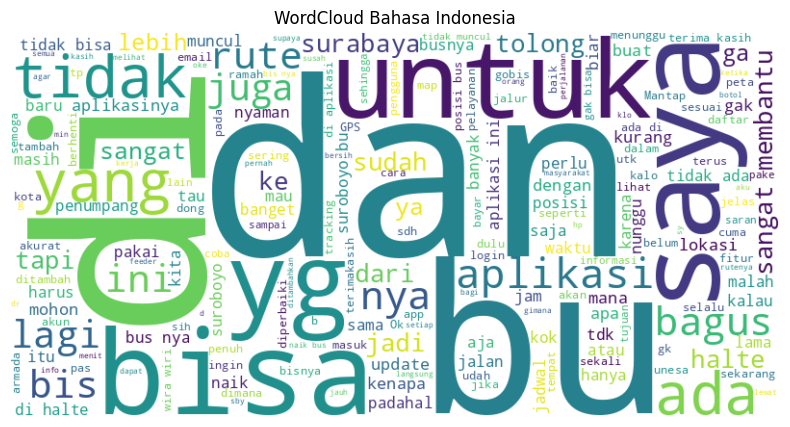

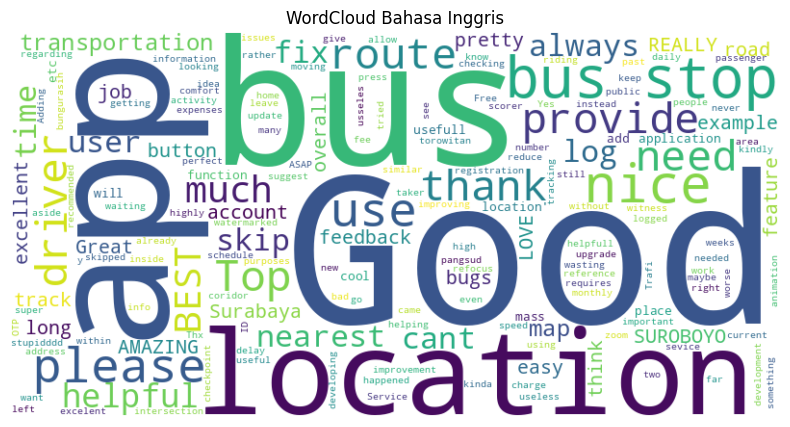

In [ ]:
# Install pustaka wordcloud jika belum tersedia
!pip install wordcloud

# Import pustaka yang diperlukan
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Fungsi untuk membuat WordCloud dari DataFrame berdasarkan bahasa
def generate_wordcloud(df_bahasa, title):
    # Gabungkan semua teks ulasan menjadi satu string
    text = ' '.join(df_bahasa['review'].dropna().astype(str))

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

    # Tampilkan word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Membuat wordcloud untuk Bahasa Indonesia dan Bahasa Inggris
generate_wordcloud(df_bahasa[df_bahasa['bahasa'] == 'Indonesia'], 'WordCloud Bahasa Indonesia')
generate_wordcloud(df_bahasa[df_bahasa['bahasa'] == 'Inggris'], 'WordCloud Bahasa Inggris')


# **PREPROCESS**

## **Translasi**


In [ ]:
import pandas as pd

In [ ]:
df_praproses = pd.read_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (1).csv')

In [ ]:
df_praproses

,original_index,review,bahasa,translated_content
0,0,Orang cuma mau liat posisi bus malah diwajibin...,Indonesia,Orang cuma mau liat posisi bus malah diwajibin...
1,1,Aplikasi updatenya terbaru sudah seperti semul...,Indonesia,Aplikasi updatenya terbaru sudah seperti semul...
2,2,Semoga jumlah armada makin banyak sehingga jar...,Indonesia,Semoga jumlah armada makin banyak sehingga jar...
3,3,Sudah login msh di suruh login lagi,Indonesia,Sudah login msh di suruh login lagi
4,4,"Apaan sih, udah diundang malah gabisa lihat bi...",Indonesia,"Apaan sih, udah diundang malah gabisa lihat bi..."
...,...,...,...,...
1747,1163,Terima kasih,Indonesia,Terima kasih
1748,1164,helpfull app,Inggris,helpfull app
1749,1165,Sip Suroboyo,Indonesia,Sip Suroboyo
1750,1166,Ok,Indonesia,Ok


In [ ]:
# Menghitung jumlah ulasan berdasarkan bahasa
jumlah_per_bahasa = df_praproses.groupby('bahasa').size()
print("Jumlah ulasan berdasarkan bahasa:")
print(jumlah_per_bahasa)


Jumlah ulasan berdasarkan bahasa:
bahasa
Indonesia    1560
Inggris        83
Jawa           46
Lainnya        63
dtype: int64


In [ ]:
# Filter ulasan yang berbahasa "Lainnya"
ulasan_lainnya = df_praproses[df_praproses['bahasa'] == 'Lainnya']

# Menampilkan jumlah ulasan yang berbahasa "Lainnya"
jumlah_ulasan_lainnya = ulasan_lainnya.shape[0]
print(f"Jumlah ulasan yang berbahasa 'Lainnya': {jumlah_ulasan_lainnya}")

# Menampilkan isi ulasan yang berbahasa "Lainnya"
print("\nIsi ulasan yang berbahasa 'Lainnya':")
print(ulasan_lainnya[['review']])


Jumlah ulasan yang berbahasa 'Lainnya': 63

Isi ulasan yang berbahasa 'Lainnya':
                                                 review
153   Overall bagus tapi tingkatkan fitur edit pada ...
181   Tolong diperbaiki lagi sistemnya khusunya dija...
213   Tolong dibenerin untuk arah tow unesa, masa iy...
215         Overall udah bagus sihhhh buat aplikasinya.
230     Ternyata ada masa expirednya hanya 7 hari saja.
...                                                 ...
1687   Tetapi masih ada banyak ruang untuk improvement.
1699  Berati down time nya sangat sangat lama, membu...
1712  App nya cukup informatif, semoga terus di main...
1725  Untuk improvement kedepan, ada baiknya diberik...
1729                           Terlalu basic desainnya.

[63 rows x 1 columns]


In [ ]:
!pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.1 MB/s eta 0:00:00


In [ ]:
from deep_translator import GoogleTranslator

# Fungsi untuk menerjemahkan teks menggunakan deep-translator
def translate_text_deep(text):
    try:
        # Menerjemahkan teks ke bahasa Inggris
        translation = GoogleTranslator(source='auto', target='en').translate(text)
        return translation
    except Exception as e:
        print(f"Error dalam menerjemahkan teks: {e}")
        return text  # Mengembalikan teks asli jika ada error

# Pastikan kolom content dan bahasa ada di DataFrame
if 'review' in df_praproses.columns and 'bahasa' in df_praproses.columns:
    # Tambahkan kolom baru untuk hasil translasi hanya untuk bahasa "Lainnya"
    df_praproses['translated_content'] = df_praproses.apply(
        lambda row: translate_text_deep(row['review']) if row['bahasa'] == 'Lainnya' else row['review'], axis=1
    )

    # Simpan DataFrame yang telah diperbarui ke file CSV
    df_praproses.to_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv', index=False)

    # Tampilkan beberapa baris hasil
    print(df_praproses[['review', 'bahasa', 'translated_content']].head())
    print("\nDataFrame dengan kolom 'translated_content' telah diperbarui dan disimpan kembali dalam file 'split_gobis_reviews_terbaru2.csv'")
else:
    print("Kolom 'content' atau 'bahasa' tidak ditemukan di DataFrame.")

                                              review     bahasa  \
0  Orang cuma mau liat posisi bus malah diwajibin...  Indonesia   
1  Aplikasi updatenya terbaru sudah seperti semul...  Indonesia   
2  Semoga jumlah armada makin banyak sehingga jar...  Indonesia   
3                Sudah login msh di suruh login lagi  Indonesia   
4  Apaan sih, udah diundang malah gabisa lihat bi...  Indonesia   

                                  translated_content  
0  Orang cuma mau liat posisi bus malah diwajibin...  
1  Aplikasi updatenya terbaru sudah seperti semul...  
2  Semoga jumlah armada makin banyak sehingga jar...  
3                Sudah login msh di suruh login lagi  
4  Apaan sih, udah diundang malah gabisa lihat bi...  

DataFrame dengan kolom 'translated_content' telah diperbarui dan disimpan kembali dalam file 'split_gobis_reviews_terbaru2.csv'


In [ ]:
# Filter data dengan bahasa "Lainnya" dan tampilkan hasil translasi
hasil_translasi_lainnya = df_praproses[df_praproses['bahasa'] == 'Lainnya'][['review', 'translated_content']]

# Tampilkan hasil
print("Hasil translasi untuk data dengan bahasa 'Lainnya':")
print(hasil_translasi_lainnya)


Hasil translasi untuk data dengan bahasa 'Lainnya':
                                                 review  \
153   Overall bagus tapi tingkatkan fitur edit pada ...   
181   Tolong diperbaiki lagi sistemnya khusunya dija...   
213   Tolong dibenerin untuk arah tow unesa, masa iy...   
215         Overall udah bagus sihhhh buat aplikasinya.   
230     Ternyata ada masa expirednya hanya 7 hari saja.   
...                                                 ...   
1687   Tetapi masih ada banyak ruang untuk improvement.   
1699  Berati down time nya sangat sangat lama, membu...   
1712  App nya cukup informatif, semoga terus di main...   
1725  Untuk improvement kedepan, ada baiknya diberik...   
1729                           Terlalu basic desainnya.   

                                     translated_content  
153   Overall is good but increase the edit feature ...  
181   Please repair the system, especially at the ni...  
213   Please tied up for the direction of towunsa, w...  
215    

In [ ]:
df_praproses

,original_index,review,bahasa,translated_content
0,0,Orang cuma mau liat posisi bus malah diwajibin...,Indonesia,Orang cuma mau liat posisi bus malah diwajibin...
1,1,Aplikasi updatenya terbaru sudah seperti semul...,Indonesia,Aplikasi updatenya terbaru sudah seperti semul...
2,2,Semoga jumlah armada makin banyak sehingga jar...,Indonesia,Semoga jumlah armada makin banyak sehingga jar...
3,3,Sudah login msh di suruh login lagi,Indonesia,Sudah login msh di suruh login lagi
4,4,"Apaan sih, udah diundang malah gabisa lihat bi...",Indonesia,"Apaan sih, udah diundang malah gabisa lihat bi..."
...,...,...,...,...
1747,1163,Terima kasih,Indonesia,Terima kasih
1748,1164,helpfull app,Inggris,helpfull app
1749,1165,Sip Suroboyo,Indonesia,Sip Suroboyo
1750,1166,Ok,Indonesia,Ok


In [ ]:
# Tambahkan kolom baru untuk menyimpan keterangan bahasa yang dimodifikasi
df_praproses['modified_bahasa'] = df_praproses['bahasa'].apply(lambda x: 'Inggris' if x == 'Lainnya' else x)

# Simpan DataFrame yang telah diperbarui ke file CSV
df_praproses.to_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv', index=False)

# Tampilkan beberapa baris hasil untuk memastikan perubahan
print(df_praproses[['review', 'bahasa', 'modified_bahasa', 'translated_content']].head())
print("\nDataFrame dengan kolom 'modified_bahasa' telah diperbarui dan disimpan dalam file 'split_gobis_reviews_terbaru2.csv'")


                                              review     bahasa  \
0  Orang cuma mau liat posisi bus malah diwajibin...  Indonesia   
1  Aplikasi updatenya terbaru sudah seperti semul...  Indonesia   
2  Semoga jumlah armada makin banyak sehingga jar...  Indonesia   
3                Sudah login msh di suruh login lagi  Indonesia   
4  Apaan sih, udah diundang malah gabisa lihat bi...  Indonesia   

  modified_bahasa                                 translated_content  
0       Indonesia  Orang cuma mau liat posisi bus malah diwajibin...  
1       Indonesia  Aplikasi updatenya terbaru sudah seperti semul...  
2       Indonesia  Semoga jumlah armada makin banyak sehingga jar...  
3       Indonesia                Sudah login msh di suruh login lagi  
4       Indonesia  Apaan sih, udah diundang malah gabisa lihat bi...  

DataFrame dengan kolom 'modified_bahasa' telah diperbarui dan disimpan dalam file 'split_gobis_reviews_terbaru2.csv'


In [ ]:
# Menghitung jumlah ulasan berdasarkan bahasa
jumlah_per_bahasa = df_praproses.groupby('modified_bahasa').size()
print("Jumlah ulasan berdasarkan bahasa:")
print(jumlah_per_bahasa)


Jumlah ulasan berdasarkan bahasa:
modified_bahasa
Indonesia    1560
Inggris       146
Jawa           46
dtype: int64


## **Data Cleaning**

In [ ]:
import pandas as pd

In [ ]:
df_praproses = pd.read_csv ('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv')

In [ ]:
# Menghapus ulasan dengan keterangan bahasa "Jawa"
df_cleaned = df_praproses[df_praproses['modified_bahasa'] != 'Jawa']

# Menyimpan DataFrame yang telah dibersihkan ke file CSV
df_cleaned.to_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv', index=False)

# Menampilkan hasil untuk memastikan ulasan "Jawa" sudah dihapus
print("Data setelah menghapus ulasan berbahasa 'Jawa':")
print(df_cleaned['modified_bahasa'].value_counts())
print("\nDataFrame yang telah dibersihkan telah disimpan ke 'split_gobis_reviews_terbaru2.csv'")


Data setelah menghapus ulasan berbahasa 'Jawa':
modified_bahasa
Indonesia    1560
Inggris       146
Name: count, dtype: int64

DataFrame yang telah dibersihkan telah disimpan ke 'split_gobis_reviews_terbaru2.csv'


In [ ]:
df_cleaned

,original_index,review,bahasa,translated_content,modified_bahasa
0,0,Orang cuma mau liat posisi bus malah diwajibin...,Indonesia,Orang cuma mau liat posisi bus malah diwajibin...,Indonesia
1,1,Aplikasi updatenya terbaru sudah seperti semul...,Indonesia,Aplikasi updatenya terbaru sudah seperti semul...,Indonesia
2,2,Semoga jumlah armada makin banyak sehingga jar...,Indonesia,Semoga jumlah armada makin banyak sehingga jar...,Indonesia
3,3,Sudah login msh di suruh login lagi,Indonesia,Sudah login msh di suruh login lagi,Indonesia
4,4,"Apaan sih, udah diundang malah gabisa lihat bi...",Indonesia,"Apaan sih, udah diundang malah gabisa lihat bi...",Indonesia
...,...,...,...,...,...
1747,1163,Terima kasih,Indonesia,Terima kasih,Indonesia
1748,1164,helpfull app,Inggris,helpfull app,Inggris
1749,1165,Sip Suroboyo,Indonesia,Sip Suroboyo,Indonesia
1750,1166,Ok,Indonesia,Ok,Indonesia


In [ ]:
# Menemukan baris yang duplikat berdasarkan kolom 'translated_content'
df_duplicates = df_cleaned[df_cleaned.duplicated(subset='translated_content', keep=False)]

# Menampilkan hasil
print("Konten yang duplikat:")
print(df_duplicates[['translated_content', 'modified_bahasa']])


Konten yang duplikat:
     translated_content modified_bahasa
8                Mantab       Indonesia
23      Sangat membantu       Indonesia
194              Mantap       Indonesia
203                Baik       Indonesia
212                  Ok       Indonesia
...                 ...             ...
1682                Oke       Indonesia
1719               Good         Inggris
1733       Terima kasih       Indonesia
1747       Terima kasih       Indonesia
1750                 Ok       Indonesia

[106 rows x 2 columns]


In [ ]:
# Menghapus baris yang duplikat berdasarkan kolom 'content'
df_duplicates = df_cleaned.drop_duplicates(subset='translated_content', keep='first').reset_index(drop=True)

# Menyimpan DataFrame yang telah dibersihkan ke file CSV
df_duplicates.to_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv', index=False)
print("\nDataFrame tanpa duplikat telah disimpan ke 'split_gobis_reviews_terbaru2.csv'")


DataFrame tanpa duplikat telah disimpan ke 'split_gobis_reviews_terbaru2.csv'


In [ ]:
df_duplicates

,original_index,review,bahasa,translated_content,modified_bahasa
0,0,Orang cuma mau liat posisi bus malah diwajibin...,Indonesia,Orang cuma mau liat posisi bus malah diwajibin...,Indonesia
1,1,Aplikasi updatenya terbaru sudah seperti semul...,Indonesia,Aplikasi updatenya terbaru sudah seperti semul...,Indonesia
2,2,Semoga jumlah armada makin banyak sehingga jar...,Indonesia,Semoga jumlah armada makin banyak sehingga jar...,Indonesia
3,3,Sudah login msh di suruh login lagi,Indonesia,Sudah login msh di suruh login lagi,Indonesia
4,4,"Apaan sih, udah diundang malah gabisa lihat bi...",Indonesia,"Apaan sih, udah diundang malah gabisa lihat bi...",Indonesia
...,...,...,...,...,...
1619,1163,Untuk \nantisipasi orang2 yang naik bus yang b...,Indonesia,Untuk \nantisipasi orang2 yang naik bus yang b...,Indonesia
1620,1163,Jadi kita yang naik dari tengah2 rute bisa men...,Indonesia,Jadi kita yang naik dari tengah2 rute bisa men...,Indonesia
1621,1164,helpfull app,Inggris,helpfull app,Inggris
1622,1165,Sip Suroboyo,Indonesia,Sip Suroboyo,Indonesia


In [ ]:
df_duplicates.shape

(1624, 5)

## **Text Cleaning**

In [ ]:
df_duplicates = pd.read_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv')

In [ ]:
import re

# Fungsi untuk membersihkan teks dari elemen yang tidak relevan
def clean_text(text):
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca dan simbol khusus, kecuali huruf dan spasi
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berlebih
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Hapus karakter non-ASCII seperti emoji
    text = re.sub(r'(.)\1{2,}', r'\1', text)  # Menghapus huruf berulang lebih dari dua kali
    return text

# Terapkan fungsi cleaning pada DataFrame hasil penghapusan duplikat
df_duplicates['cleaned'] = df_duplicates['translated_content'].apply(clean_text)

# Tampilkan beberapa baris hasil untuk memastikan perubahan
print("Hasil Cleaning pada kolom 'cleaned':")
print(df_duplicates[['translated_content', 'cleaned']].head(10))

# Menyimpan DataFrame yang telah dibersihkan ke file CSV
df_duplicates.to_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv', index=False)
print("\nDataFrame dengan teks yang telah dibersihkan disimpan ke 'split_gobis_reviews_terbaru2.csv'")


Hasil Cleaning pada kolom 'cleaned':
                                  translated_content  \
0  Orang cuma mau liat posisi bus malah diwajibin...   
1  Aplikasi updatenya terbaru sudah seperti semul...   
2  Semoga jumlah armada makin banyak sehingga jar...   
3                Sudah login msh di suruh login lagi   
4  Apaan sih, udah diundang malah gabisa lihat bi...   
5  Disuruh login mulu, giliran sudah login tetep ...   
6  Apk ini mengumpulkan data2 pribadi sensitif se...   
7  Dipaksa update, harus login. Sudah login saja ...   
8                                             Mantab   
9  Sebelum di update untuk track feeder maupun bu...   

                                             cleaned  
0  Orang cuma mau liat posisi bus malah diwajibin...  
1  Aplikasi updatenya terbaru sudah seperti semul...  
2  Semoga jumlah armada makin banyak sehingga jar...  
3                Sudah login msh di suruh login lagi  
4  Apaan sih udah diundang malah gabisa lihat bis...  
5  Disuruh login

## **Case Folding**

In [ ]:
# Terapkan case folding pada kolom 'cleaned' dan simpan di kolom baru 'lower'
df_duplicates['lower'] = df_duplicates['cleaned'].str.lower()

# Tampilkan beberapa baris hasil untuk memastikan perubahan
print("Hasil Case Folding pada kolom 'lower':")
print(df_duplicates[['translated_content', 'cleaned', 'lower']].head())


Hasil Case Folding pada kolom 'lower':
                                  translated_content  \
0  Orang cuma mau liat posisi bus malah diwajibin...   
1  Aplikasi updatenya terbaru sudah seperti semul...   
2  Semoga jumlah armada makin banyak sehingga jar...   
3                Sudah login msh di suruh login lagi   
4  Apaan sih, udah diundang malah gabisa lihat bi...   

                                             cleaned  \
0  Orang cuma mau liat posisi bus malah diwajibin...   
1  Aplikasi updatenya terbaru sudah seperti semul...   
2  Semoga jumlah armada makin banyak sehingga jar...   
3                Sudah login msh di suruh login lagi   
4  Apaan sih udah diundang malah gabisa lihat bis...   

                                               lower  
0  orang cuma mau liat posisi bus malah diwajibin...  
1  aplikasi updatenya terbaru sudah seperti semul...  
2  semoga jumlah armada makin banyak sehingga jar...  
3                sudah login msh di suruh login lagi  
4  apaan sih

In [ ]:
# Simpan DataFrame yang telah diperbarui ke file CSV
df_duplicates.to_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv', index=False)
print("Data dengan kolom 'translated_content_lower' telah disimpan ke 'split_gobis_reviews_terbaru2.csv'")


Data dengan kolom 'translated_content_lower' telah disimpan ke 'split_gobis_reviews_terbaru2.csv'


## **Normalization**

In [ ]:
import pandas as pd

In [ ]:
df_duplicates = pd.read_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv')

In [ ]:
import re
import pandas as pd

# Muat kamus slang Bahasa Indonesia
kamus_id = pd.read_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/kamusalay.csv', usecols=["slang", "formal"])
kamus_id['slang'] = kamus_id['slang'].str.strip().str.lower()
kamus_id['formal'] = kamus_id['formal'].str.strip().str.lower()

# Dictionary untuk normalisasi Bahasa Indonesia
normalization_dict_id = dict(zip(kamus_id['slang'], kamus_id['formal']))

# Tambahan manual untuk normalisasi Bahasa Indonesia
additional_words_id = {
    "aja": "saja", "ak": "aku", "aplikasi y": "aplikasi", "ato": "atau", "bgt": "banget", "brngkat": "berangkat",
    "bs": "bisa", "btl": "betul", "bwt": "buat", "cm": "cuma", "d": "di", "dg": "dengan", "dibuka tdk": "tidak bisa dibuka",
    "diksh": "dikasih", "dksh": "dikasih", "dlu": "dulu", "dpt": "dapat", "dsb": "dan sebagainya", "knp": "kenapa",
    "dri": "dari", "g": "tidak", "gak": "tidak", "gmn": "bagaimana", "gpp": "tidak apa", "gt": "gitu",
    "hattle": "halte", "hrusnya": "harusnya", "jgn": "jangan", "jl": "jalan", "jm": "jam", "jngn": "jangan",
    "kl": "kalau", "klo": "kalau", "kmna": "kemana", "krn": "karena", "kryawan": "karyawan", "ktnya": "katanya",
    "kyk": "seperti", "lg": "lagi", "lbh": "lebih", "tanyaknp": "tanya kenapa", "meleceng": "melenceng",
    "mggunakan": "menggunakan", "mngkin": "mungkin", "mnyenangkan": "menyenangkan", "mslh": "masalah",
    "ngambil": "mengambil", "ntr": "nanti", "oprasianal": "operasional", "pake": "pakai", "pbln": "per bulan",
    "pdhl": "padahal", "pencet": "menekan", "pke": "pakai", "pnumpang": "penumpang", "sbelum": "sebelum",
    "rmaja": "remaja", "sb": "suroboyo bus", "sbnrnya": "sebenarnya", "sdh": "sudah", "seblum": "sebelum",
    "sedh": "sedih", "sgt": "sangat", "shope pay": "shopeepay", "shopepay": "shopeepay", "smoga": "semoga",
    "smua": "semua", "smpk": "sampai", "spya": "supaya", "spt": "seperti", "stlah": "setelah", "sy": "saya",
    "tdk": "tidak", "tf": "transfer", "tgglnya": "tanggalnya", "tlg": "tolong", "tmbh": "tambah", "tmn": "teman",
    "tnp": "tanpa", "tp": "tapi", "traksaksi": "transaksi", "trs": "terus", "ttg": "tentang", "tuk": "untuk",
    "tukerin": "menukar", "sampe": "sampai", "ukrn": "ukuran", "utk": "untuk", "gimana": "bagaimana", "jadwalnya": "jadwal",
    "yg": "yang", "bisa": "dapat", "jd": "jadi", "dm": "direct message", "rek": "teman", "bngt": "banget",
    "bkn": "bukan", "jdg": "jadi", "q": "saya", "mnta": "minta", "kaliya": "seperti", "tervapai": "tercapai",
    "unitm": "unit", "min": "admin", "akurat": "tepat", "msh": "masih", "sip": "baik", "mayan": "lumayan",
    "jaln": "jalan", "bkin": "bikin", "dperbaiki": "diperbaiki", "brrti": "berarti", "pningkatan": "peningkatan",
    "knp": "kenapa", "udh": "sudah", "td": "tadi", "btw": "by the way", "trsbt": "tersebut", "prnh": "pernah",
    "perbaruan": "pembaruan", "pelayann": "pegawai", "tmpt": "tempat", "msknya": "masuk", "prjlnan": "perjalanan",
    "akungkutan": "angkutan", "posisi": "lokasi", "keberadaan": "lokasi", "donload": "download", "apl": "aplikasi",
    "lyn": "layanan", "apss": "aplikasi", "penumpng": "penumpang", "keberngktan": "keberangkatan", "bisnya": "bis",
    "beroprasianal": "beroprasional", "diapps": "aplikasi", "aplikasih": "aplikasi", "busnya": "bus", "pls": "tolong",
    "apps": "aplikasi", "googpe": "google", "geogel": "google", "app": "aplikasi", "gb": "gps", "transit": "tiba", "desainnya": "desain",
    "wiawiri": "wirawiri", "warawiri": "wirawiri", "pegawenya": "pegawai", "uodate": "update", "pengembangannya": "perkembangan",
    "updatean": "update", "staf2nya": "pegawai", "staff": "pegawai", "diapp": "aplikasi", "pengbangan": "perkembangan",
    "brktnya": "berangkat", "datang": "tiba", "transum": "transportasi umum", "kedatangan": "tiba", "ksdatangan": "tiba",
    "dateng": "tiba", "fasum": "fasilitas umum", "kedatangannya": "tiba", "datangnya": "tiba", "kedatengannya": "tiba",
    "suroboyobus": "bus suroboyo", "diintefikasi": "diidentifikasi", "gobissurabaya": "gobis suroboyo", "beguna": "berguna",
    "suboyo": "suroboyo", "favofid": "favorite", "tgu": "tunggu", "apk": "aplikasi", "bussuroboyo": "bus suroboyo",
    "surabayaq": "suroboyo", "transport": "transportasi", "gbr": "gps", "bes": "bis", "go bis": "gobis", "appsnya": "aplikasi",
    "tranfot": "transportasi", "apknya": "aplikasi", "cecking": "checking", "mmber": "member", "helpfull": "membantu",
    "applikasinya": "aplikasi", "refres": "refresh", "regis": "daftar", "kulier": "kuliner", "pas": "waktu","tracking": "melacak", "track": "lacak",
    "alplikasi": "aplikasi", "transpor": "transportasi", "go bus": "gobis", "menber": "member", "gobiz": "gobis", "petsa": "peta",
    "mantab": "mantap", "signup": "sign up", "signin": "sign in", "wirawiri": "wira wiri", "bisfeeder": "bis feeder", "mhn": "mohon",
    "feederbis": "bis feeder", "fd": "feeder", "ww": "wira wiri", "sopirsopir": "sopir", "supir": "sopir", "tup up": "top up",
    "qrgobis": "qr gobis", "topup": "top up", "pp": "profil", "enggak": "tidak", "brkt": "berangkat", "gobus": "gobis", "maps": "map",
    "updatebis": "update bis", "appnya": "aplikasi"
}

# Gabungkan kamus slang dengan tambahan manual
normalization_dict_id.update(additional_words_id)

# Fungsi normalisasi teks Bahasa Indonesia

def normalize_text(text):
    text = text.lower().strip()  # Konversi ke huruf kecil dan hapus spasi berlebih
    for slang, formal in normalization_dict_id.items():
        text = re.sub(rf'\b{re.escape(slang)}\b', formal, text)  # Ganti slang dengan kata baku
    return text

# Muat dataset ulasan
df = pd.read_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv')

# Terapkan normalisasi pada kolom ulasan
df['normalized_lower4'] = df['lower'].astype(str).apply(normalize_text)

# Simpan hasil normalisasi ke CSV
df.to_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv', index=False)

print("Hasil normalisasi telah disimpan ke dalam file CSV.")


Hasil normalisasi telah disimpan ke dalam file CSV.


## Translate Indonesia


In [ ]:
import pandas as pd

In [ ]:
df_normalisasi = pd.read_csv ('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv')

In [ ]:
df_normalisasi

,original_index,review,bahasa,translated_content,modified_bahasa,cleaned,lower,normalized_lower4
0,0,Orang cuma mau liat posisi bus malah diwajibin...,Indonesia,Orang cuma mau liat posisi bus malah diwajibin...,Indonesia,Orang cuma mau liat posisi bus malah diwajibin...,orang cuma mau liat posisi bus malah diwajibin...,orang cuma mau lihat lokasi bus malah diwajibi...
1,1,Aplikasi updatenya terbaru sudah seperti semul...,Indonesia,Aplikasi updatenya terbaru sudah seperti semul...,Indonesia,Aplikasi updatenya terbaru sudah seperti semul...,aplikasi updatenya terbaru sudah seperti semul...,aplikasi updatenya terbaru sudah seperti semul...
2,2,Semoga jumlah armada makin banyak sehingga jar...,Indonesia,Semoga jumlah armada makin banyak sehingga jar...,Indonesia,Semoga jumlah armada makin banyak sehingga jar...,semoga jumlah armada makin banyak sehingga jar...,semoga jumlah armada makin banyak sehingga jar...
3,3,Sudah login msh di suruh login lagi,Indonesia,Sudah login msh di suruh login lagi,Indonesia,Sudah login msh di suruh login lagi,sudah login msh di suruh login lagi,sudah login masih di suruh login lagi
4,4,"Apaan sih, udah diundang malah gabisa lihat bi...",Indonesia,"Apaan sih, udah diundang malah gabisa lihat bi...",Indonesia,Apaan sih udah diundang malah gabisa lihat bis...,apaan sih udah diundang malah gabisa lihat bis...,apaan sih sudah diundang malah tidak dapat lih...
...,...,...,...,...,...,...,...,...
1619,1163,Untuk \nantisipasi orang2 yang naik bus yang b...,Indonesia,Untuk \nantisipasi orang2 yang naik bus yang b...,Indonesia,Untuk antisipasi orang yang naik bus yang buka...,untuk antisipasi orang yang naik bus yang buka...,untuk antisipasi orang yang naik bus yang buka...
1620,1163,Jadi kita yang naik dari tengah2 rute bisa men...,Indonesia,Jadi kita yang naik dari tengah2 rute bisa men...,Indonesia,Jadi kita yang naik dari tengah rute bisa meng...,jadi kita yang naik dari tengah rute bisa meng...,jadi kita yang naik dari tengah rute dapat men...
1621,1164,helpfull app,Inggris,helpfull app,Inggris,helpfull app,helpfull app,membantu aplikasi
1622,1165,Sip Suroboyo,Indonesia,Sip Suroboyo,Indonesia,Sip Suroboyo,sip suroboyo,baik suroboyo


In [ ]:
!pip install deep-translator

In [ ]:
import time
import re
import pandas as pd
from deep_translator import GoogleTranslator
from concurrent.futures import ThreadPoolExecutor

# Fungsi untuk membersihkan teks setelah terjemahan
def clean_text(text):
    text = text.lower()  # Case folding (huruf kecil semua)
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Hapus angka, simbol, dan tanda baca
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berlebih
    return text

# Fungsi untuk menerjemahkan teks ke Bahasa Inggris dengan retry jika gagal
def translate_to_english(text):
    try:
        if not isinstance(text, str) or not text.strip():  # Cek apakah teks valid
            return ''

        text = text.strip().replace('\n', ' ').replace('\r', ' ')  # Bersihkan teks awal

        retry_count = 0
        translated_text = ''
        while retry_count < 3:
            translated_text = GoogleTranslator(source='auto', target='en').translate(text)
            if translated_text and translated_text.strip().lower() != text.strip().lower():
                break  # Berhenti jika hasilnya berbeda dengan input
            retry_count += 1
            time.sleep(0.5)  # Jeda untuk menghindari rate limit

        return clean_text(translated_text)  # Bersihkan teks hasil terjemahan
    except Exception as e:
        print(f"Kesalahan saat menerjemahkan: {text} | Error: {e}")
        return clean_text(text)  # Jika gagal, gunakan teks asli tapi tetap dibersihkan

# Pastikan dataframe df_normalisasi sudah ada
df_normalisasi['normalized_lower4'] = df_normalisasi['normalized_lower4'].fillna('').astype(str)

# Gunakan multi-threading untuk mempercepat terjemahan
with ThreadPoolExecutor(max_workers=10) as executor:
    df_normalisasi['translated_lower4'] = list(executor.map(translate_to_english, df_normalisasi['normalized_lower4']))

# Simpan hasil ke CSV
df_normalisasi.to_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv', index=False)

print("Semua teks telah berhasil diterjemahkan dan dibersihkan dengan optimal. Hasilnya disimpan dalam file CSV.")


Semua teks telah berhasil diterjemahkan dan dibersihkan dengan optimal. Hasilnya disimpan dalam file CSV.


In [ ]:
df_normalisasi

,original_index,review,bahasa,translated_content,modified_bahasa,cleaned,lower,normalized_lower4,translated_lower4
0,0,Orang cuma mau liat posisi bus malah diwajibin...,Indonesia,Orang cuma mau liat posisi bus malah diwajibin...,Indonesia,Orang cuma mau liat posisi bus malah diwajibin...,orang cuma mau liat posisi bus malah diwajibin...,orang cuma mau lihat lokasi bus malah diwajibi...,people just want to see the location of the bu...
1,1,Aplikasi updatenya terbaru sudah seperti semul...,Indonesia,Aplikasi updatenya terbaru sudah seperti semul...,Indonesia,Aplikasi updatenya terbaru sudah seperti semul...,aplikasi updatenya terbaru sudah seperti semul...,aplikasi updatenya terbaru sudah seperti semul...,the latest update application is as before cool
2,2,Semoga jumlah armada makin banyak sehingga jar...,Indonesia,Semoga jumlah armada makin banyak sehingga jar...,Indonesia,Semoga jumlah armada makin banyak sehingga jar...,semoga jumlah armada makin banyak sehingga jar...,semoga jumlah armada makin banyak sehingga jar...,hopefully the number of fleets will be more so...
3,3,Sudah login msh di suruh login lagi,Indonesia,Sudah login msh di suruh login lagi,Indonesia,Sudah login msh di suruh login lagi,sudah login msh di suruh login lagi,sudah login masih di suruh login lagi,already login still told to login again
4,4,"Apaan sih, udah diundang malah gabisa lihat bi...",Indonesia,"Apaan sih, udah diundang malah gabisa lihat bi...",Indonesia,Apaan sih udah diundang malah gabisa lihat bis...,apaan sih udah diundang malah gabisa lihat bis...,apaan sih sudah diundang malah tidak dapat lih...,what the hell has been invited i cant even see...
...,...,...,...,...,...,...,...,...,...
1619,1163,Untuk \nantisipasi orang2 yang naik bus yang b...,Indonesia,Untuk \nantisipasi orang2 yang naik bus yang b...,Indonesia,Untuk antisipasi orang yang naik bus yang buka...,untuk antisipasi orang yang naik bus yang buka...,untuk antisipasi orang yang naik bus yang buka...,to anticipate people who take a bus that is no...
1620,1163,Jadi kita yang naik dari tengah2 rute bisa men...,Indonesia,Jadi kita yang naik dari tengah2 rute bisa men...,Indonesia,Jadi kita yang naik dari tengah rute bisa meng...,jadi kita yang naik dari tengah rute bisa meng...,jadi kita yang naik dari tengah rute dapat men...,so we who ride from the middle of the route ca...
1621,1164,helpfull app,Inggris,helpfull app,Inggris,helpfull app,helpfull app,membantu aplikasi,help the application
1622,1165,Sip Suroboyo,Indonesia,Sip Suroboyo,Indonesia,Sip Suroboyo,sip suroboyo,baik suroboyo,good suroboyo


## **Sinonim**

In [ ]:
import pandas as pd

In [ ]:
df_translated2 = pd.read_csv ('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv')

In [ ]:
# Pastikan kolom tidak mengandung NaN atau tipe data selain string
df_translated2['translated_lower4'] = df_translated2['translated_lower4'].fillna('').astype(str)

# Kamus sinonim untuk menyamakan kata-kata dengan arti yang sama
synonym_dict = {
    "buses": "bus", "app": "application", "platform": "application", "sign in": "login", "log in": "login", "verification": "otp",
    "bug": "error", "issue": "error", "trouble": "error", "problem": "error", "crash": "error", "fault": "error", "ustable": "error",
    "nik": "personal information", "transaction": "payment", "fee": "payment", "fare": "payement", "upgrade": "update", "fix": "update",
    "improvement": "update", "renewal": "update", "positio": "location", "alert": "notification", "reminder": "notification",
    "commuter": "passenger", "traveler": "passenger", "pass": "ticket", "useful": "helpful", "beneficial": "helpful", "practical": "helpful",
    "polite": "friendly", "kind": "friendly", "welcoming": "friendly", "lagging": "slow", "delayed": "slow", "late": "slow", "area": "location",
    "timetable": "schedule", "find": "track", "tracking": "track", "look": "track", "looking": "track", "bottles": "bottle", "aplikasi": "application",
    "added": "add", "help": "helpful", "users": "user", "bugs": "error", "doesnt working": "error", "not working": "error",
    "fail": "error", "updated": "update", "time": "schedule", "wait": "waiting", "informative": "information", "screen": "display", "worst": "bad",
    "worse": "bad", "nice": "good", "better": "good", "applications": "application", "vehicle": "bus", "long": "waiting", "cannot": "cant",
    "place": "location", "facilities": "facility", "not clear": "unclear", "brilliant": "good", "clock": "schedule", "monitor": "track", "ok": "good",
    "okay": "good", "design": "display", "doesnt": "not", "applications": "application", "go bis": "gobis", "routes": "route", "dont": "not", "arrives": "arrive",
    "delay": "waiting", "late": "waiting", "slow": "waiting", "cant": "error", "lacak": "track", "days": "day", "well": "good", "go bus": "gobis",
    "hours": "hour"
}

# Fungsi untuk mengganti kata dengan sinonimnya
def replace_with_synonym(text):
    words = text.split()  # Tokenisasi kata
    words = [synonym_dict.get(word, word) for word in words]  # Ganti jika ada sinonim
    return ' '.join(words)  # Gabungkan kembali menjadi teks

# Terapkan fungsi sinonim pada kolom hasil terjemahan
df_translated2['translated_synonym6'] = df_translated2['translated_lower4'].apply(replace_with_synonym)

# Simpan hasil ke CSV
df_translated2.to_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv', index=False)

print("✅ Proses sinonim selesai! Hasilnya disimpan dalam file CSV.")


✅ Proses sinonim selesai! Hasilnya disimpan dalam file CSV.


## **Stopword**

In [ ]:
import pandas as pd

In [ ]:
df_translated = pd.read_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv')

In [ ]:
df_translated

,original_index,review,bahasa,translated_content,modified_bahasa,cleaned,lower,normalized_lower4,translated_lower4,translated_synonym6,translated_synonym7
0,0,Orang cuma mau liat posisi bus malah diwajibin...,Indonesia,Orang cuma mau liat posisi bus malah diwajibin...,Indonesia,Orang cuma mau liat posisi bus malah diwajibin...,orang cuma mau liat posisi bus malah diwajibin...,orang cuma mau lihat lokasi bus malah diwajibi...,people just want to see the location of the bu...,people just want to see the location of the bu...,people just want to see the location of the bu...
1,1,Aplikasi updatenya terbaru sudah seperti semul...,Indonesia,Aplikasi updatenya terbaru sudah seperti semul...,Indonesia,Aplikasi updatenya terbaru sudah seperti semul...,aplikasi updatenya terbaru sudah seperti semul...,aplikasi updatenya terbaru sudah seperti semul...,the latest update application is as before cool,the latest update application is as before cool,the latest update application is as before cool
2,2,Semoga jumlah armada makin banyak sehingga jar...,Indonesia,Semoga jumlah armada makin banyak sehingga jar...,Indonesia,Semoga jumlah armada makin banyak sehingga jar...,semoga jumlah armada makin banyak sehingga jar...,semoga jumlah armada makin banyak sehingga jar...,hopefully the number of fleets will be more so...,hopefully the number of fleets will be more so...,hopefully the number of fleets will be more so...
3,3,Sudah login msh di suruh login lagi,Indonesia,Sudah login msh di suruh login lagi,Indonesia,Sudah login msh di suruh login lagi,sudah login msh di suruh login lagi,sudah login masih di suruh login lagi,already login still told to login again,already login still told to login again,already login still told to login again
4,4,"Apaan sih, udah diundang malah gabisa lihat bi...",Indonesia,"Apaan sih, udah diundang malah gabisa lihat bi...",Indonesia,Apaan sih udah diundang malah gabisa lihat bis...,apaan sih udah diundang malah gabisa lihat bis...,apaan sih sudah diundang malah tidak dapat lih...,what the hell has been invited i cant even see...,what the hell has been invited i error even se...,what the hell has been invited i error even se...
...,...,...,...,...,...,...,...,...,...,...,...
1619,1163,Untuk \nantisipasi orang2 yang naik bus yang b...,Indonesia,Untuk \nantisipasi orang2 yang naik bus yang b...,Indonesia,Untuk antisipasi orang yang naik bus yang buka...,untuk antisipasi orang yang naik bus yang buka...,untuk antisipasi orang yang naik bus yang buka...,to anticipate people who take a bus that is no...,to anticipate people who take a bus that is no...,to anticipate people who take a bus that is no...
1620,1163,Jadi kita yang naik dari tengah2 rute bisa men...,Indonesia,Jadi kita yang naik dari tengah2 rute bisa men...,Indonesia,Jadi kita yang naik dari tengah rute bisa meng...,jadi kita yang naik dari tengah rute bisa meng...,jadi kita yang naik dari tengah rute dapat men...,so we who ride from the middle of the route ca...,so we who ride from the middle of the route ca...,so we who ride from the middle of the route ca...
1621,1164,helpfull app,Inggris,helpfull app,Inggris,helpfull app,helpfull app,membantu aplikasi,help the application,helpful the application,helpful the application
1622,1165,Sip Suroboyo,Indonesia,Sip Suroboyo,Indonesia,Sip Suroboyo,sip suroboyo,baik suroboyo,good suroboyo,good suroboyo,good suroboyo


In [ ]:
!pip install nltk
!pip install Sastrawi

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download stopwords bahasa Inggris jika belum tersedia
nltk.download('stopwords')

# Gunakan daftar stopwords default dari NLTK
stop_words_en = set(stopwords.words('english'))

# Tambahkan stopwords tambahan secara manual (kata-kata umum yang tidak bermakna dalam konteks ulasan)
additional_stopwords = {
    "just", "like", "really", "actually", "even", "also", "get", "got", "make", "makes", "making",
    "would", "could", "should", "must", "can", "may", "might", "shall", "will", "us", "one", "two", "many", "much",
    "lot", "lots", "thing", "things", "someone", "everyone", "anyone", "something", "nothing", "everything",
    "the", "is", "to", "and", "of", "for", "be", "a", "it", "i", "in", "that", "you", "this", "but", "at", "if", "so",
    "are", "on", "from", "how", "have", "because", "more", "where", "with", "my", "their", "them", "was", "were", "please",
    "west", "sok", "know", "thank", "thanks", "itu", "hmm", "often", "new", "use", "plastic", "public", "ini", "see", "seen",
    "first", "suroboyo", "tapi", "purabaya", "still", "appear", "helps", "given", "example", "hopefully", "future", "always",
    "continue", "real", "needed", "right", "middle", "instead", "every", "though", "nearest", "features", "appears", "name", "cities"
    "least", "take", "versa", "vice", "walk", "getting", "existence", "level", "notice", "used", "friends", "able", "yet", "recommended",
    "latest", "increase", "want", "bu", "ride", "unesa", "purabayarajawali", "city", "surabaya", "maybe", "soon", "muslim", "religious",
    "jakarta", "mother", "jmp", "rajawali", "bungur", "im", "yes", "give", "already", "think", "plus", "day", "least", "star", "try",
    "writing"
}

# Kata-kata yang *tidak boleh dihapus* (misalnya kata-kata sentimen negatif)
important_words = {
    "slow", "error", "fail", "broken", "not"
}

# Gabungkan stopwords NLTK dengan tambahan manual
final_stopwords = stop_words_en.union(additional_stopwords)

# Fungsi untuk menghapus stopwords, kecuali kata-kata penting
def remove_stopwords(text):
    if not isinstance(text, str) or text.strip() == "":
        return text  # Jika teks kosong atau bukan string, kembalikan apa adanya
    return ' '.join([
        word for word in text.split()
        if word.lower() not in final_stopwords or word.lower() in important_words
    ])

# Load dataset yang sudah diterjemahkan
df_translated = pd.read_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv')

# Pastikan kolom tidak ada NaN
df_translated['translated_synonym6'] = df_translated['translated_synonym6'].fillna('')

# Terapkan fungsi pada kolom 'translated_synonym6'
df_translated['stopword_removed6'] = df_translated['translated_synonym6'].apply(remove_stopwords)

# Simpan hasil ke CSV
df_translated.to_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv', index=False)

print("Stopword removal selesai dengan pengecualian kata penting, hasil disimpan.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stopword removal selesai dengan pengecualian kata penting, hasil disimpan.


In [ ]:
df_translated

,original_index,review,bahasa,translated_content,modified_bahasa,cleaned,lower,normalized_lower4,translated_lower4,translated_synonym6,translated_synonym7,stopword_removed6,stopword_removed7
0,0,Orang cuma mau liat posisi bus malah diwajibin...,Indonesia,Orang cuma mau liat posisi bus malah diwajibin...,Indonesia,Orang cuma mau liat posisi bus malah diwajibin...,orang cuma mau liat posisi bus malah diwajibin...,orang cuma mau lihat lokasi bus malah diwajibi...,people just want to see the location of the bu...,people just want to see the location of the bu...,people just want to see the location of the bu...,people location bus required log fixed,people location bus required log fixed
1,1,Aplikasi updatenya terbaru sudah seperti semul...,Indonesia,Aplikasi updatenya terbaru sudah seperti semul...,Indonesia,Aplikasi updatenya terbaru sudah seperti semul...,aplikasi updatenya terbaru sudah seperti semul...,aplikasi updatenya terbaru sudah seperti semul...,the latest update application is as before cool,the latest update application is as before cool,the latest update application is as before cool,update application cool,update application cool
2,2,Semoga jumlah armada makin banyak sehingga jar...,Indonesia,Semoga jumlah armada makin banyak sehingga jar...,Indonesia,Semoga jumlah armada makin banyak sehingga jar...,semoga jumlah armada makin banyak sehingga jar...,semoga jumlah armada makin banyak sehingga jar...,hopefully the number of fleets will be more so...,hopefully the number of fleets will be more so...,hopefully the number of fleets will be more so...,number fleets transportation distance not waiting,number fleets transportation distance not waiting
3,3,Sudah login msh di suruh login lagi,Indonesia,Sudah login msh di suruh login lagi,Indonesia,Sudah login msh di suruh login lagi,sudah login msh di suruh login lagi,sudah login masih di suruh login lagi,already login still told to login again,already login still told to login again,already login still told to login again,login told login,login told login
4,4,"Apaan sih, udah diundang malah gabisa lihat bi...",Indonesia,"Apaan sih, udah diundang malah gabisa lihat bi...",Indonesia,Apaan sih udah diundang malah gabisa lihat bis...,apaan sih udah diundang malah gabisa lihat bis...,apaan sih sudah diundang malah tidak dapat lih...,what the hell has been invited i cant even see...,what the hell has been invited i error even se...,what the hell has been invited i error even se...,hell invited error feeder bus,hell invited error feeder bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,1163,Untuk \nantisipasi orang2 yang naik bus yang b...,Indonesia,Untuk \nantisipasi orang2 yang naik bus yang b...,Indonesia,Untuk antisipasi orang yang naik bus yang buka...,untuk antisipasi orang yang naik bus yang buka...,untuk antisipasi orang yang naik bus yang buka...,to anticipate people who take a bus that is no...,to anticipate people who take a bus that is no...,to anticipate people who take a bus that is no...,anticipate people bus not starting terminal,anticipate people bus not starting terminal
1620,1163,Jadi kita yang naik dari tengah2 rute bisa men...,Indonesia,Jadi kita yang naik dari tengah2 rute bisa men...,Indonesia,Jadi kita yang naik dari tengah rute bisa meng...,jadi kita yang naik dari tengah rute bisa meng...,jadi kita yang naik dari tengah rute dapat men...,so we who ride from the middle of the route ca...,so we who ride from the middle of the route ca...,so we who ride from the middle of the route ca...,route calculate schedule bus arrive,route calculate schedule bus arrive
1621,1164,helpfull app,Inggris,helpfull app,Inggris,helpfull app,helpfull app,membantu aplikasi,help the application,helpful the application,helpful the application,helpful application,helpful application
1622,1165,Sip Suroboyo,Indonesia,Sip Suroboyo,Indonesia,Sip Suroboyo,sip suroboyo,baik suroboyo,good suroboyo,good suroboyo,good suroboyo,good,good


In [ ]:
# Menghitung jumlah ulasan dengan kurang dari 2 kata
short_reviews_count = (df_translated['stopword_removed6'].str.split().str.len() < 2).sum()

print(f"Jumlah ulasan dengan kurang dari 2 kata: {short_reviews_count}")

Jumlah ulasan dengan kurang dari 2 kata: 3


In [ ]:
# Menghapus ulasan yang terlalu singkat (kurang dari 2 kata)
df_cleaned_filtered = df_translated[df_translated['stopword_removed6'].str.split().str.len() >= 2].reset_index(drop=True)

# Menyimpan DataFrame yang telah difilter ke file CSV
df_cleaned_filtered.to_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv', index=False)
print("\nDataFrame tanpa duplikat dan ulasan terlalu singkat telah disimpan ke 'translasi_gobis_reviews_terbaru_filtered.csv'")


DataFrame tanpa duplikat dan ulasan terlalu singkat telah disimpan ke 'translasi_gobis_reviews_terbaru_filtered.csv'


## **Tokenisasi**

In [ ]:
import pandas as pd
import nltk

In [ ]:
# Load dataset hasil stopword removal
df_translated = pd.read_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv')

In [ ]:
import pandas as pd

# Pastikan kolom tidak mengandung NaN
df_translated['stopword_removed6'] = df_translated['stopword_removed6'].fillna('')

# Fungsi Tokenisasi dengan Perbaikan
def tokenize_text(text):
    if isinstance(text, str):  # Pastikan teks adalah string
        tokens = text.lower().split()  # Split berdasarkan spasi
        tokens = [word for word in tokens if word.isalpha()]  # Hapus karakter non-alfabet
        return tokens  # Mengembalikan LIST asli, bukan string
    return []  # Kembalikan list kosong jika bukan string

# Terapkan tokenisasi pada kolom hasil stopword removal
df_translated['tokens_cleaned6'] = df_translated['stopword_removed6'].apply(tokenize_text)

# Pastikan hasil tokenisasi berbentuk list
print(type(df_translated['tokens_cleaned6'][0]))  # Harus <class 'list'>
print(df_translated['tokens_cleaned6'].head())    # Harus berupa list asli, bukan string

# Simpan hasil ke CSV tanpa mengubah format list
df_translated.to_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv', index=False)

print("Tokenisasi selesai! Hasilnya telah disimpan.")


<class 'list'>
0        [people, location, bus, required, log, fixed]
1                          [update, application, cool]
2    [number, fleets, transportation, distance, not...
3                                 [login, told, login]
4                  [hell, invited, error, feeder, bus]
Name: tokens_cleaned6, dtype: object
Tokenisasi selesai! Hasilnya telah disimpan.


In [ ]:
print(type(df_translated['tokens_cleaned6'][0]))  # Harus <class 'list'>


<class 'list'>


# **PEMODELAN TOPIK**

In [ ]:
import pandas as pd

In [ ]:
df_aspect = pd.read_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv')

In [ ]:
df_aspect

,original_index,review,bahasa,translated_content,modified_bahasa,cleaned,lower,normalized_lower4,translated_lower4,translated_synonym6,translated_synonym7,stopword_removed6,stopword_removed7,tokens_cleaned7
0,0,Orang cuma mau liat posisi bus malah diwajibin...,Indonesia,Orang cuma mau liat posisi bus malah diwajibin...,Indonesia,Orang cuma mau liat posisi bus malah diwajibin...,orang cuma mau liat posisi bus malah diwajibin...,orang cuma mau lihat lokasi bus malah diwajibi...,people just want to see the location of the bu...,people just want to see the location of the bu...,people just want to see the location of the bu...,people location bus required log fixed,people location bus required log fixed,"['people', 'location', 'bus', 'required', 'log..."
1,1,Aplikasi updatenya terbaru sudah seperti semul...,Indonesia,Aplikasi updatenya terbaru sudah seperti semul...,Indonesia,Aplikasi updatenya terbaru sudah seperti semul...,aplikasi updatenya terbaru sudah seperti semul...,aplikasi updatenya terbaru sudah seperti semul...,the latest update application is as before cool,the latest update application is as before cool,the latest update application is as before cool,update application cool,update application cool,"['update', 'application', 'cool']"
2,2,Semoga jumlah armada makin banyak sehingga jar...,Indonesia,Semoga jumlah armada makin banyak sehingga jar...,Indonesia,Semoga jumlah armada makin banyak sehingga jar...,semoga jumlah armada makin banyak sehingga jar...,semoga jumlah armada makin banyak sehingga jar...,hopefully the number of fleets will be more so...,hopefully the number of fleets will be more so...,hopefully the number of fleets will be more so...,number fleets transportation distance not waiting,number fleets transportation distance not waiting,"['number', 'fleets', 'transportation', 'distan..."
3,3,Sudah login msh di suruh login lagi,Indonesia,Sudah login msh di suruh login lagi,Indonesia,Sudah login msh di suruh login lagi,sudah login msh di suruh login lagi,sudah login masih di suruh login lagi,already login still told to login again,already login still told to login again,already login still told to login again,login told login,login told login,"['login', 'told', 'login']"
4,4,"Apaan sih, udah diundang malah gabisa lihat bi...",Indonesia,"Apaan sih, udah diundang malah gabisa lihat bi...",Indonesia,Apaan sih udah diundang malah gabisa lihat bis...,apaan sih udah diundang malah gabisa lihat bis...,apaan sih sudah diundang malah tidak dapat lih...,what the hell has been invited i cant even see...,what the hell has been invited i error even se...,what the hell has been invited i error even se...,hell invited error feeder bus,hell invited error feeder bus,"['hell', 'invited', 'error', 'feeder', 'bus']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,1163,Menurut saya OK.,Indonesia,Menurut saya OK.,Indonesia,Menurut saya OK,menurut saya ok,menurut saya ok,in my opinion ok,in my opinion good,in my opinion good,opinion good,opinion good,"['opinion', 'good']"
1393,1163,"Saran saja sih, alangkah baiknya ada keteranga...",Indonesia,"Saran saja sih, alangkah baiknya ada keteranga...",Indonesia,Saran saja sih alangkah baiknya ada keterangan...,saran saja sih alangkah baiknya ada keterangan...,saran saja sih alangkah baiknya ada keterangan...,just a suggestion it would be nice to have a s...,just a suggestion it would be good to have a s...,just a suggestion it would be good to have a s...,suggestion good schedule information minutes b...,suggestion good schedule information minutes b...,"['suggestion', 'good', 'schedule', 'informatio..."
1394,1163,Untuk \nantisipasi orang2 yang naik bus yang b...,Indonesia,Untuk \nantisipasi orang2 yang naik bus yang b...,Indonesia,Untuk antisipasi orang yang naik bus yang buka...,untuk antisipasi orang yang naik bus yang buka...,untuk antisipasi orang yang naik bus yang buka...,to anticipate people who take a bus that is no...,to anticipate people who take a bus that is n

In [ ]:
print(df_aspect.columns)


Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'bahasa', 'translated_content',
       'modified_bahasa', 'cleaned', 'lower', 'normalized_lower4',
       'translated_lower4', 'translated_synonym6', 'stopword_removed6',
       'tokens_cleaned6', 'translated_synonym7', 'stopword_removed7',
       'tokens_cleaned7', 'aspect_label', 'aspect_label_name',
       'content_translated_label', 'Vader', 'TextBlob', 'Sentiment_Manual',
       'Dominan', 'AFINN', 'Tokenized_Text', 'POSTagged_Text', 'SentiWordNet',
       'Pattern'],
      dtype='object')


In [ ]:
!pip install numpy==1.23.5 gensim==4.3.1 scipy==1.10.1 nltk --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/8

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import ast
aspect_lda = df_aspect['tokens_cleaned6'].values.tolist()
aspect_lda = [ast.literal_eval(text) if isinstance(text, str) else text for text in aspect_lda]

In [ ]:
from gensim import corpora
dirichlet_dict = corpora.Dictionary(aspect_lda)
bow_corpus = [dirichlet_dict.doc2bow(text) for text in aspect_lda]

In [ ]:
from gensim.models import TfidfModel
tfidf = TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [ ]:
from gensim.models import LdaModel
num_topics = list(range(2, 11))  # Dari 1 hingga 10
num_keywords = 5

LDA_models = {}
LDA_topics = {}

for i in num_topics:
    LDA_models[i] = LdaModel(
        corpus=corpus_tfidf,
        id2word=dirichlet_dict,
        num_topics=i,
        update_every=1,
        random_state=56,
        chunksize=50,
        passes=5,
        alpha=0.5,
        per_word_topics=True
    )

    shown_topics = LDA_models[i].show_topics(num_topics=i, num_words=num_keywords, formatted=False)
    LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]


In [ ]:
import numpy as np

def jaccard_similarity(topic_1, topic_2):
    intersection = set(topic_1).intersection(set(topic_2))
    union = set(topic_1).union(set(topic_2))
    return float(len(intersection)) / float(len(union)) if len(union) > 0 else 0

LDA_stability = {}

for i in range(len(num_topics) - 1):
    jaccard_sims = []
    for topic1 in LDA_topics[num_topics[i]]:
        sims = [jaccard_similarity(topic1, topic2) for topic2 in LDA_topics[num_topics[i + 1]]]
        jaccard_sims.append(max(sims))

    LDA_stability[num_topics[i]] = np.mean(jaccard_sims)


In [ ]:
from gensim.models import CoherenceModel

coherences = [
    CoherenceModel(model=LDA_models[i], texts=aspect_lda, dictionary=dirichlet_dict, coherence='c_v').get_coherence()
    for i in num_topics[:-1]
]

coh_sta_diffs = [coherences[i] - LDA_stability[num_topics[i]] for i in range(len(coherences))]
ideal_topic_num = num_topics[coh_sta_diffs.index(max(coh_sta_diffs))]


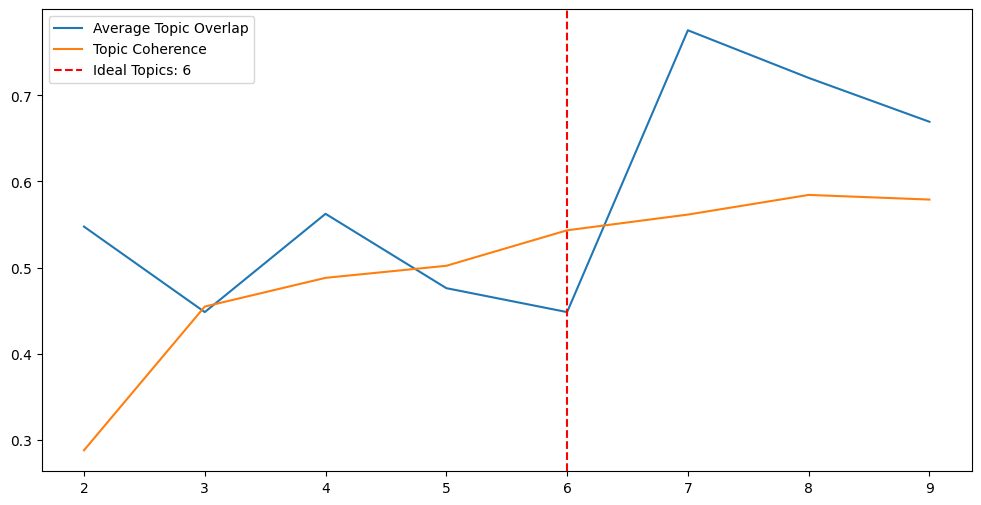

In [ ]:
#rs=56
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(x=num_topics[:-1], y=[LDA_stability[i] for i in num_topics[:-1]], label='Average Topic Overlap')
sns.lineplot(x=num_topics[:-1], y=coherences, label='Topic Coherence')
plt.axvline(x=ideal_topic_num, label=f'Ideal Topics: {ideal_topic_num}', color='red', linestyle="--")
plt.legend()
plt.show()


In [ ]:
# stopword_removed
# Ambil model LDA terbaik berdasarkan jumlah topik optimal
best_model = LDA_models[ideal_topic_num]

# Ambil daftar kata dan bobotnya dari model terbaik
num_words = 10  # Jumlah kata yang ingin ditampilkan per topik

print(f"\n=== Top {num_words} Words for Each Topic (Optimal Topics: {ideal_topic_num}) ===\n")

for topic_id in range(ideal_topic_num):
    words = best_model.show_topic(topic_id, topn=num_words)
    print(f"Topic {topic_id + 1}:")
    for word, weight in words:
        print(f"   - {word}: {weight:.4f}")
    print("\n" + "-"*50)  # Pemisah antar topik



=== Top 10 Words for Each Topic (Optimal Topics: 6) ===

Topic 1:
   - update: 0.0459
   - application: 0.0227
   - need: 0.0186
   - cool: 0.0126
   - development: 0.0119
   - gobis: 0.0103
   - clear: 0.0093
   - notification: 0.0091
   - pay: 0.0073
   - citizens: 0.0073

--------------------------------------------------
Topic 2:
   - add: 0.0415
   - display: 0.0218
   - hope: 0.0141
   - admin: 0.0102
   - distance: 0.0094
   - search: 0.0088
   - suggestions: 0.0081
   - advice: 0.0079
   - mikrolet: 0.0077
   - innovation: 0.0074

--------------------------------------------------
Topic 3:
   - error: 0.0300
   - map: 0.0260
   - gps: 0.0255
   - information: 0.0158
   - not: 0.0155
   - come: 0.0153
   - cant: 0.0098
   - quite: 0.0095
   - feature: 0.0088
   - little: 0.0080

--------------------------------------------------
Topic 4:
   - schedule: 0.0619
   - waiting: 0.0487
   - friendly: 0.0179
   - less: 0.0157
   - stop: 0.0156
   - estimated: 0.0152
   - bus: 0.0137
 

In [ ]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 69.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
cvxpy 1.6.4 requires scipy>=1.11.0, but you have scipy 1.10.1 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.


In [ ]:
# 666
import pyLDAvis
import pyLDAvis.gensim_models

best_model = LDA_models[ideal_topic_num]
vis = pyLDAvis.gensim_models.prepare(best_model, corpus_tfidf, dirichlet_dict)
pyLDAvis.display(vis)


In [ ]:
import gensim
from gensim.models import LdaModel, CoherenceModel
import seaborn as sns
import matplotlib.pyplot as plt

# Looping untuk berbagai nilai random_state
random_states = range(3, 80)  # Daftar random_state yang ingin diuji
total_topics = ideal_topic_num  # Jumlah topik terbaik dari hasil sebelumnya
number_words = 10  # Jumlah kata yang ingin ditampilkan per topik

for rs in random_states:
    print(f"\n===== Model LDA dengan random_state={rs} =====")

    # Model LDA
    lda_model = LdaModel(
        corpus=corpus_tfidf,
        id2word=dirichlet_dict,
        num_topics=total_topics,
        random_state=rs,
        chunksize=50,
        passes=5,
        alpha=0.5,
    )

    # Hitung perplexity
    perplexity = lda_model.log_perplexity(bow_corpus)
    print(f'Perplexity: {perplexity}')

    # Hitung coherence score dengan c_v
    coherence_model_lda = CoherenceModel(
        model=lda_model,
        texts=aspect_lda,  # Sesuai dengan teks tokenized yang digunakan sebelumnya
        dictionary=dirichlet_dict,
        coherence='c_v'
    )
    coherence_lda = coherence_model_lda.get_coherence()
    print(f'Coherence Score: {coherence_lda}')

    # Tampilkan topik dan kata-kata utama
    print("\nTopik dan Kata-Kata:")
    try:
        topics = lda_model.show_topics(num_topics=total_topics, num_words=number_words, formatted=False)
        for idx, topic in topics:
            if isinstance(topic, list):  # Pastikan topic[1] adalah list pasangan (word, prob)
                words = ", ".join([word for word, prob in topic])
                print(f"Topic {idx + 1}: {words}")
            else:
                print(f"Warning: Format topik tidak sesuai, hasil -> {topic}")
    except Exception as e:
        print(f"Error saat menampilkan topik: {e}")



===== Model LDA dengan random_state=3 =====
Perplexity: -7.494400336709202
Coherence Score: 0.5662028241038405

Topik dan Kata-Kata:
Topic 1: add, display, function, cool, improve, fleet, admin, simple, faster, proud
Topic 2: good, application, helpful, track, user, transportation, using, go, hour, comfortable
Topic 3: update, friendly, less, need, passengers, people, application, driver, suggestions, developed
Topic 4: gps, road, easy, quite, gobis, email, east, stops, mikrolet, passed
Topic 5: bus, schedule, location, not, waiting, stop, route, error, arrive, estimated
Topic 6: map, hope, development, feature, terminal, clear, distance, search, around, advice

===== Model LDA dengan random_state=4 =====
Perplexity: -7.492207272385034
Coherence Score: 0.5276166774010134

Topik dan Kata-Kata:
Topic 1: route, update, gps, friendly, not, passengers, hope, feature, admin, email
Topic 2: map, display, less, need, go, function, improve, bottle, search, around
Topic 3: bus, schedule, locati

In [ ]:
# Menampilkan distribusi topik untuk beberapa dokumen
df_aspect['topic_distribution'] = [best_model.get_document_topics(bow) for bow in bow_corpus]


print("\nDistribusi Topik untuk Beberapa Dokumen:")
print(df_aspect[['tokens_cleaned6', 'topic_distribution']].head())



Distribusi Topik untuk Beberapa Dokumen:
                                     tokens_cleaned6  \
0  ['people', 'location', 'bus', 'required', 'log...   
1                  ['update', 'application', 'cool']   
2  ['number', 'fleets', 'transportation', 'distan...   
3                         ['login', 'told', 'login']   
4      ['hell', 'invited', 'error', 'feeder', 'bus']   

                                  topic_distribution  
0  [(0, 0.055718835), (1, 0.16737154), (2, 0.0556...  
1  [(0, 0.5508639), (1, 0.08333696), (2, 0.083336...  
2  [(0, 0.16656935), (1, 0.27756044), (2, 0.06063...  
3  [(0, 0.08343032), (1, 0.083429486), (2, 0.4166...  
4  [(0, 0.07343395), (1, 0.07360184), (2, 0.26721...  


# **LABELING**

## **Pelabelan Aspek**

In [ ]:
import pandas as pd

In [ ]:
df_aspect = pd.read_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2)_sentimen (3).csv')

In [ ]:
df_aspect

,original_index,review,bahasa,translated_content,modified_bahasa,cleaned,lower,normalized_lower4,translated_lower4,translated_synonym6,...,content_translated_label,Vader,TextBlob,AFINN,Tokenized_Text,POSTagged_Text,SentiWordNet,Pattern,Manual,Manua_Netral
0,0,Orang cuma mau liat posisi bus malah diwajibin...,Indonesia,Orang cuma mau liat posisi bus malah diwajibin...,Indonesia,Orang cuma mau liat posisi bus malah diwajibin...,orang cuma mau liat posisi bus malah diwajibin...,orang cuma mau lihat lokasi bus malah diwajibi...,people just want to see the location of the bu...,people just want to see the location of the bu...,...,People just want to see the position of the bu...,Positif,Positif,Positif,"['People', 'just', 'want', 'to', 'see', 'the',...","[('People', 'NNS'), ('just', 'RB'), ('want', '...",Positif,Positif,Positif,Positif
1,1,Aplikasi updatenya terbaru sudah seperti semul...,Indonesia,Aplikasi updatenya terbaru sudah seperti semul...,Indonesia,Aplikasi updatenya terbaru sudah seperti semul...,aplikasi updatenya terbaru sudah seperti semul...,aplikasi updatenya terbaru sudah seperti semul...,the latest update application is as before cool,the latest update application is as before cool,...,"The latest update application is as before, cool",Positif,Positif,Positif,"['The', 'latest', 'update', 'application', 'is...","[('The', 'DT'), ('latest', 'JJS'), ('update', ...",Positif,Positif,Positif,Positif
2,2,Semoga jumlah armada makin banyak sehingga jar...,Indonesia,Semoga jumlah armada makin banyak sehingga jar...,Indonesia,Semoga jumlah armada makin banyak sehingga jar...,semoga jumlah armada makin banyak sehingga jar...,semoga jumlah armada makin banyak sehingga jar...,hopefully the number of fleets will be more so...,hopefully the number of fleets will be more so...,...,Hopefully the number of fleets will be more so...,Positif,Positif,Positif,"['Hopefully', 'the', 'number', 'of', 'fleets',...","[('Hopefully', 'RB'), ('the', 'DT'), ('number'...",Negatif,Positif,Positif,Netral
3,3,Sudah login msh di suruh login lagi,Indonesia,Sudah login msh di suruh login lagi,Indonesia,Sudah login msh di suruh login lagi,sudah login msh di suruh login lagi,sudah login masih di suruh login lagi,already login still told to login again,already login still told to login again,...,Already Login still in order to log in again,Negatif,Positif,Positif,"['Already', 'Login', 'still', 'in', 'order', '...","[('Already', 'RB'), ('Login', 'NNP'), ('still'...",Positif,Positif,Negatif,Negatif
4,4,"Apaan sih, udah diundang malah gabisa lihat bi...",Indonesia,"Apaan sih, udah diundang malah gabisa lihat bi...",Indonesia,Apaan sih udah diundang malah gabisa lihat bis...,apaan sih udah diundang malah gabisa lihat bis...,apaan sih sudah diundang malah tidak dapat lih...,what the hell has been invited i cant even see...,what the hell has been invited i error even se...,...,"What the heck, already invited, I can't see th...",Negatif,Positif,Positif,"['What', 'the', 'heck', ',', 'already', 'invit...","[('What', 'WP'), ('the', 'DT'), ('heck', 'NN')...",Positif,Positif,Negatif,Negatif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,1163,Menurut saya OK.,Indonesia,Menurut saya OK.,Indonesia,Menurut saya OK,menurut saya ok,menurut saya ok,in my opinion ok,in my opinion good,...,In my opinion ok.,Negatif,Positif,Positif,"['In', 'my', 'opinion', 'ok', '.']","[('In', 'IN'), ('my', 'PRP$'), ('opinion', 'NN...",Negatif,Positif,Positif,Positif
1390,1163,"Saran saja sih, alangkah baiknya ada keteranga...",Indonesia,"Saran saja sih, alangkah baiknya ada keteranga...",Indonesia,Saran saja sih alangkah baiknya ada keterangan...,saran saja sih alangkah baiknya ada keterangan...,saran saja sih alangkah baiknya ada keterangan...,just a suggestion it would be nice to have a s...,just a suggestion it would be good to have a s...,...,"Just a suggestion, it would be nice for a sche...",Positif,Positif,Positif,"['Just', 'a', 'suggestion',

In [ ]:
import pandas as pd

# 1. Mempersiapkan model LDA terbaik
best_lda_model = best_model  # Model LDA terbaik berdasarkan jumlah topik optimal

# 2. Mendapatkan distribusi topik untuk setiap dokumen dalam corpus
df_aspect['topic_distribution'] = [best_lda_model.get_document_topics(bow) for bow in bow_corpus]

# 3. Menentukan topik dengan probabilitas tertinggi sebagai label aspek
df_aspect['aspect_label'] = df_aspect['topic_distribution'].apply(lambda dist: max(dist, key=lambda x: x[1])[0] if dist else None)

# 4. Mapping label angka ke nama topik sesuai dengan nama topik terbaru
topic_names = {
    0: "Application Features and Development",
    1: "User Suggestions and Service Innovation",
    2: "Technical Issues and Location Accuracy",
    3: "Schedule Accuracy and Waiting Time",
    4: "Comfort and Service Quality",
    5: "Route Tracking and Transportation Information"
}

df_aspect['aspect_label_name'] = df_aspect['aspect_label'].map(topic_names)

# 5. Menampilkan hasil untuk beberapa dokumen
print("\nDistribusi Topik untuk Beberapa Dokumen:")
print(df_aspect[['tokens_cleaned6', 'topic_distribution', 'aspect_label', 'aspect_label_name']].head())



Distribusi Topik untuk Beberapa Dokumen:
                                     tokens_cleaned6  \
0  ['people', 'location', 'bus', 'required', 'log...   
1                  ['update', 'application', 'cool']   
2  ['number', 'fleets', 'transportation', 'distan...   
3                         ['login', 'told', 'login']   
4      ['hell', 'invited', 'error', 'feeder', 'bus']   

                                  topic_distribution  aspect_label  \
0  [(0, 0.055718835), (1, 0.16737154), (2, 0.0556...             5   
1  [(0, 0.5510462), (1, 0.08333696), (2, 0.083336...             0   
2  [(0, 0.16656935), (1, 0.27756035), (2, 0.06058...             1   
3  [(0, 0.08343032), (1, 0.083429486), (2, 0.4166...             2   
4  [(0, 0.07345985), (1, 0.07361354), (2, 0.26719...             4   

                               aspect_label_name  
0  Route Tracking and Transportation Information  
1           Application Features and Development  
2        User Suggestions and Service Innovatio

In [ ]:
# 1. Buat mapping baru untuk nama-nama aspek yang diperbarui
new_topic_names = {
    0: "Application Features and Development",
    1: "User Suggestions and Service Innovation",
    2: "Error and Location Accuracy",
    3: "Delay and Application Usability",
    4: "Comfort and Service Quality",
    5: "Route Tracking and Vehicle Information"
}

# 2. Lakukan mapping ulang pada kolom aspect_label untuk mengganti nama aspek
df_aspect['aspect_label_name'] = df_aspect['aspect_label'].map(new_topic_names)

# 3. Cek hasil perubahan
print(df_aspect[['aspect_label', 'aspect_label_name']].drop_duplicates())


    aspect_label                        aspect_label_name
0              5   Route Tracking and Vehicle Information
1              0     Application Features and Development
2              1  User Suggestions and Service Innovation
3              2              Error and Location Accuracy
4              4              Comfort and Service Quality
21             3          Delay and Application Usability


In [ ]:
# Simpan hasil ke CSV tanpa mengubah format list
df_aspect.to_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2)_sentimen (3).csv', index=False)

In [ ]:
df_aspect

,original_index,review,bahasa,translated_content,modified_bahasa,cleaned,lower,normalized_lower4,translated_lower4,translated_synonym6,...,content_translated_label,Vader,TextBlob,AFINN,Tokenized_Text,POSTagged_Text,SentiWordNet,Pattern,Manual,Manua_Netral
0,0,Orang cuma mau liat posisi bus malah diwajibin...,Indonesia,Orang cuma mau liat posisi bus malah diwajibin...,Indonesia,Orang cuma mau liat posisi bus malah diwajibin...,orang cuma mau liat posisi bus malah diwajibin...,orang cuma mau lihat lokasi bus malah diwajibi...,people just want to see the location of the bu...,people just want to see the location of the bu...,...,People just want to see the position of the bu...,Positif,Positif,Positif,"['People', 'just', 'want', 'to', 'see', 'the',...","[('People', 'NNS'), ('just', 'RB'), ('want', '...",Positif,Positif,Positif,Positif
1,1,Aplikasi updatenya terbaru sudah seperti semul...,Indonesia,Aplikasi updatenya terbaru sudah seperti semul...,Indonesia,Aplikasi updatenya terbaru sudah seperti semul...,aplikasi updatenya terbaru sudah seperti semul...,aplikasi updatenya terbaru sudah seperti semul...,the latest update application is as before cool,the latest update application is as before cool,...,"The latest update application is as before, cool",Positif,Positif,Positif,"['The', 'latest', 'update', 'application', 'is...","[('The', 'DT'), ('latest', 'JJS'), ('update', ...",Positif,Positif,Positif,Positif
2,2,Semoga jumlah armada makin banyak sehingga jar...,Indonesia,Semoga jumlah armada makin banyak sehingga jar...,Indonesia,Semoga jumlah armada makin banyak sehingga jar...,semoga jumlah armada makin banyak sehingga jar...,semoga jumlah armada makin banyak sehingga jar...,hopefully the number of fleets will be more so...,hopefully the number of fleets will be more so...,...,Hopefully the number of fleets will be more so...,Positif,Positif,Positif,"['Hopefully', 'the', 'number', 'of', 'fleets',...","[('Hopefully', 'RB'), ('the', 'DT'), ('number'...",Negatif,Positif,Positif,Netral
3,3,Sudah login msh di suruh login lagi,Indonesia,Sudah login msh di suruh login lagi,Indonesia,Sudah login msh di suruh login lagi,sudah login msh di suruh login lagi,sudah login masih di suruh login lagi,already login still told to login again,already login still told to login again,...,Already Login still in order to log in again,Negatif,Positif,Positif,"['Already', 'Login', 'still', 'in', 'order', '...","[('Already', 'RB'), ('Login', 'NNP'), ('still'...",Positif,Positif,Negatif,Negatif
4,4,"Apaan sih, udah diundang malah gabisa lihat bi...",Indonesia,"Apaan sih, udah diundang malah gabisa lihat bi...",Indonesia,Apaan sih udah diundang malah gabisa lihat bis...,apaan sih udah diundang malah gabisa lihat bis...,apaan sih sudah diundang malah tidak dapat lih...,what the hell has been invited i cant even see...,what the hell has been invited i error even se...,...,"What the heck, already invited, I can't see th...",Negatif,Positif,Positif,"['What', 'the', 'heck', ',', 'already', 'invit...","[('What', 'WP'), ('the', 'DT'), ('heck', 'NN')...",Positif,Positif,Negatif,Negatif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,1163,Menurut saya OK.,Indonesia,Menurut saya OK.,Indonesia,Menurut saya OK,menurut saya ok,menurut saya ok,in my opinion ok,in my opinion good,...,In my opinion ok.,Negatif,Positif,Positif,"['In', 'my', 'opinion', 'ok', '.']","[('In', 'IN'), ('my', 'PRP$'), ('opinion', 'NN...",Negatif,Positif,Positif,Positif
1390,1163,"Saran saja sih, alangkah baiknya ada keteranga...",Indonesia,"Saran saja sih, alangkah baiknya ada keteranga...",Indonesia,Saran saja sih alangkah baiknya ada keterangan...,saran saja sih alangkah baiknya ada keterangan...,saran saja sih alangkah baiknya ada keterangan...,just a suggestion it would be nice to have a s...,just a suggestion it would be good to have a s...,...,"Just a suggestion, it would be nice for a sche...",Positif,Positif,Positif,"['Just', 'a', 'suggestion',

## **Pelabelan Sentimen**

In [ ]:
import pandas as pd

In [ ]:
df_sentimen = pd.read_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv')

In [ ]:
!pip install vaderSentiment deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.9 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from deep_translator import GoogleTranslator  # Library untuk menerjemahkan

In [ ]:
import time
import pandas as pd
from deep_translator import GoogleTranslator

# Pastikan kolom content tidak ada NaN
df_sentimen['review'] = df_sentimen['review'].fillna('')

# Fungsi untuk menerjemahkan teks dengan delay untuk menghindari batasan API
def translate_text(text):
    try:
        translated_text = GoogleTranslator(source='id', target='en').translate(text)
        time.sleep(1)  # Tambahkan delay 1 detik untuk menghindari batasan API
        return translated_text
    except Exception as e:
        print(f"Error translating text: {text}, Error: {e}")
        return text  # Kembalikan teks asli jika gagal diterjemahkan

# Terapkan fungsi translate ke dataset
df_sentimen['content_translated_label'] = df_sentimen['review'].apply(translate_text)

# Simpan hasil ke file CSV
df_sentimen.to_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv', index=False)

# Tampilkan hasil untuk memastikan
print(df_sentimen[['review', 'content_translated_label']].head())


                                              review  \
0  Orang cuma mau liat posisi bus malah diwajibin...   
1  Aplikasi updatenya terbaru sudah seperti semul...   
2  Semoga jumlah armada makin banyak sehingga jar...   
3                Sudah login msh di suruh login lagi   
4  Apaan sih, udah diundang malah gabisa lihat bi...   

                            content_translated_label  
0  People just want to see the position of the bu...  
1   The latest update application is as before, cool  
2  Hopefully the number of fleets will be more so...  
3       Already Login still in order to log in again  
4  What the heck, already invited, I can't see th...  


In [ ]:
df_sentimen

,original_index,review,bahasa,translated_content,modified_bahasa,cleaned,lower,normalized_lower4,translated_lower4,translated_synonym6,translated_synonym7,stopword_removed6,stopword_removed7,tokens_cleaned7,tokens_cleaned6,topic_distribution,aspect_label,aspect_label_name,content_translated_label
0,0,Orang cuma mau liat posisi bus malah diwajibin...,Indonesia,Orang cuma mau liat posisi bus malah diwajibin...,Indonesia,Orang cuma mau liat posisi bus malah diwajibin...,orang cuma mau liat posisi bus malah diwajibin...,orang cuma mau lihat lokasi bus malah diwajibi...,people just want to see the location of the bu...,people just want to see the location of the bu...,people just want to see the location of the bu...,people location bus required log fixed,people location bus required log fixed,"['people', 'location', 'bus', 'required', 'log...","['people', 'location', 'bus', 'required', 'log...","[(0, 0.055718835), (1, 0.16737154), (2, 0.0556...",5,Route Tracking and Transportation Information,People just want to see the position of the bu...
1,1,Aplikasi updatenya terbaru sudah seperti semul...,Indonesia,Aplikasi updatenya terbaru sudah seperti semul...,Indonesia,Aplikasi updatenya terbaru sudah seperti semul...,aplikasi updatenya terbaru sudah seperti semul...,aplikasi updatenya terbaru sudah seperti semul...,the latest update application is as before cool,the latest update application is as before cool,the latest update application is as before good,update application cool,update application cool,"['update', 'application', 'cool']","['update', 'application', 'cool']","[(0, 0.5510462), (1, 0.08333696), (2, 0.083336...",0,Application Features and Development,"The latest update application is as before, cool"
2,2,Semoga jumlah armada makin banyak sehingga jar...,Indonesia,Semoga jumlah armada makin banyak sehingga jar...,Indonesia,Semoga jumlah armada makin banyak sehingga jar...,semoga jumlah armada makin banyak sehingga jar...,semoga jumlah armada makin banyak sehingga jar...,hopefully the number of fleets will be more so...,hopefully the number of fleets will be more so...,hopefully the number of fleets will be more so...,number fleets transportation distance not waiting,number fleets transportation distance not waiting,"['number', 'fleets', 'transportation', 'distan...","['number', 'fleets', 'transportation', 'distan...","[(0, 0.16656935), (1, 0.27756035), (2, 0.06058...",1,User Suggestions and Service Innovation,Hopefully the number of fleets will be more so...
3,3,Sudah login msh di suruh login lagi,Indonesia,Sudah login msh di suruh login lagi,Indonesia,Sudah login msh di suruh login lagi,sudah login msh di suruh login lagi,sudah login masih di suruh login lagi,already login still told to login again,already login still told to login again,already login still told to login again,login told login,login told login,"['login', 'told', 'login']","['login', 'told', 'login']","[(0, 0.08343032), (1, 0.083429486), (2, 0.4166...",2,Technical Issues and Location Accuracy,Already Login still in order to log in again
4,4,"Apaan sih, udah diundang malah gabisa lihat bi...",Indonesia,"Apaan sih, udah diundang malah gabisa lihat bi...",Indonesia,Apaan sih udah diundang malah gabisa lihat bis...,apaan sih udah diundang malah gabisa lihat bis...,apaan sih sudah diundang malah tidak dapat lih...,what the hell has been invited i cant even see...,what the hell has been invited i error even se...,what the hell has been invited i error even se...,hell invited error feeder bus,hell invited error feeder bus,"['hell', 'invited', 'error', 'feeder', 'bus']","['hell', 'invited', 'error', 'feeder', 'bus']","[(0, 0.07345985), (1, 0.07361354), (2, 0.26719...",4,Comfort and Service Quality,"What the heck, already invited, I can't see th..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,1163,Menurut saya OK.,Indonesia,Menurut saya OK.,Indonesia,Menurut saya OK,menurut saya ok,menurut saya ok,in my opinion ok,in my opini

In [ ]:
# ------------Vader------------

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Inisialisasi VADER
analyzer = SentimentIntensityAnalyzer()

# Fungsi untuk mendapatkan sentimen
def get_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)['compound']
    if sentiment_score > 0:  # Semua skor positif tetap positif
        return "Positif"
    else:  # Semua skor 0 atau negatif dianggap negatif
        return "Negatif"

# Terapkan fungsi ke kolom content_translated_label
df_sentimen['Vader'] = df_sentimen['content_translated_label'].apply(get_sentiment)

# Simpan hasil ke CSV
df_sentimen.to_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv', index=False)

# Tampilkan beberapa hasil
print(df_sentimen[['review', 'content_translated_label', 'Vader']].head())


                                              review  \
0  Orang cuma mau liat posisi bus malah diwajibin...   
1  Aplikasi updatenya terbaru sudah seperti semul...   
2  Semoga jumlah armada makin banyak sehingga jar...   
3                Sudah login msh di suruh login lagi   
4  Apaan sih, udah diundang malah gabisa lihat bi...   

                            content_translated_label    Vader  
0  People just want to see the position of the bu...  Positif  
1   The latest update application is as before, cool  Positif  
2  Hopefully the number of fleets will be more so...  Positif  
3       Already Login still in order to log in again  Negatif  
4  What the heck, already invited, I can't see th...  Negatif  


In [ ]:
# ------------Textblob------------

In [ ]:
!pip install textblob deep-translator

In [ ]:
from textblob import TextBlob
import pandas as pd

# Fungsi untuk mendapatkan sentimen (hanya Positif dan Negatif)
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity >= 0:  # Semua skor 0 atau positif dianggap Positif
        return "Positif"
    else:  # Semua skor negatif dianggap Negatif
        return "Negatif"

# Terapkan fungsi ke kolom 'content_translated_label'
df_sentimen['TextBlob'] = df_sentimen['content_translated_label'].apply(get_sentiment)

# Simpan hasil ke file CSV
df_sentimen.to_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv', index=False)

# Tampilkan hasil
print(df_sentimen[['review', 'content_translated_label', 'TextBlob']].head())


                                              review  \
0  Orang cuma mau liat posisi bus malah diwajibin...   
1  Aplikasi updatenya terbaru sudah seperti semul...   
2  Semoga jumlah armada makin banyak sehingga jar...   
3                Sudah login msh di suruh login lagi   
4  Apaan sih, udah diundang malah gabisa lihat bi...   

                            content_translated_label TextBlob  
0  People just want to see the position of the bu...  Positif  
1   The latest update application is as before, cool  Positif  
2  Hopefully the number of fleets will be more so...  Positif  
3       Already Login still in order to log in again  Positif  
4  What the heck, already invited, I can't see th...  Positif  


In [ ]:
# ------------Afinn------------

In [ ]:
!pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53431 sha256=4b672cde049cf55e9e56eb8fbd6a40758accb41ed1e33d64645a1b1913454d9a
  Stored in directory: /root/.cache/pip/wheels/ee/d3/a0/f9255ebac29886acb1c28b35b37523f6399677fa06be379f25
Successfully built afinn


In [ ]:
from afinn import Afinn
import pandas as pd

# Inisialisasi AFINN
afinn = Afinn(language='en')  # Gunakan bahasa Inggris

# Fungsi untuk mendapatkan sentimen menggunakan AFINN
def get_sentiment_afinn(text):
    score = afinn.score(text)  # Hitung skor sentimen
    if score >= 0:  # Semua skor 0 atau positif dianggap Positif
        return "Positif"
    else:  # Semua skor negatif dianggap Negatif
        return "Negatif"

# Terapkan fungsi ke kolom 'content_translated_label'
df_sentimen['AFINN'] = df_sentimen['content_translated_label'].apply(get_sentiment_afinn)

# Simpan hasil ke file CSV
df_sentimen.to_csv('/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv', index=False)

# Tampilkan hasil
print(df_sentimen[['review', 'content_translated_label', 'AFINN']].head())


                                              review  \
0  Orang cuma mau liat posisi bus malah diwajibin...   
1  Aplikasi updatenya terbaru sudah seperti semul...   
2  Semoga jumlah armada makin banyak sehingga jar...   
3                Sudah login msh di suruh login lagi   
4  Apaan sih, udah diundang malah gabisa lihat bi...   

                            content_translated_label    AFINN  
0  People just want to see the position of the bu...  Positif  
1   The latest update application is as before, cool  Positif  
2  Hopefully the number of fleets will be more so...  Positif  
3       Already Login still in order to log in again  Positif  
4  What the heck, already invited, I can't see th...  Positif  


In [ ]:
# ------------Sentiwordnet------------

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

In [ ]:
import nltk
from nltk.corpus import sentiwordnet as swn, wordnet
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import pandas as pd

# Pastikan semua resource diunduh
nltk.download('sentiwordnet')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Fungsi untuk konversi POS Tag NLTK ke format WordNet
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# Fungsi untuk mendapatkan sentimen menggunakan SentiWordNet (Hanya Positif & Negatif)
def get_sentiment_swn(text):
    words = word_tokenize(text)  # Tokenisasi teks
    tagged_words = pos_tag(words)  # POS Tagging

    total_pos, total_neg = 0, 0

    for word, tag in tagged_words:
        wn_tag = get_wordnet_pos(tag)  # Konversi ke format WordNet
        if wn_tag:
            synsets = list(swn.senti_synsets(word, wn_tag))  # Ambil daftar synsets
            if synsets:
                swn_sentiment = synsets[0]  # Ambil synset pertama
                total_pos += swn_sentiment.pos_score()
                total_neg += swn_sentiment.neg_score()

    sentiment_score = total_pos - total_neg  # Hitung skor akhir
    return "Positif" if sentiment_score >= 0 else "Negatif"

# Baca dataset
file_path = "/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv"
df_sentimen = pd.read_csv(file_path)

# Simpan hasil tokenisasi & POS tagging di kolom baru
df_sentimen['Tokenized_Text'] = df_sentimen['content_translated_label'].apply(word_tokenize)
df_sentimen['POSTagged_Text'] = df_sentimen['Tokenized_Text'].apply(pos_tag)

# Terapkan fungsi ke kolom 'content_translated_label' untuk mendapatkan sentimen
df_sentimen['SentiWordNet'] = df_sentimen['content_translated_label'].apply(get_sentiment_swn)

# Simpan hasil ke file CSV
output_path = "/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv"
df_sentimen.to_csv(output_path, index=False)

# Tampilkan hasil
print(df_sentimen[['review', 'content_translated_label', 'Tokenized_Text', 'POSTagged_Text', 'SentiWordNet']].head())


[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


                                              review  \
0  Orang cuma mau liat posisi bus malah diwajibin...   
1  Aplikasi updatenya terbaru sudah seperti semul...   
2  Semoga jumlah armada makin banyak sehingga jar...   
3                Sudah login msh di suruh login lagi   
4  Apaan sih, udah diundang malah gabisa lihat bi...   

                            content_translated_label  \
0  People just want to see the position of the bu...   
1   The latest update application is as before, cool   
2  Hopefully the number of fleets will be more so...   
3       Already Login still in order to log in again   
4  What the heck, already invited, I can't see th...   

                                      Tokenized_Text  \
0  [People, just, want, to, see, the, position, o...   
1  [The, latest, update, application, is, as, bef...   
2  [Hopefully, the, number, of, fleets, will, be,...   
3  [Already, Login, still, in, order, to, log, in...   
4  [What, the, heck, ,, already, invited, ,, I

In [ ]:
# ------------Pattern------------

In [ ]:
!pip install git+https://github.com/clips/pattern

  Cloning https://github.com/clips/pattern to /tmp/pip-req-build-5y_hxbh4
  Running command git clone --filter=blob:none --quiet https://github.com/clips/pattern /tmp/pip-req-build-5y_hxbh4
  Resolved https://github.com/clips/pattern to commit d25511f9ca7ed9356b801d8663b8b5168464e68f
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.4/91.4 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.8/349.8 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.3 MB/s eta 0:00:00
  Created wheel for P

In [ ]:
from pattern.en import sentiment

In [ ]:
from pattern.en import sentiment
import pandas as pd

# Fungsi untuk mendapatkan sentimen menggunakan Pattern
def get_sentiment_pattern(text):
    polarity, _ = sentiment(text)  # Mendapatkan skor sentimen
    return "Positif" if polarity >= 0 else "Negatif"

# Baca dataset
file_path = "/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv"
df_sentimen = pd.read_csv(file_path)

# Terapkan fungsi ke kolom 'content_translated_label'
df_sentimen['Pattern'] = df_sentimen['content_translated_label'].apply(get_sentiment_pattern)

# Simpan hasil ke file CSV
output_file = "/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2).csv"
df_sentimen.to_csv(output_file, index=False)

# Tampilkan hasil
print(df_sentimen[['review', 'content_translated_label', 'Pattern']].head())


                                              review  \
0  Orang cuma mau liat posisi bus malah diwajibin...   
1  Aplikasi updatenya terbaru sudah seperti semul...   
2  Semoga jumlah armada makin banyak sehingga jar...   
3                Sudah login msh di suruh login lagi   
4  Apaan sih, udah diundang malah gabisa lihat bi...   

                            content_translated_label  Pattern  
0  People just want to see the position of the bu...  Positif  
1   The latest update application is as before, cool  Positif  
2  Hopefully the number of fleets will be more so...  Positif  
3       Already Login still in order to log in again  Positif  
4  What the heck, already invited, I can't see th...  Positif  


In [ ]:
# ------------Manual------------

In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# === Load dataset ===
file_path = "/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bismillah_bisa_translasi_gobis_reviews_terbaru2 (2).csv"
df_aspect = pd.read_csv(file_path)

# === Pastikan kolom Sentiment_Manual ada ===
if 'Sentiment_Manual' not in df_aspect.columns:
    df_aspect['Sentiment_Manual'] = ''

# Ubah NaN menjadi string kosong agar bisa dicari
df_aspect['Sentiment_Manual'] = df_aspect['Sentiment_Manual'].fillna('')

# Cari index pertama yang belum diberi label
unlabeled_indices = df_aspect[df_aspect['Sentiment_Manual'] == ''].index
current_index = unlabeled_indices.min() if not unlabeled_indices.empty else None

if current_index is None:
    print("✅ Semua ulasan sudah diberi label atau telah mencapai akhir.")
else:
    print(f"🔍 Mulai dari ulasan ke-{current_index+1}")

# === Fungsi untuk Menampilkan dan Melabeli Ulasan ===
def display_sentiment_labeling():
    clear_output(wait=True)
    global current_index

    if current_index is None or current_index >= len(df_aspect):
        print("✅ Semua ulasan sudah diberi label. Tekan 'Simpan Semua Label' jika sudah selesai.")
        return

    review_text = df_aspect.loc[current_index, 'content']
    print(f"📝 **Ulasan ke-{current_index+1}:** {review_text}")

    sentiment_checklist = widgets.RadioButtons(
        options=['Positif', 'Negatif'],
        description="Sentimen:",
        disabled=False
    )

    save_button = widgets.Button(description="Next", disabled=bool(False))
    back_button = widgets.Button(description="Back", disabled=bool(current_index == 0))
    save_all_button = widgets.Button(description="Simpan Semua Label", disabled=bool(False))
    output = widgets.Output()

    # === Fungsi Simpan Label dan Lanjutkan ===
    def save_label_and_next(b):
        global current_index
        selected_sentiment = sentiment_checklist.value
        df_aspect.at[current_index, 'Sentiment_Manual'] = selected_sentiment  # Simpan label
        next_indices = df_aspect[df_aspect['Sentiment_Manual'] == ''].index  # Cari yang belum dilabeli

        if not next_indices.empty and current_index < next_indices.max():
            current_index = next_indices[next_indices > current_index].min()  # Ambil index berikutnya
        else:
            current_index = None  # Tidak ada lagi ulasan yang belum dilabeli

        display_sentiment_labeling()

    # === Fungsi Mundur ke Ulasan Sebelumnya ===
    def go_back(b):
        global current_index
        prev_indices = df_aspect[df_aspect.index < current_index].index
        if not prev_indices.empty:
            current_index = prev_indices.max()  # Kembali ke ulasan sebelumnya
        display_sentiment_labeling()

    # === Fungsi Simpan Semua Label ke CSV ===
    def save_all_labels(b):
        df_aspect.to_csv(file_path, index=False)
        clear_output(wait=True)
        print("💾 Semua label telah disimpan ke CSV!")

    save_button.on_click(save_label_and_next)
    back_button.on_click(go_back)
    save_all_button.on_click(save_all_labels)

    display(sentiment_checklist, save_button, back_button, save_all_button, output)

# Jalankan pertama kali
display_sentiment_labeling()


✅ Semua ulasan sudah diberi label. Tekan 'Simpan Semua Label' jika sudah selesai.


In [ ]:
# ----------FLEISS' KAPPA 3 PELABEL----------

In [ ]:
# Pilihan 1
import pandas as pd
import numpy as np
from statsmodels.stats.inter_rater import fleiss_kappa

# === Load dataset ===
file_path = "/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2)_sentimen.csv"
df_sentimen = pd.read_csv(file_path)

# === Pastikan kolom sentimen ada dan tidak kosong ===
sentiment_columns = ['Vader', 'AFINN', 'Manual']

# Mengisi NaN dengan string kosong agar tidak menyebabkan error
df_sentimen[sentiment_columns] = df_sentimen[sentiment_columns].fillna("")

# === Konversi sentimen ke angka (Hanya 2 kelas: Positif, Negatif) ===
sentiment_mapping = {
    "Positif": 0,  # Gunakan indeks 0
    "Negatif": 1   # Gunakan indeks 1
}

# Pastikan hanya nilai valid yang dikonversi
for col in sentiment_columns:
    df_sentimen[col] = df_sentimen[col].map(sentiment_mapping)

# === Fungsi untuk membuat matriks Fleiss' Kappa ===
def create_fleiss_matrix(df, columns):
    categories = len(sentiment_mapping)  # Sekarang hanya 2 kategori (Positif, Negatif)
    matrix = []

    for _, row in df[columns].iterrows():
        counts = [0] * categories  # [Positif, Negatif]
        valid_values = row.dropna().astype(int)  # Hilangkan NaN dan ubah ke integer

        for value in valid_values:
            counts[value] += 1  # Hitung kemunculan tiap kategori

        # Pastikan jumlah anotasi sama di setiap baris
        if sum(counts) > 0:
            matrix.append(counts)

    return np.array(matrix)

# Buat matriks dari kolom sentimen
fleiss_matrix = create_fleiss_matrix(df_sentimen, sentiment_columns)

# === Hitung Fleiss' Kappa ===
if fleiss_matrix.size > 0:
    kappa_score = fleiss_kappa(fleiss_matrix)
    print(f"Fleiss’ Kappa Score: {kappa_score:.4f}")
else:
    print("⚠️ Tidak ada data valid untuk perhitungan Fleiss’ Kappa.")


Fleiss’ Kappa Score: 0.3806


<ipython-input-8-8a2b01118bc7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["#4CAF50", "#F44336", "#9E9E9E"])
<ipython-input-8-8a2b01118bc7>:13: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["#4CAF50", "#F44336", "#9E9E9E"])


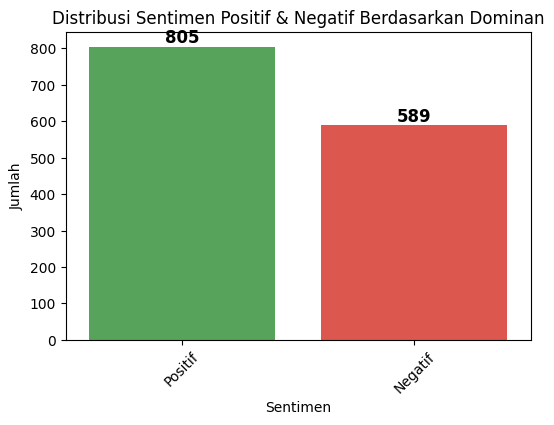

<ipython-input-8-8a2b01118bc7>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=aspect_counts.index, y=aspect_counts.values, palette="viridis")


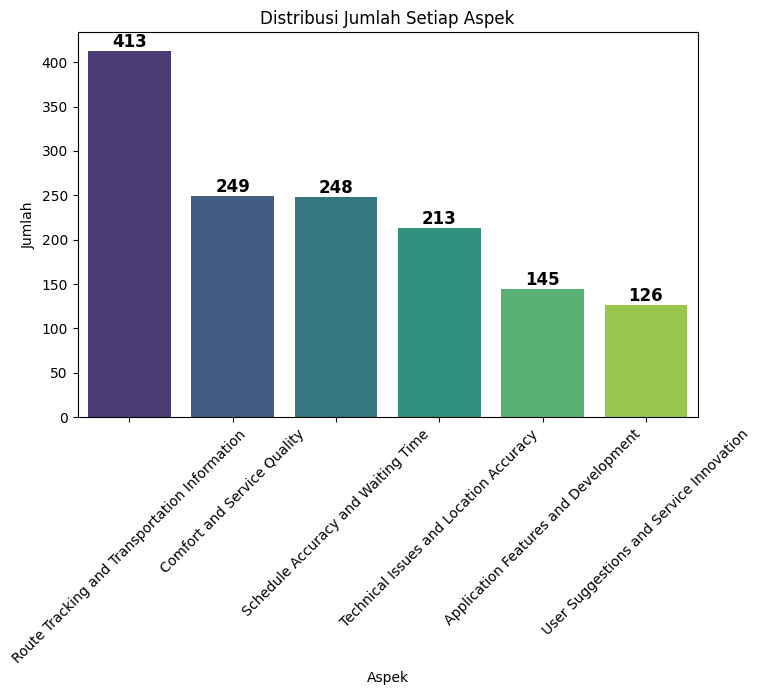

<Figure size 1000x600 with 0 Axes>

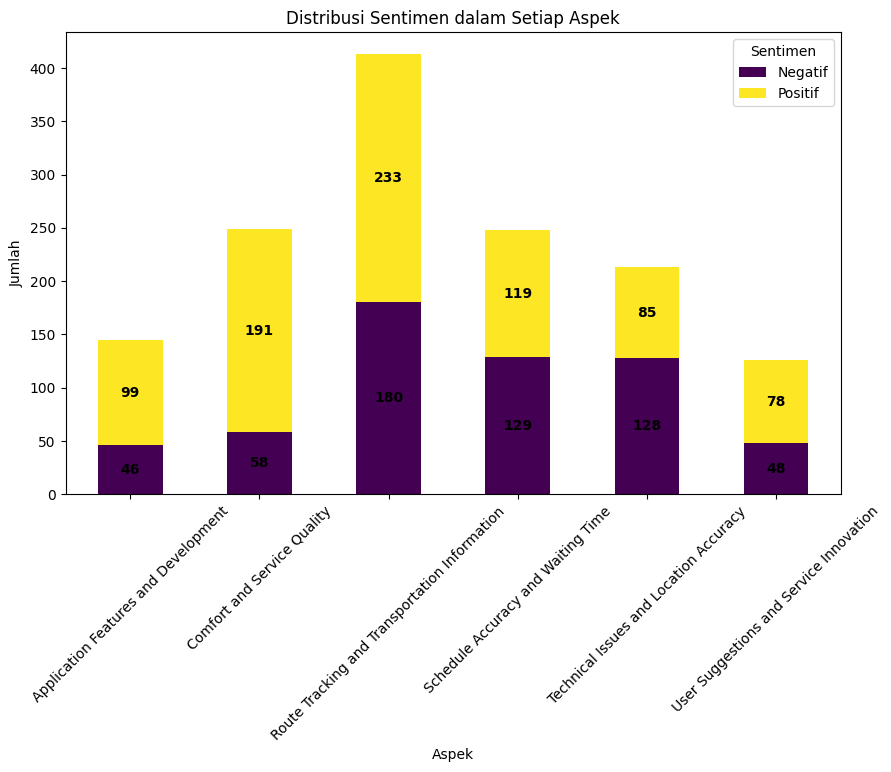

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# === Load dataset ===
file_path = "/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2)_sentimen.csv"
df_sentimen = pd.read_csv(file_path)

# === Plot Distribusi Sentimen Dominan ===
sentiment_counts = df_sentimen['Dominan_VAM'].value_counts()

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["#4CAF50", "#F44336", "#9E9E9E"])
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.title("Distribusi Sentimen Positif & Negatif Berdasarkan Dominan")
plt.xticks(rotation=45)

# Menambahkan label jumlah pada setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.show()

# === Plot Distribusi Aspek ===
if 'aspect_label_name' in df_sentimen.columns:
    aspect_counts = df_sentimen['aspect_label_name'].value_counts()

    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x=aspect_counts.index, y=aspect_counts.values, palette="viridis")
    plt.xlabel("Aspek")
    plt.ylabel("Jumlah")
    plt.title("Distribusi Jumlah Setiap Aspek")
    plt.xticks(rotation=45)

    # Menambahkan label jumlah pada setiap batang
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

    plt.show()

    # === Plot Distribusi Sentimen dalam Setiap Aspek ===
    sentiment_aspect_counts = df_sentimen.groupby(['aspect_label_name', 'Dominan_VAM']).size().unstack().fillna(0)

    plt.figure(figsize=(10, 6))
    sentiment_aspect_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
    plt.xlabel("Aspek")
    plt.ylabel("Jumlah")
    plt.title("Distribusi Sentimen dalam Setiap Aspek")
    plt.xticks(rotation=45)
    plt.legend(title="Sentimen")

    # Menambahkan label jumlah pada setiap batang
    for p in plt.gca().patches:
        height = p.get_height()
        if height > 0:
            plt.gca().annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                               ha='center', va='center', fontsize=10, color='black', fontweight='bold')

    plt.show()
else:
    print("⚠️ Kolom 'aspect_label_name' tidak ditemukan dalam dataset!")


In [ ]:
# Dominan sentimen
import pandas as pd
from collections import Counter

# === Load dataset ===
file_path = "/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2)_sentimen.csv"
df_sentimen = pd.read_csv(file_path)

# === Pastikan semua kolom sentimen ada ===
sentiment_columns = ['Vader', 'AFINN', 'Manual']

for col in sentiment_columns:
    if col not in df_sentimen.columns:
        print(f"⚠️ Kolom {col} tidak ditemukan dalam dataset!")

# === Fungsi untuk mencari sentimen dominan ===
def get_dominant_sentiment(row):
    sentiments = [row['Vader'], row['AFINN'], row['Manual']]

    # Hapus nilai kosong atau NaN
    sentiments = [s for s in sentiments if pd.notna(s) and s != '']

    if len(sentiments) == 0:
        return "Tidak Ada Data"  # Jika semua kosong

    # Hitung jumlah kemunculan tiap sentimen
    sentiment_counts = Counter(sentiments)

    # Ambil sentimen dengan jumlah kemunculan terbanyak
    dominant_sentiment = sentiment_counts.most_common(1)[0][0]

    return dominant_sentiment

# === Terapkan fungsi ke setiap baris ===
df_sentimen['Dominan_VAM'] = df_sentimen.apply(get_dominant_sentiment, axis=1)

# === Simpan kembali dataset dengan kolom Dominan ===
df_sentimen.to_csv(file_path, index=False)

# === Tampilkan hasil ===
print(df_sentimen[['review', 'Vader', 'AFINN', 'Manual', 'Dominan_VAM']].head())


                                              review    Vader    AFINN  \
0  Orang cuma mau liat posisi bus malah diwajibin...  Positif  Positif   
1  Aplikasi updatenya terbaru sudah seperti semul...  Positif  Positif   
2  Semoga jumlah armada makin banyak sehingga jar...  Positif  Positif   
3                Sudah login msh di suruh login lagi  Negatif  Positif   
4  Apaan sih, udah diundang malah gabisa lihat bi...  Negatif  Positif   

    Manual Dominan_VAM  
0  Positif     Positif  
1  Positif     Positif  
2  Positif     Positif  
3  Negatif     Negatif  
4  Negatif     Negatif  


In [ ]:
# Pilihan 2
import pandas as pd
import numpy as np
from statsmodels.stats.inter_rater import fleiss_kappa

# === Load dataset ===
file_path = "/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2)_sentimen.csv"
df_sentimen = pd.read_csv(file_path)

# === Pastikan kolom sentimen ada dan tidak kosong ===
sentiment_columns = ['Vader', 'TextBlob', 'Manual']

# Mengisi NaN dengan string kosong agar tidak menyebabkan error
df_sentimen[sentiment_columns] = df_sentimen[sentiment_columns].fillna("")

# === Konversi sentimen ke angka (Hanya 2 kelas: Positif, Negatif) ===
sentiment_mapping = {
    "Positif": 0,  # Gunakan indeks 0
    "Negatif": 1   # Gunakan indeks 1
}

# Pastikan hanya nilai valid yang dikonversi
for col in sentiment_columns:
    df_sentimen[col] = df_sentimen[col].map(sentiment_mapping)

# === Fungsi untuk membuat matriks Fleiss' Kappa ===
def create_fleiss_matrix(df, columns):
    categories = len(sentiment_mapping)  # Sekarang hanya 2 kategori (Positif, Negatif)
    matrix = []

    for _, row in df[columns].iterrows():
        counts = [0] * categories  # [Positif, Negatif]
        valid_values = row.dropna().astype(int)  # Hilangkan NaN dan ubah ke integer

        for value in valid_values:
            counts[value] += 1  # Hitung kemunculan tiap kategori

        # Pastikan jumlah anotasi sama di setiap baris
        if sum(counts) > 0:
            matrix.append(counts)

    return np.array(matrix)

# Buat matriks dari kolom sentimen
fleiss_matrix = create_fleiss_matrix(df_sentimen, sentiment_columns)

# === Hitung Fleiss' Kappa ===
if fleiss_matrix.size > 0:
    kappa_score = fleiss_kappa(fleiss_matrix)
    print(f"Fleiss’ Kappa Score: {kappa_score:.4f}")
else:
    print("⚠️ Tidak ada data valid untuk perhitungan Fleiss’ Kappa.")


Fleiss’ Kappa Score: 0.3000


In [ ]:
# Pilihan 3
import pandas as pd
import numpy as np
from statsmodels.stats.inter_rater import fleiss_kappa

# === Load dataset ===
file_path = "/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2)_sentimen.csv"
df_sentimen = pd.read_csv(file_path)

# === Pastikan kolom sentimen ada dan tidak kosong ===
sentiment_columns = ['TextBlob', 'AFINN', 'Manual']

# Mengisi NaN dengan string kosong agar tidak menyebabkan error
df_sentimen[sentiment_columns] = df_sentimen[sentiment_columns].fillna("")

# === Konversi sentimen ke angka (Hanya 2 kelas: Positif, Negatif) ===
sentiment_mapping = {
    "Positif": 0,  # Gunakan indeks 0
    "Negatif": 1   # Gunakan indeks 1
}

# Pastikan hanya nilai valid yang dikonversi
for col in sentiment_columns:
    df_sentimen[col] = df_sentimen[col].map(sentiment_mapping)

# === Fungsi untuk membuat matriks Fleiss' Kappa ===
def create_fleiss_matrix(df, columns):
    categories = len(sentiment_mapping)  # Sekarang hanya 2 kategori (Positif, Negatif)
    matrix = []

    for _, row in df[columns].iterrows():
        counts = [0] * categories  # [Positif, Negatif]
        valid_values = row.dropna().astype(int)  # Hilangkan NaN dan ubah ke integer

        for value in valid_values:
            counts[value] += 1  # Hitung kemunculan tiap kategori

        # Pastikan jumlah anotasi sama di setiap baris
        if sum(counts) > 0:
            matrix.append(counts)

    return np.array(matrix)

# Buat matriks dari kolom sentimen
fleiss_matrix = create_fleiss_matrix(df_sentimen, sentiment_columns)

# === Hitung Fleiss' Kappa ===
if fleiss_matrix.size > 0:
    kappa_score = fleiss_kappa(fleiss_matrix)
    print(f"Fleiss’ Kappa Score: {kappa_score:.4f}")
else:
    print("⚠️ Tidak ada data valid untuk perhitungan Fleiss’ Kappa.")


Fleiss’ Kappa Score: 0.2703


In [ ]:
# Pilihan 4
import pandas as pd
import numpy as np
from statsmodels.stats.inter_rater import fleiss_kappa

# === Load dataset ===
file_path = "/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2)_sentimen.csv"
df_sentimen = pd.read_csv(file_path)

# === Pastikan kolom sentimen ada dan tidak kosong ===
sentiment_columns = ['SentiWordNet', 'Pattern', 'Manual']

# Mengisi NaN dengan string kosong agar tidak menyebabkan error
df_sentimen[sentiment_columns] = df_sentimen[sentiment_columns].fillna("")

# === Konversi sentimen ke angka (Hanya 2 kelas: Positif, Negatif) ===
sentiment_mapping = {
    "Positif": 0,  # Gunakan indeks 0
    "Negatif": 1   # Gunakan indeks 1
}

# Pastikan hanya nilai valid yang dikonversi
for col in sentiment_columns:
    df_sentimen[col] = df_sentimen[col].map(sentiment_mapping)

# === Fungsi untuk membuat matriks Fleiss' Kappa ===
def create_fleiss_matrix(df, columns):
    categories = len(sentiment_mapping)  # Sekarang hanya 2 kategori (Positif, Negatif)
    matrix = []

    for _, row in df[columns].iterrows():
        counts = [0] * categories  # [Positif, Negatif]
        valid_values = row.dropna().astype(int)  # Hilangkan NaN dan ubah ke integer

        for value in valid_values:
            counts[value] += 1  # Hitung kemunculan tiap kategori

        # Pastikan jumlah anotasi sama di setiap baris
        if sum(counts) > 0:
            matrix.append(counts)

    return np.array(matrix)

# Buat matriks dari kolom sentimen
fleiss_matrix = create_fleiss_matrix(df_sentimen, sentiment_columns)

# === Hitung Fleiss' Kappa ===
if fleiss_matrix.size > 0:
    kappa_score = fleiss_kappa(fleiss_matrix)
    print(f"Fleiss’ Kappa Score: {kappa_score:.4f}")
else:
    print("⚠️ Tidak ada data valid untuk perhitungan Fleiss’ Kappa.")


Fleiss’ Kappa Score: 0.2536


In [ ]:
# Pilihan 5
import pandas as pd
import numpy as np
from statsmodels.stats.inter_rater import fleiss_kappa

# === Load dataset ===
file_path = "/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2)_sentimen.csv"
df_sentimen = pd.read_csv(file_path)

# === Pastikan kolom sentimen ada dan tidak kosong ===
sentiment_columns = ['SentiWordNet', 'Vader', 'Manual']

# Mengisi NaN dengan string kosong agar tidak menyebabkan error
df_sentimen[sentiment_columns] = df_sentimen[sentiment_columns].fillna("")

# === Konversi sentimen ke angka (Hanya 2 kelas: Positif, Negatif) ===
sentiment_mapping = {
    "Positif": 0,  # Gunakan indeks 0
    "Negatif": 1   # Gunakan indeks 1
}

# Pastikan hanya nilai valid yang dikonversi
for col in sentiment_columns:
    df_sentimen[col] = df_sentimen[col].map(sentiment_mapping)

# === Fungsi untuk membuat matriks Fleiss' Kappa ===
def create_fleiss_matrix(df, columns):
    categories = len(sentiment_mapping)  # Sekarang hanya 2 kategori (Positif, Negatif)
    matrix = []

    for _, row in df[columns].iterrows():
        counts = [0] * categories  # [Positif, Negatif]
        valid_values = row.dropna().astype(int)  # Hilangkan NaN dan ubah ke integer

        for value in valid_values:
            counts[value] += 1  # Hitung kemunculan tiap kategori

        # Pastikan jumlah anotasi sama di setiap baris
        if sum(counts) > 0:
            matrix.append(counts)

    return np.array(matrix)

# Buat matriks dari kolom sentimen
fleiss_matrix = create_fleiss_matrix(df_sentimen, sentiment_columns)

# === Hitung Fleiss' Kappa ===
if fleiss_matrix.size > 0:
    kappa_score = fleiss_kappa(fleiss_matrix)
    print(f"Fleiss’ Kappa Score: {kappa_score:.4f}")
else:
    print("⚠️ Tidak ada data valid untuk perhitungan Fleiss’ Kappa.")


Fleiss’ Kappa Score: 0.3455


In [ ]:
# Pilihan 6
import pandas as pd
import numpy as np
from statsmodels.stats.inter_rater import fleiss_kappa

# === Load dataset ===
file_path = "/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2)_sentimen.csv"
df_sentimen = pd.read_csv(file_path)

# === Pastikan kolom sentimen ada dan tidak kosong ===
sentiment_columns = ['Vader', 'Pattern', 'Manual']

# Mengisi NaN dengan string kosong agar tidak menyebabkan error
df_sentimen[sentiment_columns] = df_sentimen[sentiment_columns].fillna("")

# === Konversi sentimen ke angka (Hanya 2 kelas: Positif, Negatif) ===
sentiment_mapping = {
    "Positif": 0,  # Gunakan indeks 0
    "Negatif": 1   # Gunakan indeks 1
}

# Pastikan hanya nilai valid yang dikonversi
for col in sentiment_columns:
    df_sentimen[col] = df_sentimen[col].map(sentiment_mapping)

# === Fungsi untuk membuat matriks Fleiss' Kappa ===
def create_fleiss_matrix(df, columns):
    categories = len(sentiment_mapping)  # Sekarang hanya 2 kategori (Positif, Negatif)
    matrix = []

    for _, row in df[columns].iterrows():
        counts = [0] * categories  # [Positif, Negatif]
        valid_values = row.dropna().astype(int)  # Hilangkan NaN dan ubah ke integer

        for value in valid_values:
            counts[value] += 1  # Hitung kemunculan tiap kategori

        # Pastikan jumlah anotasi sama di setiap baris
        if sum(counts) > 0:
            matrix.append(counts)

    return np.array(matrix)

# Buat matriks dari kolom sentimen
fleiss_matrix = create_fleiss_matrix(df_sentimen, sentiment_columns)

# === Hitung Fleiss' Kappa ===
if fleiss_matrix.size > 0:
    kappa_score = fleiss_kappa(fleiss_matrix)
    print(f"Fleiss’ Kappa Score: {kappa_score:.4f}")
else:
    print("⚠️ Tidak ada data valid untuk perhitungan Fleiss’ Kappa.")


Fleiss’ Kappa Score: 0.3053


In [ ]:
# Pilihan 7
import pandas as pd
import numpy as np
from statsmodels.stats.inter_rater import fleiss_kappa

# === Load dataset ===
file_path = "/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2)_sentimen.csv"
df_sentimen = pd.read_csv(file_path)

# === Pastikan kolom sentimen ada dan tidak kosong ===
sentiment_columns = ['SentiWordNet', 'TextBlob', 'Manual']

# Mengisi NaN dengan string kosong agar tidak menyebabkan error
df_sentimen[sentiment_columns] = df_sentimen[sentiment_columns].fillna("")

# === Konversi sentimen ke angka (Hanya 2 kelas: Positif, Negatif) ===
sentiment_mapping = {
    "Positif": 0,  # Gunakan indeks 0
    "Negatif": 1   # Gunakan indeks 1
}

# Pastikan hanya nilai valid yang dikonversi
for col in sentiment_columns:
    df_sentimen[col] = df_sentimen[col].map(sentiment_mapping)

# === Fungsi untuk membuat matriks Fleiss' Kappa ===
def create_fleiss_matrix(df, columns):
    categories = len(sentiment_mapping)  # Sekarang hanya 2 kategori (Positif, Negatif)
    matrix = []

    for _, row in df[columns].iterrows():
        counts = [0] * categories  # [Positif, Negatif]
        valid_values = row.dropna().astype(int)  # Hilangkan NaN dan ubah ke integer

        for value in valid_values:
            counts[value] += 1  # Hitung kemunculan tiap kategori

        # Pastikan jumlah anotasi sama di setiap baris
        if sum(counts) > 0:
            matrix.append(counts)

    return np.array(matrix)

# Buat matriks dari kolom sentimen
fleiss_matrix = create_fleiss_matrix(df_sentimen, sentiment_columns)

# === Hitung Fleiss' Kappa ===
if fleiss_matrix.size > 0:
    kappa_score = fleiss_kappa(fleiss_matrix)
    print(f"Fleiss’ Kappa Score: {kappa_score:.4f}")
else:
    print("⚠️ Tidak ada data valid untuk perhitungan Fleiss’ Kappa.")


Fleiss’ Kappa Score: 0.2501


In [ ]:
# Pilihan 8 = TERPILIH
import pandas as pd
import numpy as np
from statsmodels.stats.inter_rater import fleiss_kappa

# === Load dataset ===
file_path = "/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2)_sentimen.csv"
df_sentimen = pd.read_csv(file_path)

# === Pastikan kolom sentimen ada dan tidak kosong ===
sentiment_columns = ['TextBlob', 'Pattern', 'Manual']

# Mengisi NaN dengan string kosong agar tidak menyebabkan error
df_sentimen[sentiment_columns] = df_sentimen[sentiment_columns].fillna("")

# === Konversi sentimen ke angka (Hanya 2 kelas: Positif, Negatif) ===
sentiment_mapping = {
    "Positif": 0,  # Gunakan indeks 0
    "Negatif": 1   # Gunakan indeks 1
}

# Pastikan hanya nilai valid yang dikonversi
for col in sentiment_columns:
    df_sentimen[col] = df_sentimen[col].map(sentiment_mapping)

# === Fungsi untuk membuat matriks Fleiss' Kappa ===
def create_fleiss_matrix(df, columns):
    categories = len(sentiment_mapping)  # Sekarang hanya 2 kategori (Positif, Negatif)
    matrix = []

    for _, row in df[columns].iterrows():
        counts = [0] * categories  # [Positif, Negatif]
        valid_values = row.dropna().astype(int)  # Hilangkan NaN dan ubah ke integer

        for value in valid_values:
            counts[value] += 1  # Hitung kemunculan tiap kategori

        # Pastikan jumlah anotasi sama di setiap baris
        if sum(counts) > 0:
            matrix.append(counts)

    return np.array(matrix)

# Buat matriks dari kolom sentimen
fleiss_matrix = create_fleiss_matrix(df_sentimen, sentiment_columns)

# === Hitung Fleiss' Kappa ===
if fleiss_matrix.size > 0:
    kappa_score = fleiss_kappa(fleiss_matrix)
    print(f"Fleiss’ Kappa Score: {kappa_score:.4f}")
else:
    print("⚠️ Tidak ada data valid untuk perhitungan Fleiss’ Kappa.")


Fleiss’ Kappa Score: 0.4064


<ipython-input-2-39f0949168d1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["#4CAF50", "#F44336", "#9E9E9E"])
<ipython-input-2-39f0949168d1>:13: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["#4CAF50", "#F44336", "#9E9E9E"])


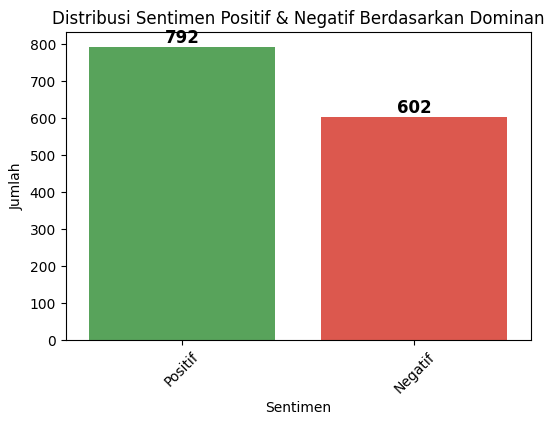

<ipython-input-2-39f0949168d1>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=aspect_counts.index, y=aspect_counts.values, palette="viridis")


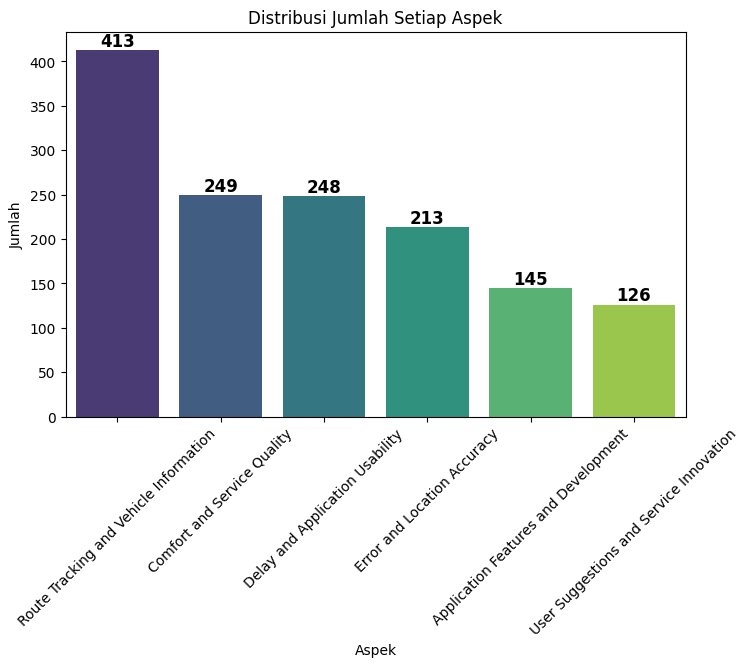

<Figure size 1000x600 with 0 Axes>

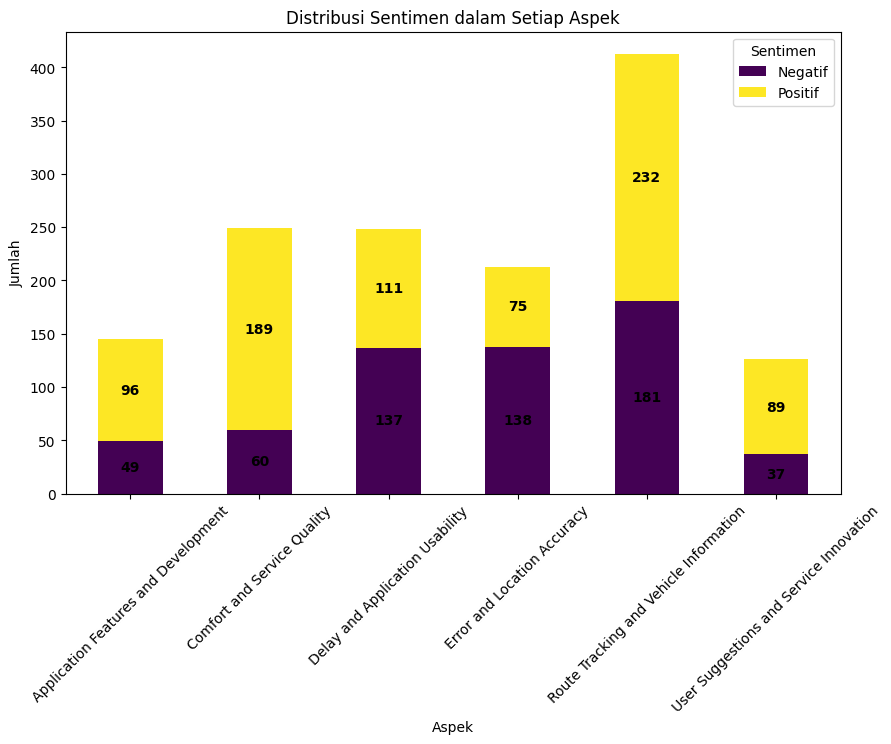

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# === Load dataset ===
file_path = "/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2)_sentimen (4).csv"
df_sentimen = pd.read_csv(file_path)

# === Plot Distribusi Sentimen Dominan ===
sentiment_counts = df_sentimen['Dominan_TPM'].value_counts()

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["#4CAF50", "#F44336", "#9E9E9E"])
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.title("Distribusi Sentimen Positif & Negatif Berdasarkan Dominan")
plt.xticks(rotation=45)

# Menambahkan label jumlah pada setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.show()

# === Plot Distribusi Aspek ===
if 'aspect_label_name' in df_sentimen.columns:
    aspect_counts = df_sentimen['aspect_label_name'].value_counts()

    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x=aspect_counts.index, y=aspect_counts.values, palette="viridis")
    plt.xlabel("Aspek")
    plt.ylabel("Jumlah")
    plt.title("Distribusi Jumlah Setiap Aspek")
    plt.xticks(rotation=45)

    # Menambahkan label jumlah pada setiap batang
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

    plt.show()

    # === Plot Distribusi Sentimen dalam Setiap Aspek ===
    sentiment_aspect_counts = df_sentimen.groupby(['aspect_label_name', 'Dominan_TPM']).size().unstack().fillna(0)

    plt.figure(figsize=(10, 6))
    sentiment_aspect_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
    plt.xlabel("Aspek")
    plt.ylabel("Jumlah")
    plt.title("Distribusi Sentimen dalam Setiap Aspek")
    plt.xticks(rotation=45)
    plt.legend(title="Sentimen")

    # Menambahkan label jumlah pada setiap batang
    for p in plt.gca().patches:
        height = p.get_height()
        if height > 0:
            plt.gca().annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                               ha='center', va='center', fontsize=10, color='black', fontweight='bold')

    plt.show()
else:
    print("⚠️ Kolom 'aspect_label_name' tidak ditemukan dalam dataset!")


In [ ]:
# DOMINAN SENTIMEN
import pandas as pd
from collections import Counter

# === Load dataset ===
file_path = "/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2)_sentimen (4).csv"
df_sentimen = pd.read_csv(file_path)

# === Pastikan semua kolom sentimen ada ===
sentiment_columns = ['TextBlob', 'Pattern', 'Manual']

for col in sentiment_columns:
    if col not in df_sentimen.columns:
        print(f"⚠️ Kolom {col} tidak ditemukan dalam dataset!")

# === Fungsi untuk mencari sentimen dominan ===
def get_dominant_sentiment(row):
    sentiments = [row['TextBlob'], row['Pattern'], row['Manual']]

    # Hapus nilai kosong atau NaN
    sentiments = [s for s in sentiments if pd.notna(s) and s != '']

    if len(sentiments) == 0:
        return "Tidak Ada Data"  # Jika semua kosong

    # Hitung jumlah kemunculan tiap sentimen
    sentiment_counts = Counter(sentiments)

    # Ambil sentimen dengan jumlah kemunculan terbanyak
    dominant_sentiment = sentiment_counts.most_common(1)[0][0]

    return dominant_sentiment

# === Terapkan fungsi ke setiap baris ===
df_sentimen['Dominan_TPM'] = df_sentimen.apply(get_dominant_sentiment, axis=1)

# === Simpan kembali dataset dengan kolom Dominan ===
df_sentimen.to_csv(file_path, index=False)

# === Tampilkan hasil ===
print(df_sentimen[['review', 'TextBlob', 'Pattern', 'Manual', 'Dominan_TPM']].head())


                                              review TextBlob  Pattern  \
0  Orang cuma mau liat posisi bus malah diwajibin...  Positif  Positif   
1  Aplikasi updatenya terbaru sudah seperti semul...  Positif  Positif   
2  Semoga jumlah armada makin banyak sehingga jar...  Positif  Positif   
3                Sudah login msh di suruh login lagi  Positif  Positif   
4  Apaan sih, udah diundang malah gabisa lihat bi...  Positif  Positif   

    Manual Dominan_TPM  
0  Positif     Positif  
1  Positif     Positif  
2  Positif     Positif  
3  Negatif     Positif  
4  Negatif     Positif  


# **Pembagian Data**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Baca data awal (misalnya hasil scraping dan preprocessing awal)
df = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/bahasa_split_gobis_reviews_terbaru2 (2)_sentimen (4).csv")  # Ganti nama file sesuai data kamu

# Split data awal menjadi 90% data modeling, 10% data validasi akhir
data_modeling, data_validasi_akhir = train_test_split(
    df, test_size=0.1, random_state=42
)

# Simpan ke file CSV untuk diproses di tahapan selanjutnya
data_modeling.to_csv("new_data_split_data_modeling.csv", index=False)
data_validasi_akhir.to_csv("new_data_split_data_validasi_akhir.csv", index=False)

print("Data awal berhasil dibagi:")
print(f"Data modeling: {data_modeling.shape[0]} baris")
print(f"Data validasi akhir: {data_validasi_akhir.shape[0]} baris")


Data awal berhasil dibagi:
Data modeling: 1254 baris
Data validasi akhir: 140 baris


# **Modeling**

## **Hold-out**

## **hold-out (Tanpa resampling)**

In [ ]:
# 90:10

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
import numpy as np

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi hasil global
y_true_all = []
y_pred_all = []
conf_matrix_total_all_aspects = np.zeros((len(data_modeling['Dominan_TPM'].unique()), len(data_modeling['Dominan_TPM'].unique())))  # Matrix untuk semua aspek

# Loop klasifikasi sentimen per aspek (tanpa resampling)
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    # Skip aspek dengan hanya 1 label sentimen
    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    # Split train-test 90:10
    train_data, test_data = train_test_split(
        df_aspect,
        test_size=0.1,
        random_state=42,
        stratify=df_aspect['Dominan_TPM']
    )

    print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

    # TF-IDF
    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
    X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

    y_train = train_data['Dominan_TPM']
    y_test = test_data['Dominan_TPM']

    # Klasifikasi tanpa resampling
    model = LinearSVC(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Simpan hasil global
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

    # Evaluasi per aspek
    print(f"\n📊 Hasil Evaluasi Sentimen (Tanpa Resampling) untuk Aspek: {aspect}")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix untuk aspek ini
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\n📊 Confusion Matrix untuk Aspek: {aspect}")
    print(conf_matrix)

    # Update confusion matrix total untuk semua aspek
    conf_matrix_total_all_aspects += conf_matrix

# Evaluasi akhir semua aspek (gabungan)
print("\n" + "="*100)
print("📊 EVALUASI AKHIR (Tanpa Resampling): Micro dan Macro F1-score Gabungan Semua Aspek")
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
accuracy = accuracy_score(y_true_all, y_pred_all)
print(f"✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")
print(f"✅ Accuracy (keseluruhan): {accuracy:.4f}")

# Tampilkan confusion matrix keseluruhan untuk semua aspek
print("\n📊 Confusion Matrix Keseluruhan Semua Aspek:")
print(conf_matrix_total_all_aspects)

# Tampilkan classification report keseluruhan
print(f"\n📊 Classification Report Keseluruhan (Semua Aspek):")
print(classification_report(y_true_all, y_pred_all, digits=4))


📌 ASPEK: Application Features and Development
Jumlah data train: 114 | test: 13

📊 Hasil Evaluasi Sentimen (Tanpa Resampling) untuk Aspek: Application Features and Development
              precision    recall  f1-score   support

     Negatif     0.6667    0.5000    0.5714         4
     Positif     0.8000    0.8889    0.8421         9

    accuracy                         0.7692        13
   macro avg     0.7333    0.6944    0.7068        13
weighted avg     0.7590    0.7692    0.7588        13


📊 Confusion Matrix untuk Aspek: Application Features and Development
[[2 2]
 [1 8]]
📌 ASPEK: User Suggestions and Service Innovation
Jumlah data train: 106 | test: 12

📊 Hasil Evaluasi Sentimen (Tanpa Resampling) untuk Aspek: User Suggestions and Service Innovation
              precision    recall  f1-score   support

     Negatif     0.0000    0.0000    0.0000         3
     Positif     0.7500    1.0000    0.8571         9

    accuracy                         0.7500        12
   macro avg

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 80:20

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
import numpy as np

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi hasil global
y_true_all = []
y_pred_all = []
conf_matrix_total_all_aspects = np.zeros((len(data_modeling['Dominan_TPM'].unique()), len(data_modeling['Dominan_TPM'].unique())))  # Matrix untuk semua aspek

# Loop klasifikasi sentimen per aspek (tanpa resampling)
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    # Skip aspek dengan hanya 1 label sentimen
    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    # Split train-test 90:10
    train_data, test_data = train_test_split(
        df_aspect,
        test_size=0.2,
        random_state=42,
        stratify=df_aspect['Dominan_TPM']
    )

    print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

    # TF-IDF
    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
    X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

    y_train = train_data['Dominan_TPM']
    y_test = test_data['Dominan_TPM']

    # Klasifikasi tanpa resampling
    model = LinearSVC(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Simpan hasil global
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

    # Evaluasi per aspek
    print(f"\n📊 Hasil Evaluasi Sentimen (Tanpa Resampling) untuk Aspek: {aspect}")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix untuk aspek ini
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\n📊 Confusion Matrix untuk Aspek: {aspect}")
    print(conf_matrix)

    # Update confusion matrix total untuk semua aspek
    conf_matrix_total_all_aspects += conf_matrix

# Evaluasi akhir semua aspek (gabungan)
print("\n" + "="*100)
print("📊 EVALUASI AKHIR (Tanpa Resampling): Micro dan Macro F1-score Gabungan Semua Aspek")
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
accuracy = accuracy_score(y_true_all, y_pred_all)
print(f"✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")
print(f"✅ Accuracy (keseluruhan): {accuracy:.4f}")

# Tampilkan confusion matrix keseluruhan untuk semua aspek
print("\n📊 Confusion Matrix Keseluruhan Semua Aspek:")
print(conf_matrix_total_all_aspects)

# Tampilkan classification report keseluruhan
print(f"\n📊 Classification Report Keseluruhan (Semua Aspek):")
print(classification_report(y_true_all, y_pred_all, digits=4))


📌 ASPEK: Application Features and Development
Jumlah data train: 101 | test: 26

📊 Hasil Evaluasi Sentimen (Tanpa Resampling) untuk Aspek: Application Features and Development
              precision    recall  f1-score   support

     Negatif     0.5000    0.3333    0.4000         9
     Positif     0.7000    0.8235    0.7568        17

    accuracy                         0.6538        26
   macro avg     0.6000    0.5784    0.5784        26
weighted avg     0.6308    0.6538    0.6333        26


📊 Confusion Matrix untuk Aspek: Application Features and Development
[[ 3  6]
 [ 3 14]]
📌 ASPEK: User Suggestions and Service Innovation
Jumlah data train: 94 | test: 24

📊 Hasil Evaluasi Sentimen (Tanpa Resampling) untuk Aspek: User Suggestions and Service Innovation
              precision    recall  f1-score   support

     Negatif     0.0000    0.0000    0.0000         7
     Positif     0.7083    1.0000    0.8293        17

    accuracy                         0.7083        24
   macro 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 70:30

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
import numpy as np

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi hasil global
y_true_all = []
y_pred_all = []
conf_matrix_total_all_aspects = np.zeros((len(data_modeling['Dominan_TPM'].unique()), len(data_modeling['Dominan_TPM'].unique())))  # Matrix untuk semua aspek

# Loop klasifikasi sentimen per aspek (tanpa resampling)
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    # Skip aspek dengan hanya 1 label sentimen
    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    # Split train-test 90:10
    train_data, test_data = train_test_split(
        df_aspect,
        test_size=0.3,
        random_state=42,
        stratify=df_aspect['Dominan_TPM']
    )

    print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

    # TF-IDF
    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
    X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

    y_train = train_data['Dominan_TPM']
    y_test = test_data['Dominan_TPM']

    # Klasifikasi tanpa resampling
    model = LinearSVC(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Simpan hasil global
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

    # Evaluasi per aspek
    print(f"\n📊 Hasil Evaluasi Sentimen (Tanpa Resampling) untuk Aspek: {aspect}")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix untuk aspek ini
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\n📊 Confusion Matrix untuk Aspek: {aspect}")
    print(conf_matrix)

    # Update confusion matrix total untuk semua aspek
    conf_matrix_total_all_aspects += conf_matrix

# Evaluasi akhir semua aspek (gabungan)
print("\n" + "="*100)
print("📊 EVALUASI AKHIR (Tanpa Resampling): Micro dan Macro F1-score Gabungan Semua Aspek")
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
accuracy = accuracy_score(y_true_all, y_pred_all)
print(f"✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")
print(f"✅ Accuracy (keseluruhan): {accuracy:.4f}")

# Tampilkan confusion matrix keseluruhan untuk semua aspek
print("\n📊 Confusion Matrix Keseluruhan Semua Aspek:")
print(conf_matrix_total_all_aspects)

# Tampilkan classification report keseluruhan
print(f"\n📊 Classification Report Keseluruhan (Semua Aspek):")
print(classification_report(y_true_all, y_pred_all, digits=4))


📌 ASPEK: Application Features and Development
Jumlah data train: 88 | test: 39

📊 Hasil Evaluasi Sentimen (Tanpa Resampling) untuk Aspek: Application Features and Development
              precision    recall  f1-score   support

     Negatif     0.5000    0.5385    0.5185        13
     Positif     0.7600    0.7308    0.7451        26

    accuracy                         0.6667        39
   macro avg     0.6300    0.6346    0.6318        39
weighted avg     0.6733    0.6667    0.6696        39


📊 Confusion Matrix untuk Aspek: Application Features and Development
[[ 7  6]
 [ 7 19]]
📌 ASPEK: User Suggestions and Service Innovation
Jumlah data train: 82 | test: 36

📊 Hasil Evaluasi Sentimen (Tanpa Resampling) untuk Aspek: User Suggestions and Service Innovation
              precision    recall  f1-score   support

     Negatif     0.6667    0.2000    0.3077        10
     Positif     0.7576    0.9615    0.8475        26

    accuracy                         0.7500        36
   macro a

## **hold-out (Classweighting)**

In [ ]:
# 90:10

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi hasil prediksi global
y_true_all = []
y_pred_all = []

# Loop klasifikasi sentimen per aspek
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    train_data, test_data = train_test_split(
        df_aspect,
        test_size=0.1,
        random_state=42,
        stratify=df_aspect['Dominan_TPM']
    )

    print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

    # TF-IDF
    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
    X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

    y_train = train_data['Dominan_TPM']
    y_test = test_data['Dominan_TPM']

    # 🔍 Model terbaik: ClassWeighting
    model = LinearSVC(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

    print(f"\n📊 Hasil Evaluasi Sentimen untuk Aspek: {aspect} (ClassWeighting)")
    print(classification_report(y_test, y_pred, digits=4))

# Evaluasi akhir seluruh aspek
print("\n" + "="*100)
print("📊 EVALUASI AKHIR: Micro dan Macro F1-score Keseluruhan (ClassWeighting)")
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
print(f"✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")


📌 ASPEK: Application Features and Development
Jumlah data train: 114 | test: 13

📊 Hasil Evaluasi Sentimen untuk Aspek: Application Features and Development (ClassWeighting)
              precision    recall  f1-score   support

     Negatif     0.5000    0.5000    0.5000         4
     Positif     0.7778    0.7778    0.7778         9

    accuracy                         0.6923        13
   macro avg     0.6389    0.6389    0.6389        13
weighted avg     0.6923    0.6923    0.6923        13

📌 ASPEK: User Suggestions and Service Innovation
Jumlah data train: 106 | test: 12

📊 Hasil Evaluasi Sentimen untuk Aspek: User Suggestions and Service Innovation (ClassWeighting)
              precision    recall  f1-score   support

     Negatif     0.0000    0.0000    0.0000         3
     Positif     0.7273    0.8889    0.8000         9

    accuracy                         0.6667        12
   macro avg     0.3636    0.4444    0.4000        12
weighted avg     0.5455    0.6667    0.6000    

In [ ]:
# 80:20

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi hasil prediksi global
y_true_all = []
y_pred_all = []

# Loop klasifikasi sentimen per aspek
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    train_data, test_data = train_test_split(
        df_aspect,
        test_size=0.2,
        random_state=42,
        stratify=df_aspect['Dominan_TPM']
    )

    print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

    # TF-IDF
    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
    X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

    y_train = train_data['Dominan_TPM']
    y_test = test_data['Dominan_TPM']

    # 🔍 Model terbaik: ClassWeighting
    model = LinearSVC(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

    print(f"\n📊 Hasil Evaluasi Sentimen untuk Aspek: {aspect} (ClassWeighting)")
    print(classification_report(y_test, y_pred, digits=4))

# Evaluasi akhir seluruh aspek
print("\n" + "="*100)
print("📊 EVALUASI AKHIR: Micro dan Macro F1-score Keseluruhan (ClassWeighting)")
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
print(f"✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")


📌 ASPEK: Application Features and Development
Jumlah data train: 101 | test: 26

📊 Hasil Evaluasi Sentimen untuk Aspek: Application Features and Development (ClassWeighting)
              precision    recall  f1-score   support

     Negatif     0.5714    0.4444    0.5000         9
     Positif     0.7368    0.8235    0.7778        17

    accuracy                         0.6923        26
   macro avg     0.6541    0.6340    0.6389        26
weighted avg     0.6796    0.6923    0.6816        26

📌 ASPEK: User Suggestions and Service Innovation
Jumlah data train: 94 | test: 24

📊 Hasil Evaluasi Sentimen untuk Aspek: User Suggestions and Service Innovation (ClassWeighting)
              precision    recall  f1-score   support

     Negatif     0.0000    0.0000    0.0000         7
     Positif     0.6957    0.9412    0.8000        17

    accuracy                         0.6667        24
   macro avg     0.3478    0.4706    0.4000        24
weighted avg     0.4928    0.6667    0.5667     

In [ ]:
# 70:30

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi hasil prediksi global
y_true_all = []
y_pred_all = []

# Loop klasifikasi sentimen per aspek
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    train_data, test_data = train_test_split(
        df_aspect,
        test_size=0.3,
        random_state=42,
        stratify=df_aspect['Dominan_TPM']
    )

    print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

    # TF-IDF
    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
    X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

    y_train = train_data['Dominan_TPM']
    y_test = test_data['Dominan_TPM']

    # 🔍 Model terbaik: ClassWeighting
    model = LinearSVC(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

    print(f"\n📊 Hasil Evaluasi Sentimen untuk Aspek: {aspect} (ClassWeighting)")
    print(classification_report(y_test, y_pred, digits=4))

# Evaluasi akhir seluruh aspek
print("\n" + "="*100)
print("📊 EVALUASI AKHIR: Micro dan Macro F1-score Keseluruhan (ClassWeighting)")
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
print(f"✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")


📌 ASPEK: Application Features and Development
Jumlah data train: 88 | test: 39

📊 Hasil Evaluasi Sentimen untuk Aspek: Application Features and Development (ClassWeighting)
              precision    recall  f1-score   support

     Negatif     0.5000    0.5385    0.5185        13
     Positif     0.7600    0.7308    0.7451        26

    accuracy                         0.6667        39
   macro avg     0.6300    0.6346    0.6318        39
weighted avg     0.6733    0.6667    0.6696        39

📌 ASPEK: User Suggestions and Service Innovation
Jumlah data train: 82 | test: 36

📊 Hasil Evaluasi Sentimen untuk Aspek: User Suggestions and Service Innovation (ClassWeighting)
              precision    recall  f1-score   support

     Negatif     0.5000    0.2000    0.2857        10
     Positif     0.7500    0.9231    0.8276        26

    accuracy                         0.7222        36
   macro avg     0.6250    0.5615    0.5567        36
weighted avg     0.6806    0.7222    0.6771      

## **hold-out (SMOTE)**

In [ ]:
# 90:10

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi untuk simpan hasil akhir
y_true_all = []
y_pred_all = []
conf_matrix_total_all_aspects = np.zeros((len(data_modeling['Dominan_TPM'].unique()), len(data_modeling['Dominan_TPM'].unique())))  # Matrix untuk semua aspek

# Loop klasifikasi sentimen per aspek
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    # Split data 90:10
    train_data, test_data = train_test_split(
        df_aspect,
        test_size=0.1,
        random_state=42,
        stratify=df_aspect['Dominan_TPM']
    )

    print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

    # TF-IDF
    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
    X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

    y_train = train_data['Dominan_TPM']
    y_test = test_data['Dominan_TPM']

    # SMOTE resampling
    sampler = SMOTE(random_state=42)
    try:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    except ValueError as e:
        print(f"❌ Gagal resampling: {e}")
        continue

    # Training model
    model = LinearSVC(random_state=42)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

    # Evaluasi per aspek
    print(f"\n📊 Hasil Evaluasi Sentimen untuk Aspek: {aspect}")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix untuk aspek ini
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\n📊 Confusion Matrix untuk Aspek: {aspect}")
    print(conf_matrix)

    # Update confusion matrix total untuk semua aspek
    conf_matrix_total_all_aspects += conf_matrix

# Evaluasi akhir seluruh aspek
print("\n" + "="*100)
print("📊 EVALUASI AKHIR: Micro dan Macro F1-score Keseluruhan (Gabungan Semua Aspek)")
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
accuracy = accuracy_score(y_true_all, y_pred_all)
print(f"✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")
print(f"✅ Accuracy (keseluruhan): {accuracy:.4f}")

# Tampilkan confusion matrix keseluruhan untuk semua aspek
print("\n📊 Confusion Matrix Keseluruhan Semua Aspek:")
print(conf_matrix_total_all_aspects)

# Tampilkan classification report keseluruhan
print(f"\n📊 Classification Report Keseluruhan (Semua Aspek):")
print(classification_report(y_true_all, y_pred_all, digits=4))


📌 ASPEK: Application Features and Development
Jumlah data train: 114 | test: 13

📊 Hasil Evaluasi Sentimen untuk Aspek: Application Features and Development
              precision    recall  f1-score   support

     Negatif     0.6667    0.5000    0.5714         4
     Positif     0.8000    0.8889    0.8421         9

    accuracy                         0.7692        13
   macro avg     0.7333    0.6944    0.7068        13
weighted avg     0.7590    0.7692    0.7588        13


📊 Confusion Matrix untuk Aspek: Application Features and Development
[[2 2]
 [1 8]]
📌 ASPEK: User Suggestions and Service Innovation
Jumlah data train: 106 | test: 12

📊 Hasil Evaluasi Sentimen untuk Aspek: User Suggestions and Service Innovation
              precision    recall  f1-score   support

     Negatif     0.0000    0.0000    0.0000         3
     Positif     0.7273    0.8889    0.8000         9

    accuracy                         0.6667        12
   macro avg     0.3636    0.4444    0.4000       

In [ ]:
# 80:20

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi untuk simpan hasil akhir
y_true_all = []
y_pred_all = []
conf_matrix_total_all_aspects = np.zeros((len(data_modeling['Dominan_TPM'].unique()), len(data_modeling['Dominan_TPM'].unique())))  # Matrix untuk semua aspek

# Loop klasifikasi sentimen per aspek
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    # Split data 80:20
    train_data, test_data = train_test_split(
        df_aspect,
        test_size=0.2,
        random_state=42,
        stratify=df_aspect['Dominan_TPM']
    )

    print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

    # TF-IDF
    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
    X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

    y_train = train_data['Dominan_TPM']
    y_test = test_data['Dominan_TPM']

    # SMOTE resampling
    sampler = SMOTE(random_state=42)
    try:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    except ValueError as e:
        print(f"❌ Gagal resampling: {e}")
        continue

    # Training model
    model = LinearSVC(random_state=42)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

    # Evaluasi per aspek
    print(f"\n📊 Hasil Evaluasi Sentimen untuk Aspek: {aspect}")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix untuk aspek ini
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\n📊 Confusion Matrix untuk Aspek: {aspect}")
    print(conf_matrix)

    # Update confusion matrix total untuk semua aspek
    conf_matrix_total_all_aspects += conf_matrix

# Evaluasi akhir seluruh aspek
print("\n" + "="*100)
print("📊 EVALUASI AKHIR: Micro dan Macro F1-score Keseluruhan (Gabungan Semua Aspek)")
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
accuracy = accuracy_score(y_true_all, y_pred_all)
print(f"✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")
print(f"✅ Accuracy (keseluruhan): {accuracy:.4f}")

# Tampilkan confusion matrix keseluruhan untuk semua aspek
print("\n📊 Confusion Matrix Keseluruhan Semua Aspek:")
print(conf_matrix_total_all_aspects)

# Tampilkan classification report keseluruhan
print(f"\n📊 Classification Report Keseluruhan (Semua Aspek):")
print(classification_report(y_true_all, y_pred_all, digits=4))


📌 ASPEK: Application Features and Development
Jumlah data train: 101 | test: 26

📊 Hasil Evaluasi Sentimen untuk Aspek: Application Features and Development
              precision    recall  f1-score   support

     Negatif     0.5000    0.3333    0.4000         9
     Positif     0.7000    0.8235    0.7568        17

    accuracy                         0.6538        26
   macro avg     0.6000    0.5784    0.5784        26
weighted avg     0.6308    0.6538    0.6333        26


📊 Confusion Matrix untuk Aspek: Application Features and Development
[[ 3  6]
 [ 3 14]]
📌 ASPEK: User Suggestions and Service Innovation
Jumlah data train: 94 | test: 24

📊 Hasil Evaluasi Sentimen untuk Aspek: User Suggestions and Service Innovation
              precision    recall  f1-score   support

     Negatif     0.0000    0.0000    0.0000         7
     Positif     0.6957    0.9412    0.8000        17

    accuracy                         0.6667        24
   macro avg     0.3478    0.4706    0.4000    

In [ ]:
# 70:30

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi untuk simpan hasil akhir
y_true_all = []
y_pred_all = []
conf_matrix_total_all_aspects = np.zeros((len(data_modeling['Dominan_TPM'].unique()), len(data_modeling['Dominan_TPM'].unique())))  # Matrix untuk semua aspek

# Loop klasifikasi sentimen per aspek
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    # Split data 80:20
    train_data, test_data = train_test_split(
        df_aspect,
        test_size=0.3,
        random_state=42,
        stratify=df_aspect['Dominan_TPM']
    )

    print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

    # TF-IDF
    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
    X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

    y_train = train_data['Dominan_TPM']
    y_test = test_data['Dominan_TPM']

    # SMOTE resampling
    sampler = SMOTE(random_state=42)
    try:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    except ValueError as e:
        print(f"❌ Gagal resampling: {e}")
        continue

    # Training model
    model = LinearSVC(random_state=42)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

    # Evaluasi per aspek
    print(f"\n📊 Hasil Evaluasi Sentimen untuk Aspek: {aspect}")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix untuk aspek ini
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\n📊 Confusion Matrix untuk Aspek: {aspect}")
    print(conf_matrix)

    # Update confusion matrix total untuk semua aspek
    conf_matrix_total_all_aspects += conf_matrix

# Evaluasi akhir seluruh aspek
print("\n" + "="*100)
print("📊 EVALUASI AKHIR: Micro dan Macro F1-score Keseluruhan (Gabungan Semua Aspek)")
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
accuracy = accuracy_score(y_true_all, y_pred_all)
print(f"✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")
print(f"✅ Accuracy (keseluruhan): {accuracy:.4f}")

# Tampilkan confusion matrix keseluruhan untuk semua aspek
print("\n📊 Confusion Matrix Keseluruhan Semua Aspek:")
print(conf_matrix_total_all_aspects)

# Tampilkan classification report keseluruhan
print(f"\n📊 Classification Report Keseluruhan (Semua Aspek):")
print(classification_report(y_true_all, y_pred_all, digits=4))


📌 ASPEK: Application Features and Development
Jumlah data train: 88 | test: 39

📊 Hasil Evaluasi Sentimen untuk Aspek: Application Features and Development
              precision    recall  f1-score   support

     Negatif     0.5000    0.5385    0.5185        13
     Positif     0.7600    0.7308    0.7451        26

    accuracy                         0.6667        39
   macro avg     0.6300    0.6346    0.6318        39
weighted avg     0.6733    0.6667    0.6696        39


📊 Confusion Matrix untuk Aspek: Application Features and Development
[[ 7  6]
 [ 7 19]]
📌 ASPEK: User Suggestions and Service Innovation
Jumlah data train: 82 | test: 36

📊 Hasil Evaluasi Sentimen untuk Aspek: User Suggestions and Service Innovation
              precision    recall  f1-score   support

     Negatif     0.5000    0.2000    0.2857        10
     Positif     0.7500    0.9231    0.8276        26

    accuracy                         0.7222        36
   macro avg     0.6250    0.5615    0.5567     

## **hold-out (ADASYN)**

In [ ]:
# 90:10

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
from imblearn.over_sampling import ADASYN
import numpy as np

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi dictionary untuk menyimpan hasil
results = {'ADASYN': {'y_true': [], 'y_pred': []}}

# Inisialisasi confusion matrix total untuk keseluruhan
conf_matrix_total_all_aspects = np.zeros((len(data_modeling['Dominan_TPM'].unique()), len(data_modeling['Dominan_TPM'].unique())))  # Matrix untuk semua aspek

# Loop klasifikasi sentimen per aspek
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    train_data, test_data = train_test_split(
        df_aspect,
        test_size=0.1,
        random_state=42,
        stratify=df_aspect['Dominan_TPM']
    )

    print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

    # TF-IDF
    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
    X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

    y_train = train_data['Dominan_TPM']
    y_test = test_data['Dominan_TPM']

    # Resampling dengan ADASYN
    print("-"*60)
    print("🔁 Metode: ADASYN")

    try:
        sampler = ADASYN(random_state=42)
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    except ValueError as e:
        print(f"❌ Gagal resampling: {e}")
        continue

    # Model
    model = LinearSVC(random_state=42)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    results['ADASYN']['y_true'].extend(y_test)
    results['ADASYN']['y_pred'].extend(y_pred)

    print(f"\n📊 Hasil Evaluasi Sentimen untuk Aspek: {aspect}")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix untuk aspek ini
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\n📊 Confusion Matrix untuk Aspek: {aspect}")
    print(conf_matrix)

    # Update confusion matrix total untuk semua aspek
    conf_matrix_total_all_aspects += conf_matrix

# Evaluasi keseluruhan
print("\n" + "="*100)
print("📊 EVALUASI AKHIR: Micro dan Macro F1-score Keseluruhan (Gabungan Semua Aspek)")

y_true_all = results['ADASYN']['y_true']
y_pred_all = results['ADASYN']['y_pred']
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
accuracy = accuracy_score(y_true_all, y_pred_all)

print(f"\n🧪 ADASYN")
print(f"✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")
print(f"✅ Accuracy (keseluruhan): {accuracy:.4f}")

# Tampilkan confusion matrix keseluruhan untuk semua aspek
print("\n📊 Confusion Matrix Keseluruhan Semua Aspek:")
print(conf_matrix_total_all_aspects)

# Tampilkan classification report keseluruhan
print(f"\n📊 Classification Report Keseluruhan (Semua Aspek):")
print(classification_report(y_true_all, y_pred_all, digits=4))


📌 ASPEK: Application Features and Development
Jumlah data train: 114 | test: 13
------------------------------------------------------------
🔁 Metode: ADASYN

📊 Hasil Evaluasi Sentimen untuk Aspek: Application Features and Development
              precision    recall  f1-score   support

     Negatif     0.5000    0.5000    0.5000         4
     Positif     0.7778    0.7778    0.7778         9

    accuracy                         0.6923        13
   macro avg     0.6389    0.6389    0.6389        13
weighted avg     0.6923    0.6923    0.6923        13


📊 Confusion Matrix untuk Aspek: Application Features and Development
[[2 2]
 [2 7]]
📌 ASPEK: User Suggestions and Service Innovation
Jumlah data train: 106 | test: 12
------------------------------------------------------------
🔁 Metode: ADASYN

📊 Hasil Evaluasi Sentimen untuk Aspek: User Suggestions and Service Innovation
              precision    recall  f1-score   support

     Negatif     0.0000    0.0000    0.0000         3
   

In [ ]:
# 80:20

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
from imblearn.over_sampling import ADASYN
import numpy as np

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi dictionary untuk menyimpan hasil
results = {'ADASYN': {'y_true': [], 'y_pred': []}}

# Inisialisasi confusion matrix total untuk keseluruhan
conf_matrix_total_all_aspects = np.zeros((len(data_modeling['Dominan_TPM'].unique()), len(data_modeling['Dominan_TPM'].unique())))  # Matrix untuk semua aspek

# Loop klasifikasi sentimen per aspek
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    train_data, test_data = train_test_split(
        df_aspect,
        test_size=0.2,
        random_state=42,
        stratify=df_aspect['Dominan_TPM']
    )

    print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

    # TF-IDF
    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
    X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

    y_train = train_data['Dominan_TPM']
    y_test = test_data['Dominan_TPM']

    # Resampling dengan ADASYN
    print("-"*60)
    print("🔁 Metode: ADASYN")

    try:
        sampler = ADASYN(random_state=42)
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    except ValueError as e:
        print(f"❌ Gagal resampling: {e}")
        continue

    # Model
    model = LinearSVC(random_state=42)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    results['ADASYN']['y_true'].extend(y_test)
    results['ADASYN']['y_pred'].extend(y_pred)

    print(f"\n📊 Hasil Evaluasi Sentimen untuk Aspek: {aspect}")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix untuk aspek ini
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\n📊 Confusion Matrix untuk Aspek: {aspect}")
    print(conf_matrix)

    # Update confusion matrix total untuk semua aspek
    conf_matrix_total_all_aspects += conf_matrix

# Evaluasi keseluruhan
print("\n" + "="*100)
print("📊 EVALUASI AKHIR: Micro dan Macro F1-score Keseluruhan (Gabungan Semua Aspek)")

y_true_all = results['ADASYN']['y_true']
y_pred_all = results['ADASYN']['y_pred']
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
accuracy = accuracy_score(y_true_all, y_pred_all)

print(f"\n🧪 ADASYN")
print(f"✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")
print(f"✅ Accuracy (keseluruhan): {accuracy:.4f}")

# Tampilkan confusion matrix keseluruhan untuk semua aspek
print("\n📊 Confusion Matrix Keseluruhan Semua Aspek:")
print(conf_matrix_total_all_aspects)

# Tampilkan classification report keseluruhan
print(f"\n📊 Classification Report Keseluruhan (Semua Aspek):")
print(classification_report(y_true_all, y_pred_all, digits=4))


📌 ASPEK: Application Features and Development
Jumlah data train: 101 | test: 26
------------------------------------------------------------
🔁 Metode: ADASYN

📊 Hasil Evaluasi Sentimen untuk Aspek: Application Features and Development
              precision    recall  f1-score   support

     Negatif     0.5714    0.4444    0.5000         9
     Positif     0.7368    0.8235    0.7778        17

    accuracy                         0.6923        26
   macro avg     0.6541    0.6340    0.6389        26
weighted avg     0.6796    0.6923    0.6816        26


📊 Confusion Matrix untuk Aspek: Application Features and Development
[[ 4  5]
 [ 3 14]]
📌 ASPEK: User Suggestions and Service Innovation
Jumlah data train: 94 | test: 24
------------------------------------------------------------
🔁 Metode: ADASYN

📊 Hasil Evaluasi Sentimen untuk Aspek: User Suggestions and Service Innovation
              precision    recall  f1-score   support

     Negatif     0.0000    0.0000    0.0000         7


In [ ]:
# 70:30

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
from imblearn.over_sampling import ADASYN
import numpy as np

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi dictionary untuk menyimpan hasil
results = {'ADASYN': {'y_true': [], 'y_pred': []}}

# Inisialisasi confusion matrix total untuk keseluruhan
conf_matrix_total_all_aspects = np.zeros((len(data_modeling['Dominan_TPM'].unique()), len(data_modeling['Dominan_TPM'].unique())))  # Matrix untuk semua aspek

# Loop klasifikasi sentimen per aspek
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    train_data, test_data = train_test_split(
        df_aspect,
        test_size=0.3,
        random_state=42,
        stratify=df_aspect['Dominan_TPM']
    )

    print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

    # TF-IDF
    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
    X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

    y_train = train_data['Dominan_TPM']
    y_test = test_data['Dominan_TPM']

    # Resampling dengan ADASYN
    print("-"*60)
    print("🔁 Metode: ADASYN")

    try:
        sampler = ADASYN(random_state=42)
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    except ValueError as e:
        print(f"❌ Gagal resampling: {e}")
        continue

    # Model
    model = LinearSVC(random_state=42)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    results['ADASYN']['y_true'].extend(y_test)
    results['ADASYN']['y_pred'].extend(y_pred)

    print(f"\n📊 Hasil Evaluasi Sentimen untuk Aspek: {aspect}")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix untuk aspek ini
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\n📊 Confusion Matrix untuk Aspek: {aspect}")
    print(conf_matrix)

    # Update confusion matrix total untuk semua aspek
    conf_matrix_total_all_aspects += conf_matrix

# Evaluasi keseluruhan
print("\n" + "="*100)
print("📊 EVALUASI AKHIR: Micro dan Macro F1-score Keseluruhan (Gabungan Semua Aspek)")

y_true_all = results['ADASYN']['y_true']
y_pred_all = results['ADASYN']['y_pred']
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
accuracy = accuracy_score(y_true_all, y_pred_all)

print(f"\n🧪 ADASYN")
print(f"✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")
print(f"✅ Accuracy (keseluruhan): {accuracy:.4f}")

# Tampilkan confusion matrix keseluruhan untuk semua aspek
print("\n📊 Confusion Matrix Keseluruhan Semua Aspek:")
print(conf_matrix_total_all_aspects)

# Tampilkan classification report keseluruhan
print(f"\n📊 Classification Report Keseluruhan (Semua Aspek):")
print(classification_report(y_true_all, y_pred_all, digits=4))


📌 ASPEK: Application Features and Development
Jumlah data train: 88 | test: 39
------------------------------------------------------------
🔁 Metode: ADASYN

📊 Hasil Evaluasi Sentimen untuk Aspek: Application Features and Development
              precision    recall  f1-score   support

     Negatif     0.5000    0.5385    0.5185        13
     Positif     0.7600    0.7308    0.7451        26

    accuracy                         0.6667        39
   macro avg     0.6300    0.6346    0.6318        39
weighted avg     0.6733    0.6667    0.6696        39


📊 Confusion Matrix untuk Aspek: Application Features and Development
[[ 7  6]
 [ 7 19]]
📌 ASPEK: User Suggestions and Service Innovation
Jumlah data train: 82 | test: 36
------------------------------------------------------------
🔁 Metode: ADASYN

📊 Hasil Evaluasi Sentimen untuk Aspek: User Suggestions and Service Innovation
              precision    recall  f1-score   support

     Negatif     0.5000    0.2000    0.2857        10
 

## **hold-out (SMOTETomek)**

In [ ]:
# 90:10

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
from imblearn.combine import SMOTETomek
import numpy as np

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi dictionary untuk menyimpan hasil global
results = {'SMOTETomek': {'y_true': [], 'y_pred': []}}

# Inisialisasi confusion matrix total untuk keseluruhan
conf_matrix_total_all_aspects = np.zeros((len(data_modeling['Dominan_TPM'].unique()), len(data_modeling['Dominan_TPM'].unique())))  # Matrix untuk semua aspek

# Loop klasifikasi sentimen per aspek
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    train_data, test_data = train_test_split(
        df_aspect,
        test_size=0.1,
        random_state=42,
        stratify=df_aspect['Dominan_TPM']
    )

    print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
    X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

    y_train = train_data['Dominan_TPM']
    y_test = test_data['Dominan_TPM']

    print("-"*60)
    print(f"🔁 Metode: SMOTETomek")

    sampler = SMOTETomek(random_state=42)
    try:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    except ValueError as e:
        print(f"❌ Gagal resampling: {e}")
        continue

    model = LinearSVC(random_state=42)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    results['SMOTETomek']['y_true'].extend(y_test)
    results['SMOTETomek']['y_pred'].extend(y_pred)

    print(f"\n📊 Hasil Evaluasi Sentimen untuk Aspek: {aspect} | Metode: SMOTETomek")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix untuk aspek ini
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\n📊 Confusion Matrix untuk Aspek: {aspect}")
    print(conf_matrix)

    # Update confusion matrix total untuk semua aspek
    conf_matrix_total_all_aspects += conf_matrix

# Evaluasi keseluruhan
print("\n" + "="*100)
print("📊 EVALUASI AKHIR: Micro dan Macro F1-score Keseluruhan (Gabungan Semua Aspek)")

y_true_all = results['SMOTETomek']['y_true']
y_pred_all = results['SMOTETomek']['y_pred']
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
accuracy = accuracy_score(y_true_all, y_pred_all)

print(f"\n🧪 SMOTETomek")
print(f"✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")
print(f"✅ Accuracy (keseluruhan): {accuracy:.4f}")

# Tampilkan confusion matrix keseluruhan untuk semua aspek
print("\n📊 Confusion Matrix Keseluruhan Semua Aspek:")
print(conf_matrix_total_all_aspects)

# Tampilkan classification report keseluruhan
print(f"\n📊 Classification Report Keseluruhan (Semua Aspek):")
print(classification_report(y_true_all, y_pred_all, digits=4))


📌 ASPEK: Application Features and Development
Jumlah data train: 114 | test: 13
------------------------------------------------------------
🔁 Metode: SMOTETomek

📊 Hasil Evaluasi Sentimen untuk Aspek: Application Features and Development | Metode: SMOTETomek
              precision    recall  f1-score   support

     Negatif     0.6667    0.5000    0.5714         4
     Positif     0.8000    0.8889    0.8421         9

    accuracy                         0.7692        13
   macro avg     0.7333    0.6944    0.7068        13
weighted avg     0.7590    0.7692    0.7588        13


📊 Confusion Matrix untuk Aspek: Application Features and Development
[[2 2]
 [1 8]]
📌 ASPEK: User Suggestions and Service Innovation
Jumlah data train: 106 | test: 12
------------------------------------------------------------
🔁 Metode: SMOTETomek

📊 Hasil Evaluasi Sentimen untuk Aspek: User Suggestions and Service Innovation | Metode: SMOTETomek
              precision    recall  f1-score   support

     Ne

In [ ]:
# 80:20

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
from imblearn.combine import SMOTETomek
import numpy as np

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi dictionary untuk menyimpan hasil global
results = {'SMOTETomek': {'y_true': [], 'y_pred': []}}

# Inisialisasi confusion matrix total untuk keseluruhan
conf_matrix_total_all_aspects = np.zeros((len(data_modeling['Dominan_TPM'].unique()), len(data_modeling['Dominan_TPM'].unique())))  # Matrix untuk semua aspek

# Loop klasifikasi sentimen per aspek
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    train_data, test_data = train_test_split(
        df_aspect,
        test_size=0.2,
        random_state=42,
        stratify=df_aspect['Dominan_TPM']
    )

    print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
    X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

    y_train = train_data['Dominan_TPM']
    y_test = test_data['Dominan_TPM']

    print("-"*60)
    print(f"🔁 Metode: SMOTETomek")

    sampler = SMOTETomek(random_state=42)
    try:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    except ValueError as e:
        print(f"❌ Gagal resampling: {e}")
        continue

    model = LinearSVC(random_state=42)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    results['SMOTETomek']['y_true'].extend(y_test)
    results['SMOTETomek']['y_pred'].extend(y_pred)

    print(f"\n📊 Hasil Evaluasi Sentimen untuk Aspek: {aspect} | Metode: SMOTETomek")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix untuk aspek ini
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\n📊 Confusion Matrix untuk Aspek: {aspect}")
    print(conf_matrix)

    # Update confusion matrix total untuk semua aspek
    conf_matrix_total_all_aspects += conf_matrix

# Evaluasi keseluruhan
print("\n" + "="*100)
print("📊 EVALUASI AKHIR: Micro dan Macro F1-score Keseluruhan (Gabungan Semua Aspek)")

y_true_all = results['SMOTETomek']['y_true']
y_pred_all = results['SMOTETomek']['y_pred']
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
accuracy = accuracy_score(y_true_all, y_pred_all)

print(f"\n🧪 SMOTETomek")
print(f"✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")
print(f"✅ Accuracy (keseluruhan): {accuracy:.4f}")

# Tampilkan confusion matrix keseluruhan untuk semua aspek
print("\n📊 Confusion Matrix Keseluruhan Semua Aspek:")
print(conf_matrix_total_all_aspects)

# Tampilkan classification report keseluruhan
print(f"\n📊 Classification Report Keseluruhan (Semua Aspek):")
print(classification_report(y_true_all, y_pred_all, digits=4))


📌 ASPEK: Application Features and Development
Jumlah data train: 101 | test: 26
------------------------------------------------------------
🔁 Metode: SMOTETomek

📊 Hasil Evaluasi Sentimen untuk Aspek: Application Features and Development | Metode: SMOTETomek
              precision    recall  f1-score   support

     Negatif     0.5000    0.3333    0.4000         9
     Positif     0.7000    0.8235    0.7568        17

    accuracy                         0.6538        26
   macro avg     0.6000    0.5784    0.5784        26
weighted avg     0.6308    0.6538    0.6333        26


📊 Confusion Matrix untuk Aspek: Application Features and Development
[[ 3  6]
 [ 3 14]]
📌 ASPEK: User Suggestions and Service Innovation
Jumlah data train: 94 | test: 24
------------------------------------------------------------
🔁 Metode: SMOTETomek

📊 Hasil Evaluasi Sentimen untuk Aspek: User Suggestions and Service Innovation | Metode: SMOTETomek
              precision    recall  f1-score   support

    

In [ ]:
# 70:30

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
from imblearn.combine import SMOTETomek
import numpy as np

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi dictionary untuk menyimpan hasil global
results = {'SMOTETomek': {'y_true': [], 'y_pred': []}}

# Inisialisasi confusion matrix total untuk keseluruhan
conf_matrix_total_all_aspects = np.zeros((len(data_modeling['Dominan_TPM'].unique()), len(data_modeling['Dominan_TPM'].unique())))  # Matrix untuk semua aspek

# Loop klasifikasi sentimen per aspek
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    train_data, test_data = train_test_split(
        df_aspect,
        test_size=0.3,
        random_state=42,
        stratify=df_aspect['Dominan_TPM']
    )

    print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
    X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

    y_train = train_data['Dominan_TPM']
    y_test = test_data['Dominan_TPM']

    print("-"*60)
    print(f"🔁 Metode: SMOTETomek")

    sampler = SMOTETomek(random_state=42)
    try:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    except ValueError as e:
        print(f"❌ Gagal resampling: {e}")
        continue

    model = LinearSVC(random_state=42)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    results['SMOTETomek']['y_true'].extend(y_test)
    results['SMOTETomek']['y_pred'].extend(y_pred)

    print(f"\n📊 Hasil Evaluasi Sentimen untuk Aspek: {aspect} | Metode: SMOTETomek")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix untuk aspek ini
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\n📊 Confusion Matrix untuk Aspek: {aspect}")
    print(conf_matrix)

    # Update confusion matrix total untuk semua aspek
    conf_matrix_total_all_aspects += conf_matrix

# Evaluasi keseluruhan
print("\n" + "="*100)
print("📊 EVALUASI AKHIR: Micro dan Macro F1-score Keseluruhan (Gabungan Semua Aspek)")

y_true_all = results['SMOTETomek']['y_true']
y_pred_all = results['SMOTETomek']['y_pred']
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
accuracy = accuracy_score(y_true_all, y_pred_all)

print(f"\n🧪 SMOTETomek")
print(f"✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")
print(f"✅ Accuracy (keseluruhan): {accuracy:.4f}")

# Tampilkan confusion matrix keseluruhan untuk semua aspek
print("\n📊 Confusion Matrix Keseluruhan Semua Aspek:")
print(conf_matrix_total_all_aspects)

# Tampilkan classification report keseluruhan
print(f"\n📊 Classification Report Keseluruhan (Semua Aspek):")
print(classification_report(y_true_all, y_pred_all, digits=4))


📌 ASPEK: Application Features and Development
Jumlah data train: 88 | test: 39
------------------------------------------------------------
🔁 Metode: SMOTETomek

📊 Hasil Evaluasi Sentimen untuk Aspek: Application Features and Development | Metode: SMOTETomek
              precision    recall  f1-score   support

     Negatif     0.5000    0.5385    0.5185        13
     Positif     0.7600    0.7308    0.7451        26

    accuracy                         0.6667        39
   macro avg     0.6300    0.6346    0.6318        39
weighted avg     0.6733    0.6667    0.6696        39


📊 Confusion Matrix untuk Aspek: Application Features and Development
[[ 7  6]
 [ 7 19]]
📌 ASPEK: User Suggestions and Service Innovation
Jumlah data train: 82 | test: 36
------------------------------------------------------------
🔁 Metode: SMOTETomek

📊 Hasil Evaluasi Sentimen untuk Aspek: User Suggestions and Service Innovation | Metode: SMOTETomek
              precision    recall  f1-score   support

     

## **hold-out (BorderlineSMOTE)**

In [ ]:
# 90:10

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
from imblearn.over_sampling import BorderlineSMOTE
import numpy as np

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi BorderlineSMOTE
sampler = BorderlineSMOTE(random_state=42)

# Inisialisasi dictionary untuk menyimpan hasil global
results = {'y_true': [], 'y_pred': []}

# Inisialisasi confusion matrix total untuk keseluruhan
conf_matrix_total_all_aspects = np.zeros((len(data_modeling['Dominan_TPM'].unique()), len(data_modeling['Dominan_TPM'].unique())))  # Matrix untuk semua aspek

# Loop klasifikasi sentimen per aspek
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    train_data, test_data = train_test_split(
        df_aspect,
        test_size=0.1,
        random_state=42,
        stratify=df_aspect['Dominan_TPM']
    )

    print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
    X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

    y_train = train_data['Dominan_TPM']
    y_test = test_data['Dominan_TPM']

    print("-"*60)
    print(f"🔁 Metode: BorderlineSMOTE")

    try:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    except ValueError as e:
        print(f"❌ Gagal resampling: {e}")
        continue

    model = LinearSVC(random_state=42)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    results['y_true'].extend(y_test)
    results['y_pred'].extend(y_pred)

    print(f"\n📊 Hasil Evaluasi Sentimen untuk Aspek: {aspect} | Metode: BorderlineSMOTE")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix untuk aspek ini
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\n📊 Confusion Matrix untuk Aspek: {aspect}")
    print(conf_matrix)

    # Update confusion matrix total untuk semua aspek
    conf_matrix_total_all_aspects += conf_matrix

# Evaluasi keseluruhan
print("\n" + "="*100)
print("📊 EVALUASI AKHIR: Micro dan Macro F1-score Keseluruhan (Gabungan Semua Aspek)")

y_true_all = results['y_true']
y_pred_all = results['y_pred']
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
accuracy = accuracy_score(y_true_all, y_pred_all)

print(f"\n🧪 BorderlineSMOTE")
print(f"✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")
print(f"✅ Accuracy (keseluruhan): {accuracy:.4f}")

# Tampilkan confusion matrix keseluruhan untuk semua aspek
print("\n📊 Confusion Matrix Keseluruhan Semua Aspek:")
print(conf_matrix_total_all_aspects)

# Tampilkan classification report keseluruhan
print(f"\n📊 Classification Report Keseluruhan (Semua Aspek):")
print(classification_report(y_true_all, y_pred_all, digits=4))


📌 ASPEK: Application Features and Development
Jumlah data train: 114 | test: 13
------------------------------------------------------------
🔁 Metode: BorderlineSMOTE

📊 Hasil Evaluasi Sentimen untuk Aspek: Application Features and Development | Metode: BorderlineSMOTE
              precision    recall  f1-score   support

     Negatif     0.6667    0.5000    0.5714         4
     Positif     0.8000    0.8889    0.8421         9

    accuracy                         0.7692        13
   macro avg     0.7333    0.6944    0.7068        13
weighted avg     0.7590    0.7692    0.7588        13


📊 Confusion Matrix untuk Aspek: Application Features and Development
[[2 2]
 [1 8]]
📌 ASPEK: User Suggestions and Service Innovation
Jumlah data train: 106 | test: 12
------------------------------------------------------------
🔁 Metode: BorderlineSMOTE

📊 Hasil Evaluasi Sentimen untuk Aspek: User Suggestions and Service Innovation | Metode: BorderlineSMOTE
              precision    recall  f1-scor

In [ ]:
# 80:20

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
from imblearn.over_sampling import BorderlineSMOTE
import numpy as np

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi BorderlineSMOTE
sampler = BorderlineSMOTE(random_state=42)

# Inisialisasi dictionary untuk menyimpan hasil global
results = {'y_true': [], 'y_pred': []}

# Inisialisasi confusion matrix total untuk keseluruhan
conf_matrix_total_all_aspects = np.zeros((len(data_modeling['Dominan_TPM'].unique()), len(data_modeling['Dominan_TPM'].unique())))  # Matrix untuk semua aspek

# Loop klasifikasi sentimen per aspek
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    train_data, test_data = train_test_split(
        df_aspect,
        test_size=0.2,
        random_state=42,
        stratify=df_aspect['Dominan_TPM']
    )

    print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
    X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

    y_train = train_data['Dominan_TPM']
    y_test = test_data['Dominan_TPM']

    print("-"*60)
    print(f"🔁 Metode: BorderlineSMOTE")

    try:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    except ValueError as e:
        print(f"❌ Gagal resampling: {e}")
        continue

    model = LinearSVC(random_state=42)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    results['y_true'].extend(y_test)
    results['y_pred'].extend(y_pred)

    print(f"\n📊 Hasil Evaluasi Sentimen untuk Aspek: {aspect} | Metode: BorderlineSMOTE")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix untuk aspek ini
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\n📊 Confusion Matrix untuk Aspek: {aspect}")
    print(conf_matrix)

    # Update confusion matrix total untuk semua aspek
    conf_matrix_total_all_aspects += conf_matrix

# Evaluasi keseluruhan
print("\n" + "="*100)
print("📊 EVALUASI AKHIR: Micro dan Macro F1-score Keseluruhan (Gabungan Semua Aspek)")

y_true_all = results['y_true']
y_pred_all = results['y_pred']
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
accuracy = accuracy_score(y_true_all, y_pred_all)

print(f"\n🧪 BorderlineSMOTE")
print(f"✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")
print(f"✅ Accuracy (keseluruhan): {accuracy:.4f}")

# Tampilkan confusion matrix keseluruhan untuk semua aspek
print("\n📊 Confusion Matrix Keseluruhan Semua Aspek:")
print(conf_matrix_total_all_aspects)

# Tampilkan classification report keseluruhan
print(f"\n📊 Classification Report Keseluruhan (Semua Aspek):")
print(classification_report(y_true_all, y_pred_all, digits=4))


📌 ASPEK: Application Features and Development
Jumlah data train: 101 | test: 26
------------------------------------------------------------
🔁 Metode: BorderlineSMOTE

📊 Hasil Evaluasi Sentimen untuk Aspek: Application Features and Development | Metode: BorderlineSMOTE
              precision    recall  f1-score   support

     Negatif     0.5000    0.3333    0.4000         9
     Positif     0.7000    0.8235    0.7568        17

    accuracy                         0.6538        26
   macro avg     0.6000    0.5784    0.5784        26
weighted avg     0.6308    0.6538    0.6333        26


📊 Confusion Matrix untuk Aspek: Application Features and Development
[[ 3  6]
 [ 3 14]]
📌 ASPEK: User Suggestions and Service Innovation
Jumlah data train: 94 | test: 24
------------------------------------------------------------
🔁 Metode: BorderlineSMOTE

📊 Hasil Evaluasi Sentimen untuk Aspek: User Suggestions and Service Innovation | Metode: BorderlineSMOTE
              precision    recall  f1-s

In [ ]:
# 70:30

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
from imblearn.over_sampling import BorderlineSMOTE
import numpy as np

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi BorderlineSMOTE
sampler = BorderlineSMOTE(random_state=42)

# Inisialisasi dictionary untuk menyimpan hasil global
results = {'y_true': [], 'y_pred': []}

# Inisialisasi confusion matrix total untuk keseluruhan
conf_matrix_total_all_aspects = np.zeros((len(data_modeling['Dominan_TPM'].unique()), len(data_modeling['Dominan_TPM'].unique())))  # Matrix untuk semua aspek

# Loop klasifikasi sentimen per aspek
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    train_data, test_data = train_test_split(
        df_aspect,
        test_size=0.3,
        random_state=42,
        stratify=df_aspect['Dominan_TPM']
    )

    print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
    X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

    y_train = train_data['Dominan_TPM']
    y_test = test_data['Dominan_TPM']

    print("-"*60)
    print(f"🔁 Metode: BorderlineSMOTE")

    try:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    except ValueError as e:
        print(f"❌ Gagal resampling: {e}")
        continue

    model = LinearSVC(random_state=42)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    results['y_true'].extend(y_test)
    results['y_pred'].extend(y_pred)

    print(f"\n📊 Hasil Evaluasi Sentimen untuk Aspek: {aspect} | Metode: BorderlineSMOTE")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix untuk aspek ini
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\n📊 Confusion Matrix untuk Aspek: {aspect}")
    print(conf_matrix)

    # Update confusion matrix total untuk semua aspek
    conf_matrix_total_all_aspects += conf_matrix

# Evaluasi keseluruhan
print("\n" + "="*100)
print("📊 EVALUASI AKHIR: Micro dan Macro F1-score Keseluruhan (Gabungan Semua Aspek)")

y_true_all = results['y_true']
y_pred_all = results['y_pred']
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
accuracy = accuracy_score(y_true_all, y_pred_all)

print(f"\n🧪 BorderlineSMOTE")
print(f"✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")
print(f"✅ Accuracy (keseluruhan): {accuracy:.4f}")

# Tampilkan confusion matrix keseluruhan untuk semua aspek
print("\n📊 Confusion Matrix Keseluruhan Semua Aspek:")
print(conf_matrix_total_all_aspects)

# Tampilkan classification report keseluruhan
print(f"\n📊 Classification Report Keseluruhan (Semua Aspek):")
print(classification_report(y_true_all, y_pred_all, digits=4))


📌 ASPEK: Application Features and Development
Jumlah data train: 88 | test: 39
------------------------------------------------------------
🔁 Metode: BorderlineSMOTE

📊 Hasil Evaluasi Sentimen untuk Aspek: Application Features and Development | Metode: BorderlineSMOTE
              precision    recall  f1-score   support

     Negatif     0.5000    0.5385    0.5185        13
     Positif     0.7600    0.7308    0.7451        26

    accuracy                         0.6667        39
   macro avg     0.6300    0.6346    0.6318        39
weighted avg     0.6733    0.6667    0.6696        39


📊 Confusion Matrix untuk Aspek: Application Features and Development
[[ 7  6]
 [ 7 19]]
📌 ASPEK: User Suggestions and Service Innovation
Jumlah data train: 82 | test: 36
------------------------------------------------------------
🔁 Metode: BorderlineSMOTE

📊 Hasil Evaluasi Sentimen untuk Aspek: User Suggestions and Service Innovation | Metode: BorderlineSMOTE
              precision    recall  f1-sc

## **hold-out (SMOTETomek + Classweight)**

In [ ]:
# ========================
# 90:10
# SMOTETomek + SVM + ClassWeight
# ========================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score
from imblearn.combine import SMOTETomek

# Load data
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi dictionary untuk menyimpan hasil
results = {'SMOTETomek_ClassWeight': {'y_true': [], 'y_pred': []}}

# Loop klasifikasi sentimen per aspek
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    train_data, test_data = train_test_split(
        df_aspect,
        test_size=0.1,
        random_state=42,
        stratify=df_aspect['Dominan_TPM']
    )

    print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

    # TF-IDF
    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
    X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

    y_train = train_data['Dominan_TPM']
    y_test = test_data['Dominan_TPM']

    # Resampling SMOTETomek
    print("-"*60)
    print(f"🔁 Metode: SMOTETomek + ClassWeighting")

    sampler = SMOTETomek(random_state=42)
    try:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    except ValueError as e:
        print(f"❌ Gagal resampling: {e}")
        continue

    # SVM dengan class_weight
    model = LinearSVC(class_weight='balanced', random_state=42)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    # Simpan hasil prediksi
    results['SMOTETomek_ClassWeight']['y_true'].extend(y_test)
    results['SMOTETomek_ClassWeight']['y_pred'].extend(y_pred)

    print(f"\n📊 Hasil Evaluasi Sentimen untuk Aspek: {aspect} | Metode: SMOTETomek + ClassWeighting")
    print(classification_report(y_test, y_pred, digits=4))

# Evaluasi keseluruhan
print("\n" + "="*100)
print("📊 EVALUASI AKHIR: Micro dan Macro F1-score Keseluruhan (Gabungan Semua Aspek)")

y_true_all = results['SMOTETomek_ClassWeight']['y_true']
y_pred_all = results['SMOTETomek_ClassWeight']['y_pred']
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')

print(f"\n🧪 SMOTETomek + ClassWeighting")
print(f"✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")


📌 ASPEK: Application Features and Development
Jumlah data train: 114 | test: 13
------------------------------------------------------------
🔁 Metode: SMOTETomek + ClassWeighting

📊 Hasil Evaluasi Sentimen untuk Aspek: Application Features and Development | Metode: SMOTETomek + ClassWeighting
              precision    recall  f1-score   support

     Negatif     0.6667    0.5000    0.5714         4
     Positif     0.8000    0.8889    0.8421         9

    accuracy                         0.7692        13
   macro avg     0.7333    0.6944    0.7068        13
weighted avg     0.7590    0.7692    0.7588        13

📌 ASPEK: User Suggestions and Service Innovation
Jumlah data train: 106 | test: 12
------------------------------------------------------------
🔁 Metode: SMOTETomek + ClassWeighting

📊 Hasil Evaluasi Sentimen untuk Aspek: User Suggestions and Service Innovation | Metode: SMOTETomek + ClassWeighting
              precision    recall  f1-score   support

     Negatif     0.0000 

In [ ]:
# ========================
# 80:20
# SMOTETomek + SVM + ClassWeight
# ========================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score
from imblearn.combine import SMOTETomek

# Load data
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi dictionary untuk menyimpan hasil
results = {'SMOTETomek_ClassWeight': {'y_true': [], 'y_pred': []}}

# Loop klasifikasi sentimen per aspek
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    train_data, test_data = train_test_split(
        df_aspect,
        test_size=0.2,
        random_state=42,
        stratify=df_aspect['Dominan_TPM']
    )

    print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

    # TF-IDF
    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
    X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

    y_train = train_data['Dominan_TPM']
    y_test = test_data['Dominan_TPM']

    # Resampling SMOTETomek
    print("-"*60)
    print(f"🔁 Metode: SMOTETomek + ClassWeighting")

    sampler = SMOTETomek(random_state=42)
    try:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    except ValueError as e:
        print(f"❌ Gagal resampling: {e}")
        continue

    # SVM dengan class_weight
    model = LinearSVC(class_weight='balanced', random_state=42)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    # Simpan hasil prediksi
    results['SMOTETomek_ClassWeight']['y_true'].extend(y_test)
    results['SMOTETomek_ClassWeight']['y_pred'].extend(y_pred)

    print(f"\n📊 Hasil Evaluasi Sentimen untuk Aspek: {aspect} | Metode: SMOTETomek + ClassWeighting")
    print(classification_report(y_test, y_pred, digits=4))

# Evaluasi keseluruhan
print("\n" + "="*100)
print("📊 EVALUASI AKHIR: Micro dan Macro F1-score Keseluruhan (Gabungan Semua Aspek)")

y_true_all = results['SMOTETomek_ClassWeight']['y_true']
y_pred_all = results['SMOTETomek_ClassWeight']['y_pred']
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')

print(f"\n🧪 SMOTETomek + ClassWeighting")
print(f"✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")


📌 ASPEK: Application Features and Development
Jumlah data train: 101 | test: 26
------------------------------------------------------------
🔁 Metode: SMOTETomek + ClassWeighting

📊 Hasil Evaluasi Sentimen untuk Aspek: Application Features and Development | Metode: SMOTETomek + ClassWeighting
              precision    recall  f1-score   support

     Negatif     0.5000    0.3333    0.4000         9
     Positif     0.7000    0.8235    0.7568        17

    accuracy                         0.6538        26
   macro avg     0.6000    0.5784    0.5784        26
weighted avg     0.6308    0.6538    0.6333        26

📌 ASPEK: User Suggestions and Service Innovation
Jumlah data train: 94 | test: 24
------------------------------------------------------------
🔁 Metode: SMOTETomek + ClassWeighting

📊 Hasil Evaluasi Sentimen untuk Aspek: User Suggestions and Service Innovation | Metode: SMOTETomek + ClassWeighting
              precision    recall  f1-score   support

     Negatif     0.0000  

In [ ]:
# ========================
# 70:30
# SMOTETomek + SVM + ClassWeight
# ========================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score
from imblearn.combine import SMOTETomek

# Load data
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi dictionary untuk menyimpan hasil
results = {'SMOTETomek_ClassWeight': {'y_true': [], 'y_pred': []}}

# Loop klasifikasi sentimen per aspek
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    train_data, test_data = train_test_split(
        df_aspect,
        test_size=0.3,
        random_state=42,
        stratify=df_aspect['Dominan_TPM']
    )

    print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

    # TF-IDF
    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
    X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

    y_train = train_data['Dominan_TPM']
    y_test = test_data['Dominan_TPM']

    # Resampling SMOTETomek
    print("-"*60)
    print(f"🔁 Metode: SMOTETomek + ClassWeighting")

    sampler = SMOTETomek(random_state=42)
    try:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    except ValueError as e:
        print(f"❌ Gagal resampling: {e}")
        continue

    # SVM dengan class_weight
    model = LinearSVC(class_weight='balanced', random_state=42)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    # Simpan hasil prediksi
    results['SMOTETomek_ClassWeight']['y_true'].extend(y_test)
    results['SMOTETomek_ClassWeight']['y_pred'].extend(y_pred)

    print(f"\n📊 Hasil Evaluasi Sentimen untuk Aspek: {aspect} | Metode: SMOTETomek + ClassWeighting")
    print(classification_report(y_test, y_pred, digits=4))

# Evaluasi keseluruhan
print("\n" + "="*100)
print("📊 EVALUASI AKHIR: Micro dan Macro F1-score Keseluruhan (Gabungan Semua Aspek)")

y_true_all = results['SMOTETomek_ClassWeight']['y_true']
y_pred_all = results['SMOTETomek_ClassWeight']['y_pred']
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')

print(f"\n🧪 SMOTETomek + ClassWeighting")
print(f"✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")


📌 ASPEK: Application Features and Development
Jumlah data train: 88 | test: 39
------------------------------------------------------------
🔁 Metode: SMOTETomek + ClassWeighting

📊 Hasil Evaluasi Sentimen untuk Aspek: Application Features and Development | Metode: SMOTETomek + ClassWeighting
              precision    recall  f1-score   support

     Negatif     0.5000    0.5385    0.5185        13
     Positif     0.7600    0.7308    0.7451        26

    accuracy                         0.6667        39
   macro avg     0.6300    0.6346    0.6318        39
weighted avg     0.6733    0.6667    0.6696        39

📌 ASPEK: User Suggestions and Service Innovation
Jumlah data train: 82 | test: 36
------------------------------------------------------------
🔁 Metode: SMOTETomek + ClassWeighting

📊 Hasil Evaluasi Sentimen untuk Aspek: User Suggestions and Service Innovation | Metode: SMOTETomek + ClassWeighting
              precision    recall  f1-score   support

     Negatif     0.5000   

## **hold-out (BorderlineSMOTE + Classweight)**

In [ ]:
# ========================
# 90:10
# BorderlineSMOTE + ClassWeight + SVM + Evaluasi Akhir
# ========================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score
from imblearn.over_sampling import BorderlineSMOTE

# Load data
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi BorderlineSMOTE
sampler = BorderlineSMOTE(random_state=42)

# Dictionary untuk menyimpan hasil semua aspek
all_y_true = []
all_y_pred = []

# Mulai loop per aspek
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    # Split data
    train_data, test_data = train_test_split(
        df_aspect,
        test_size=0.1,
        random_state=42,
        stratify=df_aspect['Dominan_TPM']
    )

    print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

    # TF-IDF
    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
    X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

    y_train = train_data['Dominan_TPM']
    y_test = test_data['Dominan_TPM']

    # BorderlineSMOTE
    print("-"*60)
    print("🔁 Resampling BorderlineSMOTE")

    try:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

        print(f"Jumlah data setelah resampling: {X_resampled.shape[0]}")

        # Training SVM dengan ClassWeight
        print("-"*60)
        print("🚀 Training SVM dengan ClassWeight di atas data hasil BorderlineSMOTE")

        model = LinearSVC(class_weight='balanced', random_state=42)
        model.fit(X_resampled, y_resampled)

        y_pred = model.predict(X_test)

        # Simpan hasil prediksi dan ground truth untuk evaluasi global
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)

        print(f"\n📊 Evaluasi per aspek: {aspect}")
        print(classification_report(y_test, y_pred, digits=4))

    except ValueError as e:
        print(f"❌ Gagal resampling: {e}")

# ============================
# EVALUASI AKHIR SEMUA ASPEK
# ============================
print("\n" + "="*100)
print("📊 EVALUASI GLOBAL: Micro dan Macro F1-score untuk semua aspek (gabungan)")

micro_f1 = f1_score(all_y_true, all_y_pred, average='micro')
macro_f1 = f1_score(all_y_true, all_y_pred, average='macro')

print(f"\n✅ Micro F1-score (gabungan semua aspek): {micro_f1:.4f}")
print(f"✅ Macro F1-score (gabungan semua aspek): {macro_f1:.4f}")


📌 ASPEK: Application Features and Development
Jumlah data train: 114 | test: 13
------------------------------------------------------------
🔁 Resampling BorderlineSMOTE
Jumlah data setelah resampling: 152
------------------------------------------------------------
🚀 Training SVM dengan ClassWeight di atas data hasil BorderlineSMOTE

📊 Evaluasi per aspek: Application Features and Development
              precision    recall  f1-score   support

     Negatif     0.6667    0.5000    0.5714         4
     Positif     0.8000    0.8889    0.8421         9

    accuracy                         0.7692        13
   macro avg     0.7333    0.6944    0.7068        13
weighted avg     0.7590    0.7692    0.7588        13

📌 ASPEK: User Suggestions and Service Innovation
Jumlah data train: 106 | test: 12
------------------------------------------------------------
🔁 Resampling BorderlineSMOTE
Jumlah data setelah resampling: 152
------------------------------------------------------------
🚀 Train

In [ ]:
# ========================
# 80:20
# BorderlineSMOTE + ClassWeight + SVM + Evaluasi Akhir
# ========================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score
from imblearn.over_sampling import BorderlineSMOTE

# Load data
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi BorderlineSMOTE
sampler = BorderlineSMOTE(random_state=42)

# Dictionary untuk menyimpan hasil semua aspek
all_y_true = []
all_y_pred = []

# Mulai loop per aspek
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    # Split data
    train_data, test_data = train_test_split(
        df_aspect,
        test_size=0.2,
        random_state=42,
        stratify=df_aspect['Dominan_TPM']
    )

    print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

    # TF-IDF
    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
    X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

    y_train = train_data['Dominan_TPM']
    y_test = test_data['Dominan_TPM']

    # BorderlineSMOTE
    print("-"*60)
    print("🔁 Resampling BorderlineSMOTE")

    try:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

        print(f"Jumlah data setelah resampling: {X_resampled.shape[0]}")

        # Training SVM dengan ClassWeight
        print("-"*60)
        print("🚀 Training SVM dengan ClassWeight di atas data hasil BorderlineSMOTE")

        model = LinearSVC(class_weight='balanced', random_state=42)
        model.fit(X_resampled, y_resampled)

        y_pred = model.predict(X_test)

        # Simpan hasil prediksi dan ground truth untuk evaluasi global
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)

        print(f"\n📊 Evaluasi per aspek: {aspect}")
        print(classification_report(y_test, y_pred, digits=4))

    except ValueError as e:
        print(f"❌ Gagal resampling: {e}")

# ============================
# EVALUASI AKHIR SEMUA ASPEK
# ============================
print("\n" + "="*100)
print("📊 EVALUASI GLOBAL: Micro dan Macro F1-score untuk semua aspek (gabungan)")

micro_f1 = f1_score(all_y_true, all_y_pred, average='micro')
macro_f1 = f1_score(all_y_true, all_y_pred, average='macro')

print(f"\n✅ Micro F1-score (gabungan semua aspek): {micro_f1:.4f}")
print(f"✅ Macro F1-score (gabungan semua aspek): {macro_f1:.4f}")


📌 ASPEK: Application Features and Development
Jumlah data train: 101 | test: 26
------------------------------------------------------------
🔁 Resampling BorderlineSMOTE
Jumlah data setelah resampling: 136
------------------------------------------------------------
🚀 Training SVM dengan ClassWeight di atas data hasil BorderlineSMOTE

📊 Evaluasi per aspek: Application Features and Development
              precision    recall  f1-score   support

     Negatif     0.5000    0.3333    0.4000         9
     Positif     0.7000    0.8235    0.7568        17

    accuracy                         0.6538        26
   macro avg     0.6000    0.5784    0.5784        26
weighted avg     0.6308    0.6538    0.6333        26

📌 ASPEK: User Suggestions and Service Innovation
Jumlah data train: 94 | test: 24
------------------------------------------------------------
🔁 Resampling BorderlineSMOTE
Jumlah data setelah resampling: 136
------------------------------------------------------------
🚀 Traini

In [ ]:
# ========================
# 70:30
# BorderlineSMOTE + ClassWeight + SVM + Evaluasi Akhir
# ========================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score
from imblearn.over_sampling import BorderlineSMOTE

# Load data
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi BorderlineSMOTE
sampler = BorderlineSMOTE(random_state=42)

# Dictionary untuk menyimpan hasil semua aspek
all_y_true = []
all_y_pred = []

# Mulai loop per aspek
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    # Split data
    train_data, test_data = train_test_split(
        df_aspect,
        test_size=0.3,
        random_state=42,
        stratify=df_aspect['Dominan_TPM']
    )

    print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

    # TF-IDF
    tfidf = TfidfVectorizer(max_features=5000)
    X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
    X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

    y_train = train_data['Dominan_TPM']
    y_test = test_data['Dominan_TPM']

    # BorderlineSMOTE
    print("-"*60)
    print("🔁 Resampling BorderlineSMOTE")

    try:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

        print(f"Jumlah data setelah resampling: {X_resampled.shape[0]}")

        # Training SVM dengan ClassWeight
        print("-"*60)
        print("🚀 Training SVM dengan ClassWeight di atas data hasil BorderlineSMOTE")

        model = LinearSVC(class_weight='balanced', random_state=42)
        model.fit(X_resampled, y_resampled)

        y_pred = model.predict(X_test)

        # Simpan hasil prediksi dan ground truth untuk evaluasi global
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)

        print(f"\n📊 Evaluasi per aspek: {aspect}")
        print(classification_report(y_test, y_pred, digits=4))

    except ValueError as e:
        print(f"❌ Gagal resampling: {e}")

# ============================
# EVALUASI AKHIR SEMUA ASPEK
# ============================
print("\n" + "="*100)
print("📊 EVALUASI GLOBAL: Micro dan Macro F1-score untuk semua aspek (gabungan)")

micro_f1 = f1_score(all_y_true, all_y_pred, average='micro')
macro_f1 = f1_score(all_y_true, all_y_pred, average='macro')

print(f"\n✅ Micro F1-score (gabungan semua aspek): {micro_f1:.4f}")
print(f"✅ Macro F1-score (gabungan semua aspek): {macro_f1:.4f}")


📌 ASPEK: Application Features and Development
Jumlah data train: 88 | test: 39
------------------------------------------------------------
🔁 Resampling BorderlineSMOTE
Jumlah data setelah resampling: 118
------------------------------------------------------------
🚀 Training SVM dengan ClassWeight di atas data hasil BorderlineSMOTE

📊 Evaluasi per aspek: Application Features and Development
              precision    recall  f1-score   support

     Negatif     0.5000    0.5385    0.5185        13
     Positif     0.7600    0.7308    0.7451        26

    accuracy                         0.6667        39
   macro avg     0.6300    0.6346    0.6318        39
weighted avg     0.6733    0.6667    0.6696        39

📌 ASPEK: User Suggestions and Service Innovation
Jumlah data train: 82 | test: 36
------------------------------------------------------------
🔁 Resampling BorderlineSMOTE
Jumlah data setelah resampling: 118
------------------------------------------------------------
🚀 Trainin

## **Cross-validation**

## **cross-val (Data Normal)**

In [ ]:
# fold = 5

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi hasil global
y_true_all = []
y_pred_all = []
conf_matrix_total_all_aspects = np.zeros((len(data_modeling['Dominan_TPM'].unique()), len(data_modeling['Dominan_TPM'].unique())))  # Matrix untuk semua aspek

# Loop klasifikasi sentimen per aspek (dengan cross-validation)
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    # Skip aspek dengan hanya 1 label sentimen
    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    # Cross-validation setup dengan StratifiedKFold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    fold = 1
    conf_matrix_total = np.zeros((len(df_aspect['Dominan_TPM'].unique()), len(df_aspect['Dominan_TPM'].unique())))  # Inisialisasi matrix confusion per aspek

    for train_index, test_index in skf.split(df_aspect['tokens_cleaned6'], df_aspect['Dominan_TPM']):
        print(f"\n🔄 Fold {fold}:")

        # Membagi data berdasarkan indeks fold
        train_data, test_data = df_aspect.iloc[train_index], df_aspect.iloc[test_index]
        print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

        # TF-IDF
        tfidf = TfidfVectorizer(max_features=5000)
        X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
        X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

        y_train = train_data['Dominan_TPM']
        y_test = test_data['Dominan_TPM']

        # Klasifikasi
        model = LinearSVC(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Simpan hasil global
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

        # Update confusion matrix total untuk setiap fold
        fold_conf_matrix = confusion_matrix(y_test, y_pred)
        conf_matrix_total += fold_conf_matrix

        fold += 1

    # Update confusion matrix keseluruhan untuk semua aspek
    conf_matrix_total_all_aspects += conf_matrix_total

    # Tampilkan confusion matrix per aspek
    print(f"\n📊 Confusion Matrix untuk Aspek: {aspect}")
    print(conf_matrix_total)

    # Tampilkan classification report untuk aspek ini (precision, recall, f1-score)
    print(f"\n📊 Classification Report untuk Aspek: {aspect}")
    print(classification_report(y_test, y_pred, digits=4))

# Evaluasi akhir semua fold (gabungan)
print("\n" + "="*100)
print("📊 EVALUASI AKHIR (Cross-Validation): Micro dan Macro F1-score Gabungan Semua Fold")
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
print(f"\n✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")

# Tampilkan confusion matrix keseluruhan untuk semua aspek
print("\n📊 Confusion Matrix Keseluruhan Semua Aspek:")
print(conf_matrix_total_all_aspects)

# Tampilkan classification report keseluruhan
print(f"\n📊 Classification Report Keseluruhan (Semua Aspek):")
print(classification_report(y_true_all, y_pred_all, digits=4))


📌 ASPEK: Application Features and Development

🔄 Fold 1:
Jumlah data train: 101 | test: 26

🔄 Fold 2:
Jumlah data train: 101 | test: 26

🔄 Fold 3:
Jumlah data train: 102 | test: 25

🔄 Fold 4:
Jumlah data train: 102 | test: 25

🔄 Fold 5:
Jumlah data train: 102 | test: 25

📊 Confusion Matrix untuk Aspek: Application Features and Development
[[16. 26.]
 [12. 73.]]

📊 Classification Report untuk Aspek: Application Features and Development
              precision    recall  f1-score   support

     Negatif     0.6000    0.7500    0.6667         8
     Positif     0.8667    0.7647    0.8125        17

    accuracy                         0.7600        25
   macro avg     0.7333    0.7574    0.7396        25
weighted avg     0.7813    0.7600    0.7658        25

📌 ASPEK: User Suggestions and Service Innovation

🔄 Fold 1:
Jumlah data train: 94 | test: 24

🔄 Fold 2:
Jumlah data train: 94 | test: 24

🔄 Fold 3:
Jumlah data train: 94 | test: 24

🔄 Fold 4:
Jumlah data train: 95 | test: 23

🔄 Fold 5

📌 ASPEK: Application Features and Development

🔄 Fold 1:
Jumlah data train: 114 | test: 13

🔄 Fold 2:
Jumlah data train: 114 | test: 13

🔄 Fold 3:
Jumlah data train: 114 | test: 13

🔄 Fold 4:
Jumlah data train: 114 | test: 13

🔄 Fold 5:
Jumlah data train: 114 | test: 13

🔄 Fold 6:
Jumlah data train: 114 | test: 13

🔄 Fold 7:
Jumlah data train: 114 | test: 13

🔄 Fold 8:
Jumlah data train: 115 | test: 12

🔄 Fold 9:
Jumlah data train: 115 | test: 12

🔄 Fold 10:
Jumlah data train: 115 | test: 12

📊 Confusion Matrix untuk Aspek: Application Features and Development
[[17. 25.]
 [10. 75.]]

📊 Classification Report untuk Aspek: Application Features and Development
              precision    recall  f1-score   support

     Negatif     1.0000    0.7500    0.8571         4
     Positif     0.8889    1.0000    0.9412         8

    accuracy                         0.9167        12
   macro avg     0.9444    0.8750    0.8992        12
weighted avg     0.9259    0.9167    0.9132        12



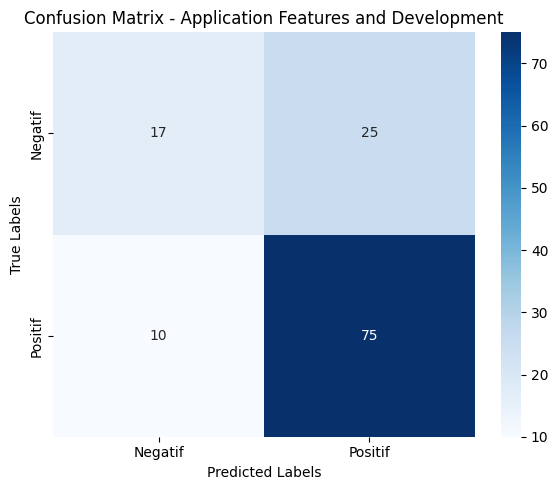

📌 ASPEK: User Suggestions and Service Innovation

🔄 Fold 1:
Jumlah data train: 106 | test: 12

🔄 Fold 2:
Jumlah data train: 106 | test: 12

🔄 Fold 3:
Jumlah data train: 106 | test: 12

🔄 Fold 4:
Jumlah data train: 106 | test: 12

🔄 Fold 5:
Jumlah data train: 106 | test: 12

🔄 Fold 6:
Jumlah data train: 106 | test: 12

🔄 Fold 7:
Jumlah data train: 106 | test: 12

🔄 Fold 8:
Jumlah data train: 106 | test: 12

🔄 Fold 9:
Jumlah data train: 107 | test: 11

🔄 Fold 10:
Jumlah data train: 107 | test: 11

📊 Confusion Matrix untuk Aspek: User Suggestions and Service Innovation
[[12. 21.]
 [ 4. 81.]]

📊 Classification Report untuk Aspek: User Suggestions and Service Innovation
              precision    recall  f1-score   support

     Negatif     1.0000    0.3333    0.5000         3
     Positif     0.8000    1.0000    0.8889         8

    accuracy                         0.8182        11
   macro avg     0.9000    0.6667    0.6944        11
weighted avg     0.8545    0.8182    0.7828        11


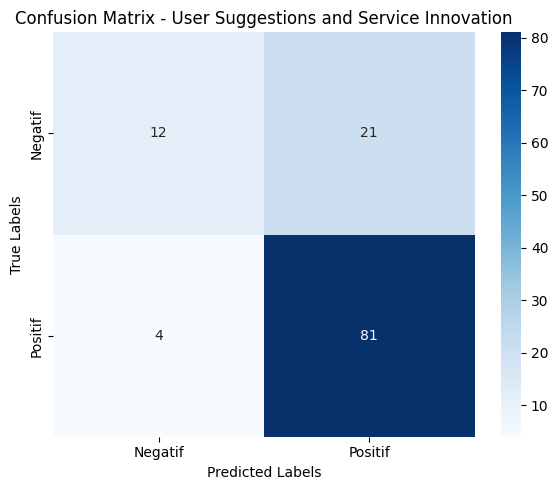

📌 ASPEK: Error and Location Accuracy

🔄 Fold 1:
Jumlah data train: 180 | test: 20

🔄 Fold 2:
Jumlah data train: 180 | test: 20

🔄 Fold 3:
Jumlah data train: 180 | test: 20

🔄 Fold 4:
Jumlah data train: 180 | test: 20

🔄 Fold 5:
Jumlah data train: 180 | test: 20

🔄 Fold 6:
Jumlah data train: 180 | test: 20

🔄 Fold 7:
Jumlah data train: 180 | test: 20

🔄 Fold 8:
Jumlah data train: 180 | test: 20

🔄 Fold 9:
Jumlah data train: 180 | test: 20

🔄 Fold 10:
Jumlah data train: 180 | test: 20

📊 Confusion Matrix untuk Aspek: Error and Location Accuracy
[[116.  15.]
 [ 34.  35.]]

📊 Classification Report untuk Aspek: Error and Location Accuracy
              precision    recall  f1-score   support

     Negatif     0.7059    0.9231    0.8000        13
     Positif     0.6667    0.2857    0.4000         7

    accuracy                         0.7000        20
   macro avg     0.6863    0.6044    0.6000        20
weighted avg     0.6922    0.7000    0.6600        20



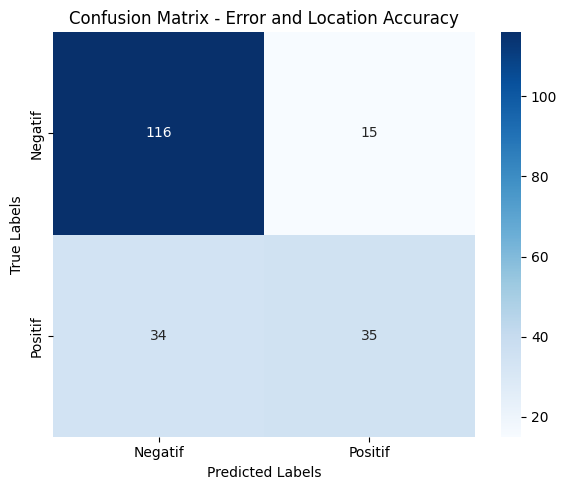

📌 ASPEK: Delay and Application Usability

🔄 Fold 1:
Jumlah data train: 198 | test: 23

🔄 Fold 2:
Jumlah data train: 199 | test: 22

🔄 Fold 3:
Jumlah data train: 199 | test: 22

🔄 Fold 4:
Jumlah data train: 199 | test: 22

🔄 Fold 5:
Jumlah data train: 199 | test: 22

🔄 Fold 6:
Jumlah data train: 199 | test: 22

🔄 Fold 7:
Jumlah data train: 199 | test: 22

🔄 Fold 8:
Jumlah data train: 199 | test: 22

🔄 Fold 9:
Jumlah data train: 199 | test: 22

🔄 Fold 10:
Jumlah data train: 199 | test: 22

📊 Confusion Matrix untuk Aspek: Delay and Application Usability
[[91. 31.]
 [46. 53.]]

📊 Classification Report untuk Aspek: Delay and Application Usability
              precision    recall  f1-score   support

     Negatif     0.5882    0.7692    0.6667        13
     Positif     0.4000    0.2222    0.2857         9

    accuracy                         0.5455        22
   macro avg     0.4941    0.4957    0.4762        22
weighted avg     0.5112    0.5455    0.5108        22



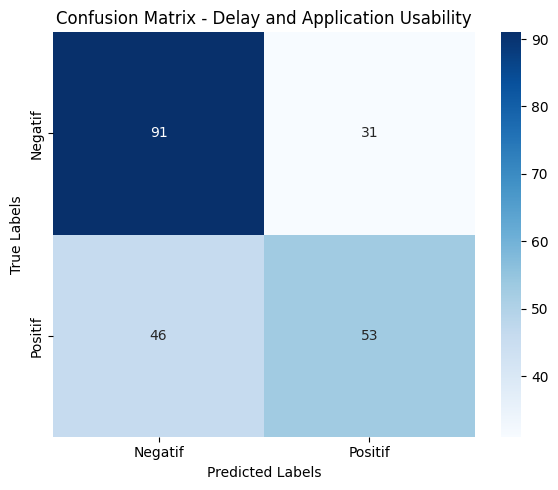

📌 ASPEK: Comfort and Service Quality

🔄 Fold 1:
Jumlah data train: 191 | test: 22

🔄 Fold 2:
Jumlah data train: 191 | test: 22

🔄 Fold 3:
Jumlah data train: 191 | test: 22

🔄 Fold 4:
Jumlah data train: 192 | test: 21

🔄 Fold 5:
Jumlah data train: 192 | test: 21

🔄 Fold 6:
Jumlah data train: 192 | test: 21

🔄 Fold 7:
Jumlah data train: 192 | test: 21

🔄 Fold 8:
Jumlah data train: 192 | test: 21

🔄 Fold 9:
Jumlah data train: 192 | test: 21

🔄 Fold 10:
Jumlah data train: 192 | test: 21

📊 Confusion Matrix untuk Aspek: Comfort and Service Quality
[[ 22.  32.]
 [ 16. 143.]]

📊 Classification Report untuk Aspek: Comfort and Service Quality
              precision    recall  f1-score   support

     Negatif     0.6000    0.5000    0.5455         6
     Positif     0.8125    0.8667    0.8387        15

    accuracy                         0.7619        21
   macro avg     0.7063    0.6833    0.6921        21
weighted avg     0.7518    0.7619    0.7549        21



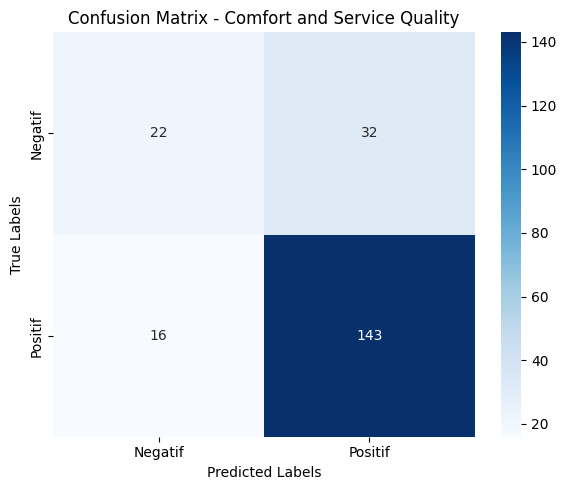

📌 ASPEK: Route Tracking and Vehicle Information

🔄 Fold 1:
Jumlah data train: 337 | test: 38

🔄 Fold 2:
Jumlah data train: 337 | test: 38

🔄 Fold 3:
Jumlah data train: 337 | test: 38

🔄 Fold 4:
Jumlah data train: 337 | test: 38

🔄 Fold 5:
Jumlah data train: 337 | test: 38

🔄 Fold 6:
Jumlah data train: 338 | test: 37

🔄 Fold 7:
Jumlah data train: 338 | test: 37

🔄 Fold 8:
Jumlah data train: 338 | test: 37

🔄 Fold 9:
Jumlah data train: 338 | test: 37

🔄 Fold 10:
Jumlah data train: 338 | test: 37

📊 Confusion Matrix untuk Aspek: Route Tracking and Vehicle Information
[[118.  48.]
 [ 42. 167.]]

📊 Classification Report untuk Aspek: Route Tracking and Vehicle Information
              precision    recall  f1-score   support

     Negatif     0.6667    0.7500    0.7059        16
     Positif     0.7895    0.7143    0.7500        21

    accuracy                         0.7297        37
   macro avg     0.7281    0.7321    0.7279        37
weighted avg     0.7364    0.7297    0.7309        37

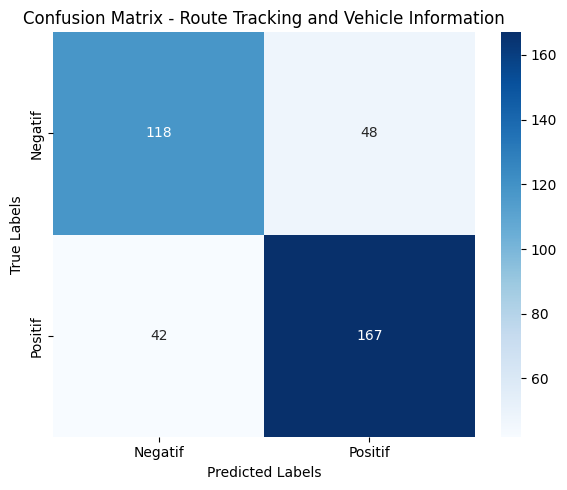


📊 EVALUASI AKHIR (Cross-Validation): Micro dan Macro F1-score Gabungan Semua Fold

✅ Micro F1-score (keseluruhan): 0.7416
✅ Macro F1-score (keseluruhan): 0.7363

📊 Confusion Matrix Keseluruhan Semua Aspek:
[[376. 172.]
 [152. 554.]]


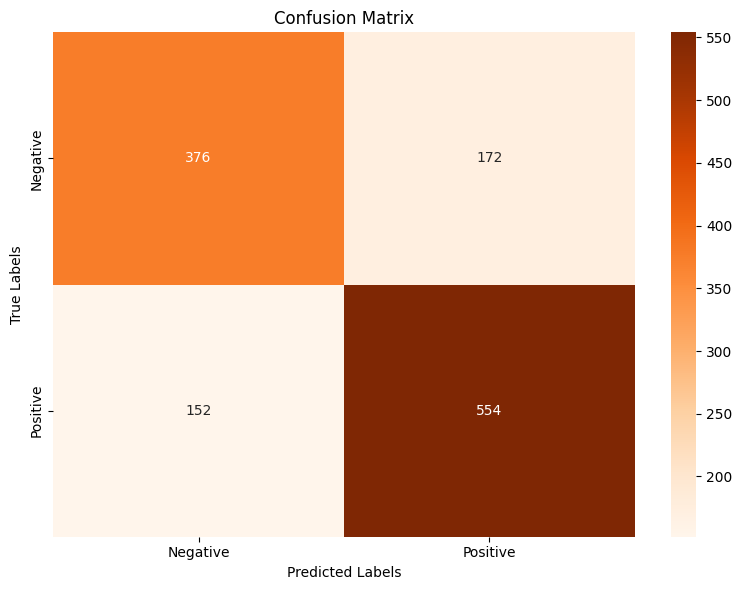


📊 Classification Report Keseluruhan (Semua Aspek):
              precision    recall  f1-score   support

     Negatif     0.7121    0.6861    0.6989       548
     Positif     0.7631    0.7847    0.7737       706

    accuracy                         0.7416      1254
   macro avg     0.7376    0.7354    0.7363      1254
weighted avg     0.7408    0.7416    0.7410      1254



In [ ]:
# fold = 10

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Pemetaan label sentimen dari Bahasa Indonesia ke Bahasa Inggris
label_map = {
    "Negatif": "Negative",
    "Positif": "Positive"
}

# Inisialisasi hasil global
y_true_all = []
y_pred_all = []
conf_matrix_total_all_aspects = np.zeros((len(data_modeling['Dominan_TPM'].unique()),
                                          len(data_modeling['Dominan_TPM'].unique())))  # Matrix untuk semua aspek

# Loop klasifikasi sentimen per aspek (dengan cross-validation)
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    # Skip aspek dengan hanya 1 label sentimen
    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    # Cross-validation setup dengan StratifiedKFold
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    fold = 1
    conf_matrix_total = np.zeros((len(df_aspect['Dominan_TPM'].unique()),
                                  len(df_aspect['Dominan_TPM'].unique())))  # Inisialisasi matrix confusion per aspek

    for train_index, test_index in skf.split(df_aspect['tokens_cleaned6'], df_aspect['Dominan_TPM']):
        print(f"\n🔄 Fold {fold}:")

        # Membagi data berdasarkan indeks fold
        train_data, test_data = df_aspect.iloc[train_index], df_aspect.iloc[test_index]
        print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

        # TF-IDF
        tfidf = TfidfVectorizer(max_features=5000)
        X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
        X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

        y_train = train_data['Dominan_TPM']
        y_test = test_data['Dominan_TPM']

        # Klasifikasi
        model = LinearSVC(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Simpan hasil global
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

        # Update confusion matrix total untuk setiap fold
        fold_conf_matrix = confusion_matrix(y_test, y_pred)
        conf_matrix_total += fold_conf_matrix

        fold += 1

    # Update confusion matrix keseluruhan untuk semua aspek
    conf_matrix_total_all_aspects += conf_matrix_total

    # Tampilkan confusion matrix per aspek
    print(f"\n📊 Confusion Matrix untuk Aspek: {aspect}")
    print(conf_matrix_total)

    # Tampilkan classification report untuk aspek ini
    print(f"\n📊 Classification Report untuk Aspek: {aspect}")
    print(classification_report(y_test, y_pred, digits=4))

    # Visualisasi confusion matrix per aspek
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix_total.astype(int), annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(df_aspect['Dominan_TPM']),
                yticklabels=np.unique(df_aspect['Dominan_TPM']))
    plt.title(f'Confusion Matrix - {aspect}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.tight_layout()
    plt.show()


# Evaluasi akhir semua fold (gabungan)
print("\n" + "="*100)
print("📊 EVALUASI AKHIR (Cross-Validation): Micro dan Macro F1-score Gabungan Semua Fold")
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
print(f"\n✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")

# Tampilkan confusion matrix keseluruhan untuk semua aspek
print("\n📊 Confusion Matrix Keseluruhan Semua Aspek:")
print(conf_matrix_total_all_aspects)

# Visualisasi confusion matrix keseluruhan
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_total_all_aspects.astype(int), annot=True, fmt='d', cmap='Oranges',
           xticklabels=[label_map[label] for label in np.unique(data_modeling['Dominan_TPM'])],
           yticklabels=[label_map[label] for label in np.unique(data_modeling['Dominan_TPM'])])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()


# Tampilkan classification report keseluruhan
print(f"\n📊 Classification Report Keseluruhan (Semua Aspek):")
print(classification_report(y_true_all, y_pred_all, digits=4))


## **cross-val (SMOTE)**

In [ ]:
# Fold = 5

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi hasil global
y_true_all = []
y_pred_all = []
conf_matrix_total_all_aspects = np.zeros((len(data_modeling['Dominan_TPM'].unique()), len(data_modeling['Dominan_TPM'].unique())))  # Matrix untuk semua aspek

# Loop klasifikasi sentimen per aspek (dengan cross-validation)
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    # Skip aspek dengan hanya 1 label sentimen
    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    # Cross-validation setup dengan StratifiedKFold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    fold = 1
    conf_matrix_total = np.zeros((len(df_aspect['Dominan_TPM'].unique()), len(df_aspect['Dominan_TPM'].unique())))  # Inisialisasi matrix confusion per aspek

    for train_index, test_index in skf.split(df_aspect['tokens_cleaned6'], df_aspect['Dominan_TPM']):
        print(f"\n🔄 Fold {fold}:")

        # Membagi data berdasarkan indeks fold
        train_data, test_data = df_aspect.iloc[train_index], df_aspect.iloc[test_index]
        print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

        # TF-IDF
        tfidf = TfidfVectorizer(max_features=5000)
        X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
        X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

        y_train = train_data['Dominan_TPM']
        y_test = test_data['Dominan_TPM']

        # Resampling dengan SMOTE
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

        # Klasifikasi
        model = LinearSVC(random_state=42)
        model.fit(X_resampled, y_resampled)
        y_pred = model.predict(X_test)

        # Simpan hasil global
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

        # Update confusion matrix total untuk setiap fold
        fold_conf_matrix = confusion_matrix(y_test, y_pred)
        conf_matrix_total += fold_conf_matrix

        fold += 1

    # Update confusion matrix keseluruhan untuk semua aspek
    conf_matrix_total_all_aspects += conf_matrix_total

    # Tampilkan confusion matrix per aspek
    print(f"\n📊 Confusion Matrix untuk Aspek: {aspect}")
    print(conf_matrix_total)

    # Tampilkan classification report untuk aspek ini (precision, recall, f1-score)
    print(f"\n📊 Classification Report untuk Aspek: {aspect}")
    print(classification_report(y_test, y_pred, digits=4))

# Evaluasi akhir semua fold (gabungan)
print("\n" + "="*100)
print("📊 EVALUASI AKHIR (Cross-Validation): Micro dan Macro F1-score Gabungan Semua Fold")
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
print(f"\n✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")

# Tampilkan confusion matrix keseluruhan untuk semua aspek
print("\n📊 Confusion Matrix Keseluruhan Semua Aspek:")
print(conf_matrix_total_all_aspects)

# Tampilkan classification report keseluruhan
print(f"\n📊 Classification Report Keseluruhan (Semua Aspek):")
print(classification_report(y_true_all, y_pred_all, digits=4))


📌 ASPEK: Application Features and Development

🔄 Fold 1:
Jumlah data train: 101 | test: 26

🔄 Fold 2:
Jumlah data train: 101 | test: 26

🔄 Fold 3:
Jumlah data train: 102 | test: 25

🔄 Fold 4:
Jumlah data train: 102 | test: 25

🔄 Fold 5:
Jumlah data train: 102 | test: 25

📊 Confusion Matrix untuk Aspek: Application Features and Development
[[16. 26.]
 [14. 71.]]

📊 Classification Report untuk Aspek: Application Features and Development
              precision    recall  f1-score   support

     Negatif     0.6000    0.7500    0.6667         8
     Positif     0.8667    0.7647    0.8125        17

    accuracy                         0.7600        25
   macro avg     0.7333    0.7574    0.7396        25
weighted avg     0.7813    0.7600    0.7658        25

📌 ASPEK: User Suggestions and Service Innovation

🔄 Fold 1:
Jumlah data train: 94 | test: 24

🔄 Fold 2:
Jumlah data train: 94 | test: 24

🔄 Fold 3:
Jumlah data train: 94 | test: 24

🔄 Fold 4:
Jumlah data train: 95 | test: 23

🔄 Fold 5

In [ ]:
# Fold = 10

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi hasil global
y_true_all = []
y_pred_all = []
conf_matrix_total_all_aspects = np.zeros((len(data_modeling['Dominan_TPM'].unique()), len(data_modeling['Dominan_TPM'].unique())))  # Matrix untuk semua aspek

# Loop klasifikasi sentimen per aspek (dengan cross-validation)
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    # Skip aspek dengan hanya 1 label sentimen
    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    # Cross-validation setup dengan StratifiedKFold
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    fold = 1
    conf_matrix_total = np.zeros((len(df_aspect['Dominan_TPM'].unique()), len(df_aspect['Dominan_TPM'].unique())))  # Inisialisasi matrix confusion per aspek

    for train_index, test_index in skf.split(df_aspect['tokens_cleaned6'], df_aspect['Dominan_TPM']):
        print(f"\n🔄 Fold {fold}:")

        # Membagi data berdasarkan indeks fold
        train_data, test_data = df_aspect.iloc[train_index], df_aspect.iloc[test_index]
        print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

        # TF-IDF
        tfidf = TfidfVectorizer(max_features=5000)
        X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
        X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

        y_train = train_data['Dominan_TPM']
        y_test = test_data['Dominan_TPM']

        # Resampling dengan SMOTE
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

        # Klasifikasi
        model = LinearSVC(random_state=42)
        model.fit(X_resampled, y_resampled)
        y_pred = model.predict(X_test)

        # Simpan hasil global
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

        # Update confusion matrix total untuk setiap fold
        fold_conf_matrix = confusion_matrix(y_test, y_pred)
        conf_matrix_total += fold_conf_matrix

        fold += 1

    # Update confusion matrix keseluruhan untuk semua aspek
    conf_matrix_total_all_aspects += conf_matrix_total

    # Tampilkan confusion matrix per aspek
    print(f"\n📊 Confusion Matrix untuk Aspek: {aspect}")
    print(conf_matrix_total)

    # Tampilkan classification report untuk aspek ini (precision, recall, f1-score)
    print(f"\n📊 Classification Report untuk Aspek: {aspect}")
    print(classification_report(y_test, y_pred, digits=4))

# Evaluasi akhir semua fold (gabungan)
print("\n" + "="*100)
print("📊 EVALUASI AKHIR (Cross-Validation): Micro dan Macro F1-score Gabungan Semua Fold")
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
print(f"\n✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")

# Tampilkan confusion matrix keseluruhan untuk semua aspek
print("\n📊 Confusion Matrix Keseluruhan Semua Aspek:")
print(conf_matrix_total_all_aspects)

# Tampilkan classification report keseluruhan
print(f"\n📊 Classification Report Keseluruhan (Semua Aspek):")
print(classification_report(y_true_all, y_pred_all, digits=4))


📌 ASPEK: Application Features and Development

🔄 Fold 1:
Jumlah data train: 114 | test: 13

🔄 Fold 2:
Jumlah data train: 114 | test: 13

🔄 Fold 3:
Jumlah data train: 114 | test: 13

🔄 Fold 4:
Jumlah data train: 114 | test: 13

🔄 Fold 5:
Jumlah data train: 114 | test: 13

🔄 Fold 6:
Jumlah data train: 114 | test: 13

🔄 Fold 7:
Jumlah data train: 114 | test: 13

🔄 Fold 8:
Jumlah data train: 115 | test: 12

🔄 Fold 9:
Jumlah data train: 115 | test: 12

🔄 Fold 10:
Jumlah data train: 115 | test: 12

📊 Confusion Matrix untuk Aspek: Application Features and Development
[[21. 21.]
 [14. 71.]]

📊 Classification Report untuk Aspek: Application Features and Development
              precision    recall  f1-score   support

     Negatif     1.0000    0.7500    0.8571         4
     Positif     0.8889    1.0000    0.9412         8

    accuracy                         0.9167        12
   macro avg     0.9444    0.8750    0.8992        12
weighted avg     0.9259    0.9167    0.9132        12

📌 ASPEK:

## **cross-val (SMOTETomek)**

In [ ]:
# fold = 5

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.combine import SMOTETomek  # Impor SMOTETomek

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi hasil global
y_true_all = []
y_pred_all = []
conf_matrix_total_all_aspects = np.zeros((len(data_modeling['Dominan_TPM'].unique()), len(data_modeling['Dominan_TPM'].unique())))  # Matrix untuk semua aspek

# Loop klasifikasi sentimen per aspek (dengan cross-validation)
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    # Skip aspek dengan hanya 1 label sentimen
    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    # Cross-validation setup dengan StratifiedKFold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    fold = 1
    conf_matrix_total = np.zeros((len(df_aspect['Dominan_TPM'].unique()), len(df_aspect['Dominan_TPM'].unique())))  # Inisialisasi matrix confusion per aspek

    for train_index, test_index in skf.split(df_aspect['tokens_cleaned6'], df_aspect['Dominan_TPM']):
        print(f"\n🔄 Fold {fold}:")

        # Membagi data berdasarkan indeks fold
        train_data, test_data = df_aspect.iloc[train_index], df_aspect.iloc[test_index]
        print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

        # TF-IDF
        tfidf = TfidfVectorizer(max_features=5000)
        X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
        X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

        y_train = train_data['Dominan_TPM']
        y_test = test_data['Dominan_TPM']

        # Resampling dengan SMOTETomek
        smote_tomek = SMOTETomek(random_state=42)  # Inisialisasi SMOTETomek
        X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)  # Resampling data latih

        # Klasifikasi
        model = LinearSVC(random_state=42)
        model.fit(X_train_resampled, y_train_resampled)  # Gunakan data yang telah di-resample
        y_pred = model.predict(X_test)

        # Simpan hasil global
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

        # Update confusion matrix total untuk setiap fold
        fold_conf_matrix = confusion_matrix(y_test, y_pred)
        conf_matrix_total += fold_conf_matrix

        fold += 1

    # Update confusion matrix keseluruhan untuk semua aspek
    conf_matrix_total_all_aspects += conf_matrix_total

    # Tampilkan confusion matrix per aspek
    print(f"\n📊 Confusion Matrix untuk Aspek: {aspect}")
    print(conf_matrix_total)

    # Tampilkan classification report untuk aspek ini (precision, recall, f1-score)
    print(f"\n📊 Classification Report untuk Aspek: {aspect}")
    print(classification_report(y_test, y_pred, digits=4))

# Evaluasi akhir semua fold (gabungan)
print("\n" + "="*100)
print("📊 EVALUASI AKHIR (Cross-Validation): Micro dan Macro F1-score Gabungan Semua Fold")
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
print(f"\n✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")

# Tampilkan confusion matrix keseluruhan untuk semua aspek
print("\n📊 Confusion Matrix Keseluruhan Semua Aspek:")
print(conf_matrix_total_all_aspects)

# Tampilkan classification report keseluruhan
print(f"\n📊 Classification Report Keseluruhan (Semua Aspek):")
print(classification_report(y_true_all, y_pred_all, digits=4))


📌 ASPEK: Application Features and Development

🔄 Fold 1:
Jumlah data train: 101 | test: 26

🔄 Fold 2:
Jumlah data train: 101 | test: 26

🔄 Fold 3:
Jumlah data train: 102 | test: 25

🔄 Fold 4:
Jumlah data train: 102 | test: 25

🔄 Fold 5:
Jumlah data train: 102 | test: 25

📊 Confusion Matrix untuk Aspek: Application Features and Development
[[16. 26.]
 [14. 71.]]

📊 Classification Report untuk Aspek: Application Features and Development
              precision    recall  f1-score   support

     Negatif     0.6000    0.7500    0.6667         8
     Positif     0.8667    0.7647    0.8125        17

    accuracy                         0.7600        25
   macro avg     0.7333    0.7574    0.7396        25
weighted avg     0.7813    0.7600    0.7658        25

📌 ASPEK: User Suggestions and Service Innovation

🔄 Fold 1:
Jumlah data train: 94 | test: 24

🔄 Fold 2:
Jumlah data train: 94 | test: 24

🔄 Fold 3:
Jumlah data train: 94 | test: 24

🔄 Fold 4:
Jumlah data train: 95 | test: 23

🔄 Fold 5

In [ ]:
# fold = 10

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.combine import SMOTETomek  # Impor SMOTETomek

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi hasil global
y_true_all = []
y_pred_all = []
conf_matrix_total_all_aspects = np.zeros((len(data_modeling['Dominan_TPM'].unique()), len(data_modeling['Dominan_TPM'].unique())))  # Matrix untuk semua aspek

# Loop klasifikasi sentimen per aspek (dengan cross-validation)
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    # Skip aspek dengan hanya 1 label sentimen
    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    # Cross-validation setup dengan StratifiedKFold
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    fold = 1
    conf_matrix_total = np.zeros((len(df_aspect['Dominan_TPM'].unique()), len(df_aspect['Dominan_TPM'].unique())))  # Inisialisasi matrix confusion per aspek

    for train_index, test_index in skf.split(df_aspect['tokens_cleaned6'], df_aspect['Dominan_TPM']):
        print(f"\n🔄 Fold {fold}:")

        # Membagi data berdasarkan indeks fold
        train_data, test_data = df_aspect.iloc[train_index], df_aspect.iloc[test_index]
        print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

        # TF-IDF
        tfidf = TfidfVectorizer(max_features=5000)
        X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
        X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

        y_train = train_data['Dominan_TPM']
        y_test = test_data['Dominan_TPM']

        # Resampling dengan SMOTETomek
        smote_tomek = SMOTETomek(random_state=42)  # Inisialisasi SMOTETomek
        X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)  # Resampling data latih

        # Klasifikasi
        model = LinearSVC(random_state=42)
        model.fit(X_train_resampled, y_train_resampled)  # Gunakan data yang telah di-resample
        y_pred = model.predict(X_test)

        # Simpan hasil global
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

        # Update confusion matrix total untuk setiap fold
        fold_conf_matrix = confusion_matrix(y_test, y_pred)
        conf_matrix_total += fold_conf_matrix

        fold += 1

    # Update confusion matrix keseluruhan untuk semua aspek
    conf_matrix_total_all_aspects += conf_matrix_total

    # Tampilkan confusion matrix per aspek
    print(f"\n📊 Confusion Matrix untuk Aspek: {aspect}")
    print(conf_matrix_total)

    # Tampilkan classification report untuk aspek ini (precision, recall, f1-score)
    print(f"\n📊 Classification Report untuk Aspek: {aspect}")
    print(classification_report(y_test, y_pred, digits=4))

# Evaluasi akhir semua fold (gabungan)
print("\n" + "="*100)
print("📊 EVALUASI AKHIR (Cross-Validation): Micro dan Macro F1-score Gabungan Semua Fold")
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
print(f"\n✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")

# Tampilkan confusion matrix keseluruhan untuk semua aspek
print("\n📊 Confusion Matrix Keseluruhan Semua Aspek:")
print(conf_matrix_total_all_aspects)

# Tampilkan classification report keseluruhan
print(f"\n📊 Classification Report Keseluruhan (Semua Aspek):")
print(classification_report(y_true_all, y_pred_all, digits=4))


📌 ASPEK: Application Features and Development

🔄 Fold 1:
Jumlah data train: 114 | test: 13

🔄 Fold 2:
Jumlah data train: 114 | test: 13

🔄 Fold 3:
Jumlah data train: 114 | test: 13

🔄 Fold 4:
Jumlah data train: 114 | test: 13

🔄 Fold 5:
Jumlah data train: 114 | test: 13

🔄 Fold 6:
Jumlah data train: 114 | test: 13

🔄 Fold 7:
Jumlah data train: 114 | test: 13

🔄 Fold 8:
Jumlah data train: 115 | test: 12

🔄 Fold 9:
Jumlah data train: 115 | test: 12

🔄 Fold 10:
Jumlah data train: 115 | test: 12

📊 Confusion Matrix untuk Aspek: Application Features and Development
[[20. 22.]
 [14. 71.]]

📊 Classification Report untuk Aspek: Application Features and Development
              precision    recall  f1-score   support

     Negatif     1.0000    0.7500    0.8571         4
     Positif     0.8889    1.0000    0.9412         8

    accuracy                         0.9167        12
   macro avg     0.9444    0.8750    0.8992        12
weighted avg     0.9259    0.9167    0.9132        12

📌 ASPEK:

## **cross-val (BordelineSMOTE)**

In [ ]:
# fold = 5

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import BorderlineSMOTE

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi hasil global
y_true_all = []
y_pred_all = []
conf_matrix_total_all_aspects = np.zeros((len(data_modeling['Dominan_TPM'].unique()), len(data_modeling['Dominan_TPM'].unique())))  # Matrix untuk semua aspek

# Loop klasifikasi sentimen per aspek (dengan cross-validation)
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    # Skip aspek dengan hanya 1 label sentimen
    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    # Cross-validation setup dengan StratifiedKFold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    fold = 1
    conf_matrix_total = np.zeros((len(df_aspect['Dominan_TPM'].unique()), len(df_aspect['Dominan_TPM'].unique())))  # Inisialisasi matrix confusion per aspek

    for train_index, test_index in skf.split(df_aspect['tokens_cleaned6'], df_aspect['Dominan_TPM']):
        print(f"\n🔄 Fold {fold}:")

        # Membagi data berdasarkan indeks fold
        train_data, test_data = df_aspect.iloc[train_index], df_aspect.iloc[test_index]
        print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

        # TF-IDF
        tfidf = TfidfVectorizer(max_features=5000)
        X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
        X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

        y_train = train_data['Dominan_TPM']
        y_test = test_data['Dominan_TPM']

        # Resampling menggunakan BorderlineSMOTE
        smote = BorderlineSMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
        print(f"Jumlah data train setelah resampling: {X_train_res.shape[0]}")

        # Klasifikasi
        model = LinearSVC(random_state=42)
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test)

        # Simpan hasil global
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

        # Update confusion matrix total untuk setiap fold
        fold_conf_matrix = confusion_matrix(y_test, y_pred)
        conf_matrix_total += fold_conf_matrix

        fold += 1

    # Update confusion matrix keseluruhan untuk semua aspek
    conf_matrix_total_all_aspects += conf_matrix_total

    # Tampilkan confusion matrix per aspek
    print(f"\n📊 Confusion Matrix untuk Aspek: {aspect}")
    print(conf_matrix_total)

    # Tampilkan classification report untuk aspek ini (precision, recall, f1-score)
    print(f"\n📊 Classification Report untuk Aspek: {aspect}")
    print(classification_report(y_test, y_pred, digits=4))

# Evaluasi akhir semua fold (gabungan)
print("\n" + "="*100)
print("📊 EVALUASI AKHIR (Cross-Validation): Micro dan Macro F1-score Gabungan Semua Fold")
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
print(f"\n✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")

# Tampilkan confusion matrix keseluruhan untuk semua aspek
print("\n📊 Confusion Matrix Keseluruhan Semua Aspek:")
print(conf_matrix_total_all_aspects)

# Tampilkan classification report keseluruhan
print(f"\n📊 Classification Report Keseluruhan (Semua Aspek):")
print(classification_report(y_true_all, y_pred_all, digits=4))


📌 ASPEK: Application Features and Development

🔄 Fold 1:
Jumlah data train: 101 | test: 26
Jumlah data train setelah resampling: 136

🔄 Fold 2:
Jumlah data train: 101 | test: 26
Jumlah data train setelah resampling: 136

🔄 Fold 3:
Jumlah data train: 102 | test: 25
Jumlah data train setelah resampling: 136

🔄 Fold 4:
Jumlah data train: 102 | test: 25
Jumlah data train setelah resampling: 136

🔄 Fold 5:
Jumlah data train: 102 | test: 25
Jumlah data train setelah resampling: 136

📊 Confusion Matrix untuk Aspek: Application Features and Development
[[17. 25.]
 [13. 72.]]

📊 Classification Report untuk Aspek: Application Features and Development
              precision    recall  f1-score   support

     Negatif     0.6000    0.7500    0.6667         8
     Positif     0.8667    0.7647    0.8125        17

    accuracy                         0.7600        25
   macro avg     0.7333    0.7574    0.7396        25
weighted avg     0.7813    0.7600    0.7658        25

📌 ASPEK: User Suggestion

In [ ]:
# fold = 10

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import BorderlineSMOTE

# Load data modeling hasil split 90%
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Inisialisasi hasil global
y_true_all = []
y_pred_all = []
conf_matrix_total_all_aspects = np.zeros((len(data_modeling['Dominan_TPM'].unique()), len(data_modeling['Dominan_TPM'].unique())))  # Matrix untuk semua aspek

# Loop klasifikasi sentimen per aspek (dengan cross-validation)
for aspect in aspects:
    print("="*100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    # Skip aspek dengan hanya 1 label sentimen
    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Data hanya memiliki 1 kelas sentimen. Skip aspek ini.\n")
        continue

    # Cross-validation setup dengan StratifiedKFold
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    fold = 1
    conf_matrix_total = np.zeros((len(df_aspect['Dominan_TPM'].unique()), len(df_aspect['Dominan_TPM'].unique())))  # Inisialisasi matrix confusion per aspek

    for train_index, test_index in skf.split(df_aspect['tokens_cleaned6'], df_aspect['Dominan_TPM']):
        print(f"\n🔄 Fold {fold}:")

        # Membagi data berdasarkan indeks fold
        train_data, test_data = df_aspect.iloc[train_index], df_aspect.iloc[test_index]
        print(f"Jumlah data train: {train_data.shape[0]} | test: {test_data.shape[0]}")

        # TF-IDF
        tfidf = TfidfVectorizer(max_features=5000)
        X_train = tfidf.fit_transform(train_data['tokens_cleaned6'].astype(str))
        X_test = tfidf.transform(test_data['tokens_cleaned6'].astype(str))

        y_train = train_data['Dominan_TPM']
        y_test = test_data['Dominan_TPM']

        # Resampling menggunakan BorderlineSMOTE
        smote = BorderlineSMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
        print(f"Jumlah data train setelah resampling: {X_train_res.shape[0]}")

        # Klasifikasi
        model = LinearSVC(random_state=42)
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test)

        # Simpan hasil global
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

        # Update confusion matrix total untuk setiap fold
        fold_conf_matrix = confusion_matrix(y_test, y_pred)
        conf_matrix_total += fold_conf_matrix

        fold += 1

    # Update confusion matrix keseluruhan untuk semua aspek
    conf_matrix_total_all_aspects += conf_matrix_total

    # Tampilkan confusion matrix per aspek
    print(f"\n📊 Confusion Matrix untuk Aspek: {aspect}")
    print(conf_matrix_total)

    # Tampilkan classification report untuk aspek ini (precision, recall, f1-score)
    print(f"\n📊 Classification Report untuk Aspek: {aspect}")
    print(classification_report(y_test, y_pred, digits=4))

# Evaluasi akhir semua fold (gabungan)
print("\n" + "="*100)
print("📊 EVALUASI AKHIR (Cross-Validation): Micro dan Macro F1-score Gabungan Semua Fold")
micro_f1 = f1_score(y_true_all, y_pred_all, average='micro')
macro_f1 = f1_score(y_true_all, y_pred_all, average='macro')
print(f"\n✅ Micro F1-score (keseluruhan): {micro_f1:.4f}")
print(f"✅ Macro F1-score (keseluruhan): {macro_f1:.4f}")

# Tampilkan confusion matrix keseluruhan untuk semua aspek
print("\n📊 Confusion Matrix Keseluruhan Semua Aspek:")
print(conf_matrix_total_all_aspects)

# Tampilkan classification report keseluruhan
print(f"\n📊 Classification Report Keseluruhan (Semua Aspek):")
print(classification_report(y_true_all, y_pred_all, digits=4))


📌 ASPEK: Application Features and Development

🔄 Fold 1:
Jumlah data train: 114 | test: 13
Jumlah data train setelah resampling: 152

🔄 Fold 2:
Jumlah data train: 114 | test: 13
Jumlah data train setelah resampling: 152

🔄 Fold 3:
Jumlah data train: 114 | test: 13
Jumlah data train setelah resampling: 152

🔄 Fold 4:
Jumlah data train: 114 | test: 13
Jumlah data train setelah resampling: 152

🔄 Fold 5:
Jumlah data train: 114 | test: 13
Jumlah data train setelah resampling: 152

🔄 Fold 6:
Jumlah data train: 114 | test: 13
Jumlah data train setelah resampling: 154

🔄 Fold 7:
Jumlah data train: 114 | test: 13
Jumlah data train setelah resampling: 154

🔄 Fold 8:
Jumlah data train: 115 | test: 12
Jumlah data train setelah resampling: 154

🔄 Fold 9:
Jumlah data train: 115 | test: 12
Jumlah data train setelah resampling: 154

🔄 Fold 10:
Jumlah data train: 115 | test: 12
Jumlah data train setelah resampling: 154

📊 Confusion Matrix untuk Aspek: Application Features and Development
[[19. 23.]
 [

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, f1_score
import pandas as pd

# Load data
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Ambil semua data
X_all = data_modeling['tokens_cleaned6'].astype(str)
y_all = data_modeling['Dominan_TPM']

# Encode label sentimen
le = LabelEncoder()
y_all_enc = le.fit_transform(y_all)

# Pipeline model terbaik: TF-IDF + ClassWeighting
pipeline_classweight = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LinearSVC(class_weight='balanced', random_state=42))
])

# Stratified 5-Fold Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluasi Macro F1-score
scores_macro_f1 = cross_val_score(pipeline_classweight, X_all, y_all_enc, scoring='f1_macro', cv=cv, n_jobs=-1)

# Output hasil
print("📌 GLOBAL F1 SCORE (SEMUA ASPEK, CLASSWEIGHTING)")
print(f"✅ Macro F1 per fold: {scores_macro_f1}")
print(f"📊 Mean Macro F1: {scores_macro_f1.mean():.4f}")
print(f"📉 Std Dev: {scores_macro_f1.std():.4f}")


📌 GLOBAL F1 SCORE (SEMUA ASPEK, CLASSWEIGHTING)
✅ Macro F1 per fold: [0.74355045 0.74864324 0.73397354 0.7691563  0.72502588]
📊 Mean Macro F1: 0.7441
📉 Std Dev: 0.0149


## **KERNEL (Linear Rbf)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

# Load data
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Hyperparameter untuk grid search
param_grid = {
    'svc__kernel': ['linear', 'rbf'],
    'svc__C': [0.01, 0.1, 1, 10]
}

# Ukuran test size yang akan dicoba
test_sizes = [0.1, 0.2, 0.3]

# Menyimpan semua hasil
all_results = []

# Loop untuk setiap aspek
for aspect in aspects:
    print("=" * 100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Skip aspek karena hanya memiliki 1 label sentimen.\n")
        continue

    X = df_aspect['tokens_cleaned6'].astype(str)
    y = df_aspect['Dominan_TPM']

    for test_size in test_sizes:
        print(f"\n🔎 Evaluasi test_size={test_size}")

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)

        pipeline = Pipeline([
            ('tfidf', TfidfVectorizer(max_features=5000)),
            ('svc', SVC())
        ])

        grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
        grid.fit(X_train, y_train)

        best_params = grid.best_params_
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)

        f1 = f1_score(y_test, y_pred, average='macro')

        print(f"✅ Kernel: {best_params['svc__kernel']} | C: {best_params['svc__C']} | F1-macro: {f1:.4f}")

        all_results.append({
            'Aspect': aspect,
            'Test_Size': test_size,
            'Best_Kernel': best_params['svc__kernel'],
            'Best_C': best_params['svc__C'],
            'F1_Score': f1
        })

# Konversi ke dataframe
results_df = pd.DataFrame(all_results)

# Tampilkan semua hasil
print("\n📊 Semua Hasil GridSearch:")
print(results_df.sort_values(by=['Aspect', 'F1_Score'], ascending=[True, False]))

# Ringkasan model terbaik per aspek
print("\n🏆 Model Terbaik per Aspek:")
best_per_aspect = results_df.loc[results_df.groupby("Aspect")["F1_Score"].idxmax()]
print(best_per_aspect)


📌 ASPEK: Application Features and Development

🔎 Evaluasi test_size=0.1
✅ Kernel: linear | C: 10 | F1-macro: 0.6389

🔎 Evaluasi test_size=0.2
✅ Kernel: linear | C: 10 | F1-macro: 0.5784

🔎 Evaluasi test_size=0.3
✅ Kernel: linear | C: 10 | F1-macro: 0.6762
📌 ASPEK: User Suggestions and Service Innovation

🔎 Evaluasi test_size=0.1
✅ Kernel: linear | C: 1 | F1-macro: 0.4286

🔎 Evaluasi test_size=0.2
✅ Kernel: linear | C: 10 | F1-macro: 0.4000

🔎 Evaluasi test_size=0.3
✅ Kernel: linear | C: 10 | F1-macro: 0.5567
📌 ASPEK: Error and Location Accuracy

🔎 Evaluasi test_size=0.1
✅ Kernel: linear | C: 10 | F1-macro: 0.4872

🔎 Evaluasi test_size=0.2
✅ Kernel: rbf | C: 10 | F1-macro: 0.6865

🔎 Evaluasi test_size=0.3
✅ Kernel: linear | C: 10 | F1-macro: 0.6110
📌 ASPEK: Delay and Application Usability

🔎 Evaluasi test_size=0.1
✅ Kernel: rbf | C: 10 | F1-macro: 0.6515

🔎 Evaluasi test_size=0.2
✅ Kernel: linear | C: 1 | F1-macro: 0.7017

🔎 Evaluasi test_size=0.3
✅ Kernel: linear | C: 1 | F1-macro: 0.6


🚀 Membuat dan evaluasi model untuk aspek: Application Features and Development
📋 Classification Report:
              precision    recall  f1-score   support

     Negatif     0.5833    0.5385    0.5600        13
     Positif     0.7778    0.8077    0.7925        26

    accuracy                         0.7179        39
   macro avg     0.6806    0.6731    0.6762        39
weighted avg     0.7130    0.7179    0.7150        39

🎯 F1-score (macro): 0.6762
🧩 Confusion Matrix:


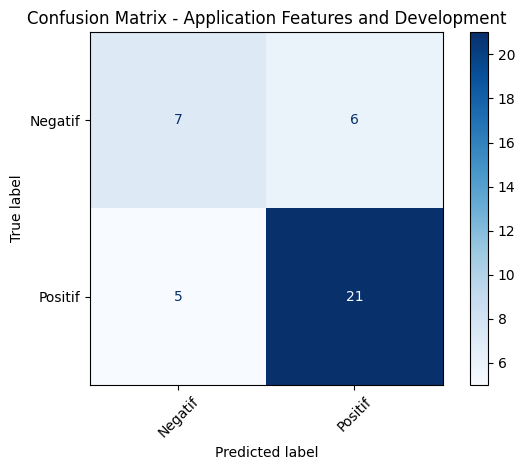


🚀 Membuat dan evaluasi model untuk aspek: Comfort and Service Quality
📋 Classification Report:
              precision    recall  f1-score   support

     Negatif     0.8000    0.6667    0.7273         6
     Positif     0.8824    0.9375    0.9091        16

    accuracy                         0.8636        22
   macro avg     0.8412    0.8021    0.8182        22
weighted avg     0.8599    0.8636    0.8595        22

🎯 F1-score (macro): 0.8182
🧩 Confusion Matrix:


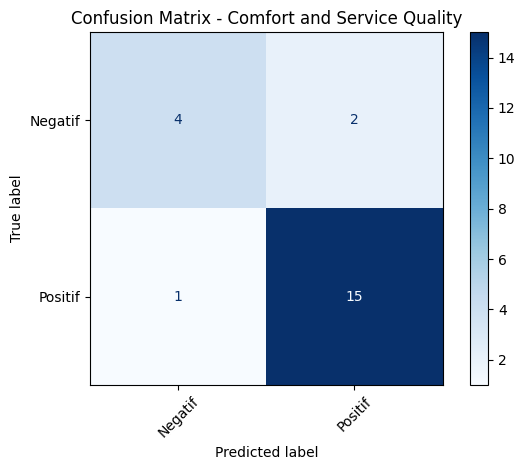


🚀 Membuat dan evaluasi model untuk aspek: Delay and Application Usability
📋 Classification Report:
              precision    recall  f1-score   support

     Negatif     0.7308    0.7600    0.7451        25
     Positif     0.6842    0.6500    0.6667        20

    accuracy                         0.7111        45
   macro avg     0.7075    0.7050    0.7059        45
weighted avg     0.7101    0.7111    0.7102        45

🎯 F1-score (macro): 0.7059
🧩 Confusion Matrix:


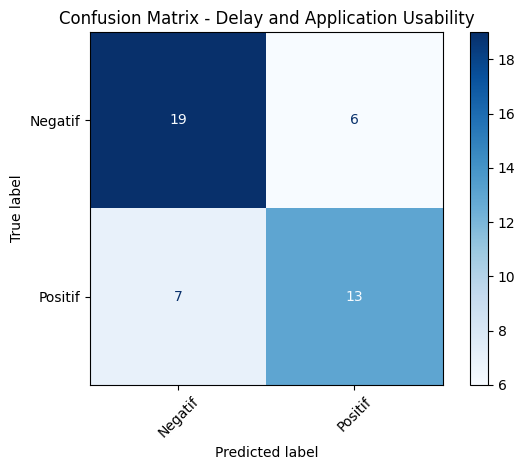


🚀 Membuat dan evaluasi model untuk aspek: Error and Location Accuracy
📋 Classification Report:
              precision    recall  f1-score   support

     Negatif     0.7500    0.9231    0.8276        26
     Positif     0.7500    0.4286    0.5455        14

    accuracy                         0.7500        40
   macro avg     0.7500    0.6758    0.6865        40
weighted avg     0.7500    0.7500    0.7288        40

🎯 F1-score (macro): 0.6865
🧩 Confusion Matrix:


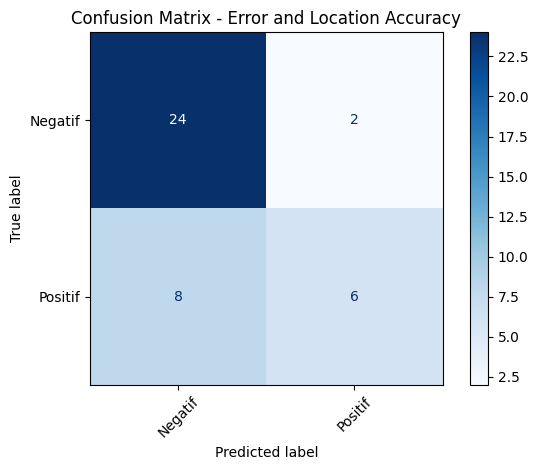


🚀 Membuat dan evaluasi model untuk aspek: Route Tracking and Vehicle Information
📋 Classification Report:
              precision    recall  f1-score   support

     Negatif     0.7234    0.6800    0.7010        50
     Positif     0.7576    0.7937    0.7752        63

    accuracy                         0.7434       113
   macro avg     0.7405    0.7368    0.7381       113
weighted avg     0.7425    0.7434    0.7424       113

🎯 F1-score (macro): 0.7381
🧩 Confusion Matrix:


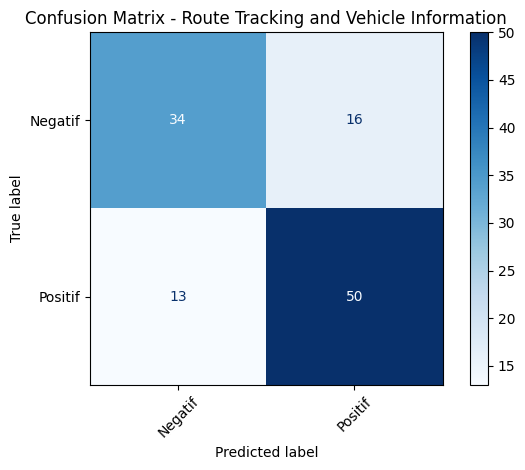


🚀 Membuat dan evaluasi model untuk aspek: User Suggestions and Service Innovation
📋 Classification Report:
              precision    recall  f1-score   support

     Negatif     0.5000    0.2000    0.2857        10
     Positif     0.7500    0.9231    0.8276        26

    accuracy                         0.7222        36
   macro avg     0.6250    0.5615    0.5567        36
weighted avg     0.6806    0.7222    0.6771        36

🎯 F1-score (macro): 0.5567
🧩 Confusion Matrix:


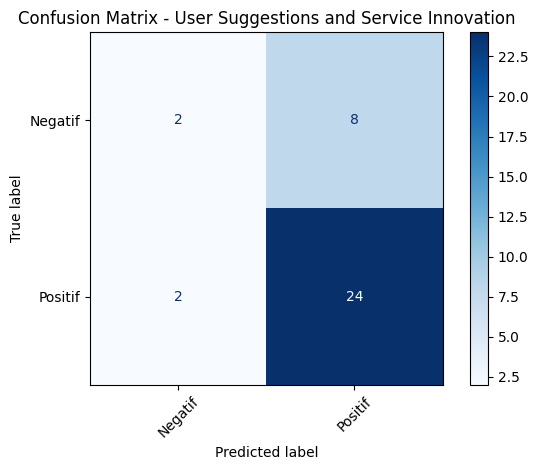

In [ ]:
# MODEL TER BAIK PER ASPEK

from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.combine import SMOTETomek
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score
)
import matplotlib.pyplot as plt
import pandas as pd

# Konfigurasi model terbaik per aspek
best_models = {
    "Application Features and Development": {"C": 10, "kernel": "linear", "test_size": 0.3, "resampling": None},
    "Comfort and Service Quality": {"C": 10, "kernel": "rbf", "test_size": 0.1, "resampling": None},
    "Delay and Application Usability": {"C": 1, "kernel": "linear", "test_size": 0.2, "resampling": BorderlineSMOTE(random_state=42)},
    "Error and Location Accuracy": {"C": 10, "kernel": "rbf", "test_size": 0.2, "resampling": None},
    "Route Tracking and Vehicle Information": {"C": 1, "kernel": "linear", "test_size": 0.3, "resampling": None},
    "User Suggestions and Service Innovation": {"C": 10, "kernel": "linear", "test_size": 0.3, "resampling": None}
}

# Evaluasi dan visualisasi
for aspect, config in best_models.items():
    print(f"\n🚀 Membuat dan evaluasi model untuk aspek: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]
    X = df_aspect['tokens_cleaned6'].astype(str)
    y = df_aspect['Dominan_TPM']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=config['test_size'], stratify=y, random_state=42
    )

    tfidf = TfidfVectorizer(max_features=5000)
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    if config['resampling'] is not None:
        X_resampled, y_resampled = config['resampling'].fit_resample(X_train_tfidf, y_train)
    else:
        X_resampled, y_resampled = X_train_tfidf, y_train

    model = SVC(C=config['C'], kernel=config['kernel'], random_state=42)
    model.fit(X_resampled, y_resampled)

    y_pred = model.predict(X_test_tfidf)

    # Tampilkan classification report
    print("📋 Classification Report:")
    report = classification_report(y_test, y_pred, digits=4)
    print(report)

    # Hitung dan tampilkan f1-score macro
    f1_macro = f1_score(y_test, y_pred, average='macro')
    print(f"🎯 F1-score (macro): {f1_macro:.4f}")

    # Tampilkan confusion matrix
    print("🧩 Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {aspect}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

# Load data
data_modeling = pd.read_csv("/content/drive/MyDrive/SKRIPSI DIANITA/Dataset/new_data_split_data_modeling.csv")

# Daftar aspek
aspects = [
    "Application Features and Development",
    "User Suggestions and Service Innovation",
    "Error and Location Accuracy",
    "Delay and Application Usability",
    "Comfort and Service Quality",
    "Route Tracking and Vehicle Information"
]

# Hyperparameter untuk grid search
param_grid = {
    'svc__kernel': ['linear', 'rbf'],
    'svc__C': [0.01, 0.1, 1, 10]
}

# Ukuran test size yang akan dicoba
test_sizes = [0.1, 0.2, 0.3]

# Menyimpan semua hasil
all_results = []

# Loop untuk setiap aspek
for aspect in aspects:
    print("=" * 100)
    print(f"📌 ASPEK: {aspect}")

    df_aspect = data_modeling[data_modeling['aspect_label_name'] == aspect]

    if df_aspect['Dominan_TPM'].nunique() < 2:
        print("⚠️ Skip aspek karena hanya memiliki 1 label sentimen.\n")
        continue

    X = df_aspect['tokens_cleaned6'].astype(str)
    y = df_aspect['Dominan_TPM']

    for test_size in test_sizes:
        print(f"\n🔎 Evaluasi test_size={test_size}")

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)

        pipeline = Pipeline([
            ('tfidf', TfidfVectorizer(max_features=5000)),
            ('svc', SVC())
        ])

        # GridSearchCV untuk setiap kombinasi kernel dan C
        grid = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)  # Gunakan 10-fold cross-validation
        grid.fit(X_train, y_train)

        best_params = grid.best_params_
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)

        f1 = f1_score(y_test, y_pred, average='macro')

        print(f"✅ Kernel: {best_params['svc__kernel']} | C: {best_params['svc__C']} | F1-macro: {f1:.4f}")

        all_results.append({
            'Aspect': aspect,
            'Test_Size': test_size,
            'Best_Kernel': best_params['svc__kernel'],
            'Best_C': best_params['svc__C'],
            'F1_Score': f1
        })

# Konversi ke dataframe
results_df = pd.DataFrame(all_results)

# Tampilkan semua hasil
print("\n📊 Semua Hasil GridSearch: ")
print(results_df.sort_values(by=['Aspect', 'F1_Score'], ascending=[True, False]))

# Ringkasan model terbaik per aspek
print("\n🏆 Model Terbaik per Aspek: ")
best_per_aspect = results_df.loc[results_df.groupby("Aspect")["F1_Score"].idxmax()]
print(best_per_aspect)


📌 ASPEK: Application Features and Development

🔎 Evaluasi test_size=0.1
✅ Kernel: linear | C: 10 | F1-macro: 0.6389

🔎 Evaluasi test_size=0.2
✅ Kernel: linear | C: 10 | F1-macro: 0.5784

🔎 Evaluasi test_size=0.3
✅ Kernel: linear | C: 10 | F1-macro: 0.6762
📌 ASPEK: User Suggestions and Service Innovation

🔎 Evaluasi test_size=0.1
✅ Kernel: linear | C: 10 | F1-macro: 0.4000

🔎 Evaluasi test_size=0.2
✅ Kernel: linear | C: 10 | F1-macro: 0.4000

🔎 Evaluasi test_size=0.3
✅ Kernel: linear | C: 1 | F1-macro: 0.5000
📌 ASPEK: Error and Location Accuracy

🔎 Evaluasi test_size=0.1
✅ Kernel: linear | C: 1 | F1-macro: 0.7151

🔎 Evaluasi test_size=0.2
✅ Kernel: rbf | C: 10 | F1-macro: 0.6865

🔎 Evaluasi test_size=0.3
✅ Kernel: rbf | C: 10 | F1-macro: 0.6165
📌 ASPEK: Delay and Application Usability

🔎 Evaluasi test_size=0.1
✅ Kernel: linear | C: 1 | F1-macro: 0.6057

🔎 Evaluasi test_size=0.2
✅ Kernel: linear | C: 1 | F1-macro: 0.7017

🔎 Evaluasi test_size=0.3
✅ Kernel: linear | C: 1 | F1-macro: 0.618

# **Pipeline**

In [ ]:
# MODEL YANG TERPILIH = CROSS-VAL DATA NORMAL

In [ ]:
!pip install deep-translator
import re
import pandas as pd
import time
import pickle
from deep_translator import GoogleTranslator
from concurrent.futures import ThreadPoolExecutor
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# === 1. Muat kamus slang (CSV dari GitHub) + tambahan manual ===
kamus_file_path = 'kamusalay.csv'
kamus_id = pd.read_csv(kamus_file_path, usecols=["slang", "formal"])
kamus_id['slang'] = kamus_id['slang'].str.strip().str.lower()
kamus_id['formal'] = kamus_id['formal'].str.strip().str.lower()

normalization_dict_id = dict(zip(kamus_id['slang'], kamus_id['formal']))

# Tambahan manual
additional_words_id = {
    "aja": "saja", "ak": "aku", "aplikasi y": "aplikasi", "ato": "atau", "bgt": "banget", "brngkat": "berangkat",
    "bs": "bisa", "btl": "betul", "bwt": "buat", "cm": "cuma", "d": "di", "dg": "dengan", "dibuka tdk": "tidak bisa dibuka",
    "diksh": "dikasih", "dksh": "dikasih", "dlu": "dulu", "dpt": "dapat", "dsb": "dan sebagainya", "knp": "kenapa",
    "dri": "dari", "g": "tidak", "gak": "tidak", "gmn": "bagaimana", "gpp": "tidak apa", "gt": "gitu",
    "hattle": "halte", "hrusnya": "harusnya", "jgn": "jangan", "jl": "jalan", "jm": "jam", "jngn": "jangan",
    "kl": "kalau", "klo": "kalau", "kmna": "kemana", "krn": "karena", "kryawan": "karyawan", "ktnya": "katanya",
    "kyk": "seperti", "lg": "lagi", "lbh": "lebih", "tanyaknp": "tanya kenapa", "meleceng": "melenceng",
    "mggunakan": "menggunakan", "mngkin": "mungkin", "mnyenangkan": "menyenangkan", "mslh": "masalah",
    "ngambil": "mengambil", "ntr": "nanti", "oprasianal": "operasional", "pake": "pakai", "pbln": "per bulan",
    "pdhl": "padahal", "pencet": "menekan", "pke": "pakai", "pnumpang": "penumpang", "sbelum": "sebelum",
    "rmaja": "remaja", "sb": "suroboyo bus", "sbnrnya": "sebenarnya", "sdh": "sudah", "seblum": "sebelum",
    "sedh": "sedih", "sgt": "sangat", "shope pay": "shopeepay", "shopepay": "shopeepay", "smoga": "semoga",
    "smua": "semua", "smpk": "sampai", "spya": "supaya", "spt": "seperti", "stlah": "setelah", "sy": "saya",
    "tdk": "tidak", "tf": "transfer", "tgglnya": "tanggalnya", "tlg": "tolong", "tmbh": "tambah", "tmn": "teman",
    "tnp": "tanpa", "tp": "tapi", "traksaksi": "transaksi", "trs": "terus", "ttg": "tentang", "tuk": "untuk",
    "tukerin": "menukar", "sampe": "sampai", "ukrn": "ukuran", "utk": "untuk", "gimana": "bagaimana", "jadwalnya": "jadwal",
    "yg": "yang", "bisa": "dapat", "jd": "jadi", "dm": "direct message", "rek": "teman", "bngt": "banget",
    "bkn": "bukan", "jdg": "jadi", "q": "saya", "mnta": "minta", "kaliya": "seperti", "tervapai": "tercapai",
    "unitm": "unit", "min": "admin", "akurat": "tepat", "msh": "masih", "sip": "baik", "mayan": "lumayan",
    "jaln": "jalan", "bkin": "bikin", "dperbaiki": "diperbaiki", "brrti": "berarti", "pningkatan": "peningkatan",
    "knp": "kenapa", "udh": "sudah", "td": "tadi", "btw": "by the way", "trsbt": "tersebut", "prnh": "pernah",
    "perbaruan": "pembaruan", "pelayann": "pegawai", "tmpt": "tempat", "msknya": "masuk", "prjlnan": "perjalanan",
    "akungkutan": "angkutan", "posisi": "lokasi", "keberadaan": "lokasi", "donload": "download", "apl": "aplikasi",
    "lyn": "layanan", "apss": "aplikasi", "penumpng": "penumpang", "keberngktan": "keberangkatan", "bisnya": "bis",
    "beroprasianal": "beroprasional", "diapps": "aplikasi", "aplikasih": "aplikasi", "busnya": "bus", "pls": "tolong",
    "apps": "aplikasi", "googpe": "google", "geogel": "google", "app": "aplikasi", "gb": "gps", "transit": "tiba", "desainnya": "desain",
    "wiawiri": "wirawiri", "warawiri": "wirawiri", "pegawenya": "pegawai", "uodate": "update", "pengembangannya": "perkembangan",
    "updatean": "update", "staf2nya": "pegawai", "staff": "pegawai", "diapp": "aplikasi", "pengbangan": "perkembangan",
    "brktnya": "berangkat", "datang": "tiba", "transum": "transportasi umum", "kedatangan": "tiba", "ksdatangan": "tiba",
    "dateng": "tiba", "fasum": "fasilitas umum", "kedatangannya": "tiba", "datangnya": "tiba", "kedatengannya": "tiba",
    "suroboyobus": "bus suroboyo", "diintefikasi": "diidentifikasi", "gobissurabaya": "gobis suroboyo", "beguna": "berguna",
    "suboyo": "suroboyo", "favofid": "favorite", "tgu": "tunggu", "apk": "aplikasi", "bussuroboyo": "bus suroboyo",
    "surabayaq": "suroboyo", "transport": "transportasi", "gbr": "gps", "bes": "bis", "go bis": "gobis", "appsnya": "aplikasi",
    "tranfot": "transportasi", "apknya": "aplikasi", "cecking": "checking", "mmber": "member", "helpfull": "membantu",
    "applikasinya": "aplikasi", "refres": "refresh", "regis": "daftar", "kulier": "kuliner", "pas": "waktu","tracking": "melacak", "track": "lacak",
    "alplikasi": "aplikasi", "transpor": "transportasi", "go bus": "gobis", "menber": "member", "gobiz": "gobis", "petsa": "peta",
    "mantab": "mantap", "signup": "sign up", "signin": "sign in", "wirawiri": "wira wiri", "bisfeeder": "bis feeder", "mhn": "mohon",
    "feederbis": "bis feeder", "fd": "feeder", "ww": "wira wiri", "sopirsopir": "sopir", "supir": "sopir", "tup up": "top up",
    "qrgobis": "qr gobis", "topup": "top up", "pp": "profil", "enggak": "tidak", "brkt": "berangkat", "gobus": "gobis", "maps": "map",
    "updatebis": "update bis", "appnya": "aplikasi"
}
normalization_dict_id.update(additional_words_id)

# === 2. Cleaning dasar ===
def clean_text(text):
    text = re.sub(r'\d+', '', text)  # hapus angka
    text = re.sub(r'[^\w\s]', '', text)  # hapus tanda baca
    text = re.sub(r'\s+', ' ', text).strip()  # hapus spasi berlebih
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # hapus karakter non-ASCII
    text = re.sub(r'(.)\1{2,}', r'\1', text)  # hilangkan huruf berulang
    return text

# === 3. Normalisasi slang ===
def normalize_text(text):
    text = text.lower().strip()
    for slang, formal in normalization_dict_id.items():
        text = re.sub(rf'\b{re.escape(slang)}\b', formal, text)
    return text

# === 4. Translasi ke Bahasa Inggris ===
def clean_translated_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def translate_to_english(text):
    try:
        if not isinstance(text, str) or not text.strip():
            return ''
        text = text.strip().replace('\n', ' ').replace('\r', ' ')
        retry_count = 0
        translated_text = ''
        while retry_count < 3:
            translated_text = GoogleTranslator(source='auto', target='en').translate(text)
            if translated_text and translated_text.strip().lower() != text.strip().lower():
                break
            retry_count += 1
            time.sleep(0.5)
        return clean_translated_text(translated_text)
    except Exception as e:
        print(f"Kesalahan saat translate: {text} | Error: {e}")
        return clean_translated_text(text)

# === 5. Sinonim manual ===
synonym_dict = {
    "buses": "bus", "app": "application", "platform": "application", "sign in": "login", "log in": "login", "verification": "otp",
    "bug": "error", "issue": "error", "trouble": "error", "problem": "error", "crash": "error", "fault": "error", "ustable": "error",
    "nik": "personal information", "transaction": "payment", "fee": "payment", "fare": "payement", "upgrade": "update", "fix": "update",
    "improvement": "update", "renewal": "update", "positio": "location", "alert": "notification", "reminder": "notification",
    "commuter": "passenger", "traveler": "passenger", "pass": "ticket", "useful": "helpful", "beneficial": "helpful", "practical": "helpful",
    "polite": "friendly", "kind": "friendly", "welcoming": "friendly", "lagging": "slow", "delayed": "slow", "late": "slow", "area": "location",
    "timetable": "schedule", "find": "track", "tracking": "track", "look": "track", "looking": "track", "bottles": "bottle", "aplikasi": "application",
    "added": "add", "help": "helpful", "users": "user", "bugs": "error", "doesnt working": "error", "not working": "error",
    "fail": "error", "updated": "update", "time": "schedule", "wait": "waiting", "informative": "information", "screen": "display", "worst": "bad",
    "worse": "bad", "nice": "good", "better": "good", "applications": "application", "vehicle": "bus", "long": "waiting", "cannot": "cant",
    "place": "location", "facilities": "facility", "not clear": "unclear", "brilliant": "good", "clock": "schedule", "monitor": "track", "ok": "good",
    "okay": "good", "design": "display", "doesnt": "not", "applications": "application", "go bis": "gobis", "routes": "route", "dont": "not", "arrives": "arrive",
    "delay": "waiting", "late": "waiting", "slow": "waiting", "cant": "error", "lacak": "track", "days": "day", "well": "good", "go bus": "gobis",
    "hours": "hour"
}

def replace_with_synonym(text):
    words = text.split()
    words = [synonym_dict.get(word, word) for word in words]
    return ' '.join(words)

# === 6. Stopword removal ===
stop_words = set(stopwords.words('english'))
custom_exclude_stopwords = {"slow", "error", "fail", "broken", "not"}  # <-- ini tidak dihapus!
additional_stopwords = {
    "just", "like", "really", "actually", "even", "also", "get", "got", "make", "makes", "making",
    "would", "could", "should", "must", "can", "may", "might", "shall", "will", "us", "one", "two", "many", "much",
    "lot", "lots", "thing", "things", "someone", "everyone", "anyone", "something", "nothing", "everything",
    "the", "is", "to", "and", "of", "for", "be", "a", "it", "i", "in", "that", "you", "this", "but", "at", "if", "so",
    "are", "on", "from", "how", "have", "because", "more", "where", "with", "my", "their", "them", "was", "were", "please",
    "west", "sok", "know", "thank", "thanks", "itu", "hmm", "often", "new", "use", "plastic", "public", "ini", "see", "seen",
    "first", "suroboyo", "tapi", "purabaya", "still", "appear", "helps", "given", "example", "hopefully", "future", "always",
    "continue", "real", "needed", "right", "middle", "instead", "every", "though", "nearest", "features", "appears", "name", "cities"
    "least", "take", "versa", "vice", "walk", "getting", "existence", "level", "notice", "used", "friends", "able", "yet", "recommended",
    "latest", "increase", "want", "bu", "ride", "unesa", "purabayarajawali", "city", "surabaya", "maybe", "soon", "muslim", "religious",
    "jakarta", "mother", "jmp", "rajawali", "bungur", "im", "yes", "give", "already", "think", "plus", "day", "least", "star", "try",
    "writing"
}
final_stopwords = stop_words.union(additional_stopwords) - custom_exclude_stopwords

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in final_stopwords]
    return ' '.join(filtered_words)

# === 7. Hapus kalimat kurang dari 2 kata ===
def remove_short_sentences(text):
    if len(text.split()) < 2:
        return ''
    return text

# === 8. Tokenisasi ===
def tokenize(text):
    return text.split()

# === 9. Pipeline Preprocessing Class ===
class TextPreprocessor:
    def __init__(self):
        # Initialize the components of the pipeline
        self.normalization_dict = normalization_dict_id
        self.synonym_dict = synonym_dict
        self.stopwords = final_stopwords

    def clean_text(self, text):
        return re.sub(r'\d+', '', re.sub(r'[^\w\s]', '', re.sub(r'\s+', ' ', text).strip()))

    def normalize_text(self, text):
        for slang, formal in self.normalization_dict.items():
            text = re.sub(rf'\b{re.escape(slang)}\b', formal, text.lower().strip())
        return text

    def translate_to_english(self, text):
        return clean_translated_text(GoogleTranslator(source='auto', target='en').translate(text))

    def replace_with_synonym(self, text):
        return ' '.join([self.synonym_dict.get(word, word) for word in text.split()])

    def remove_stopwords(self, text):
        return ' '.join([word for word in text.split() if word.lower() not in self.stopwords])

    def remove_short_sentences(self, text):
        return '' if len(text.split()) < 2 else text

    def tokenize(self, text):
        return text.split()

    def transform(self, df, review_col='review'):
        # Apply all steps in the preprocessing pipeline
        df['cleaned'] = df[review_col].apply(self.clean_text)
        df['normalized'] = df['cleaned'].apply(self.normalize_text)

        with ThreadPoolExecutor(max_workers=10) as executor:
            df['translated'] = list(executor.map(self.translate_to_english, df['normalized']))

        df['synonym_replaced'] = df['translated'].apply(self.replace_with_synonym)
        df['stopword_removed'] = df['synonym_replaced'].apply(self.remove_stopwords)
        df['min2words'] = df['stopword_removed'].apply(self.remove_short_sentences)
        df['tokens_cleaned6'] = df['min2words'].apply(self.tokenize)

        return df

preprocessor = TextPreprocessor()
df = pd.DataFrame({'review': ["Aplikasi ini bagus banget!", "Tungguannya lama dan server sering error."]})
processed_df = preprocessor.transform(df)
print(processed_df)

# Simpan pipeline ke dalam file pickle
with open('praproses3.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                      review  \
0                 Aplikasi ini bagus banget!   
1  Tungguannya lama dan server sering error.   

                                    cleaned  \
0                 Aplikasi ini bagus banget   
1  Tungguannya lama dan server sering error   

                                 normalized  \
0                 aplikasi ini bagus banget   
1  tungguannya lama dan server sering error   

                                       translated  \
0                 this application is really good   
1  the ride is long and the server is often error   

                                    synonym_replaced      stopword_removed  \
0                    this application is really good      application good   
1  the ride is waiting and the server is often error  waiting server error   

              min2words           tokens_cleaned6  
0      application good       [application, good]  
1  waiting server error  [waiting, server, error]  


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Pipeline untuk prediksi ASPEK
pipeline_aspek = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LinearSVC(random_state=42))
])

# Training pipeline aspek pada seluruh data modeling
pipeline_aspek.fit(data_modeling['tokens_cleaned6'].astype(str), data_modeling['aspect_label_name'])

# Simpan pipeline aspek ke pickle
with open('pipeline_aspek_svm.pkl', 'wb') as f:
    pickle.dump(pipeline_aspek, f)

# Pipeline untuk prediksi SENTIMEN
pipeline_sentimen = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LinearSVC(random_state=42))
])

# Training pipeline sentimen pada seluruh data modeling
pipeline_sentimen.fit(data_modeling['tokens_cleaned6'].astype(str), data_modeling['Dominan_TPM'])

# Simpan pipeline sentimen ke pickle
with open('pipeline_sentimen_svm.pkl', 'wb') as f:
    pickle.dump(pipeline_sentimen, f)


In [ ]:
# prediksi data normal 1 ulasan

import pickle
import pandas as pd

# 1. Load pipeline praproses
with open('praproses3.pkl', 'rb') as f:
    preprocessor = pickle.load(f)

# 2. Load pipeline aspek dan sentimen
with open('pipeline_aspek_svm.pkl', 'rb') as f:
    pipeline_aspek = pickle.load(f)

with open('pipeline_sentimen_svm.pkl', 'rb') as f:
    pipeline_sentimen = pickle.load(f)

# 3. Teks input mentah
text_input = ["aplikasinya ga bisa digunakan"]

# 4. Praproses input
df_input = pd.DataFrame({'review': text_input})
df_processed = preprocessor.transform(df_input)

# Ambil hasil final (gabung token jadi string)
final_text = df_processed['tokens_cleaned6'].apply(lambda x: ' '.join(x)).tolist()

# 5. Prediksi
pred_aspek = pipeline_aspek.predict(final_text)[0]
pred_sentimen = pipeline_sentimen.predict(final_text)[0]

# 6. Output
print(f"Prediksi Aspek: {pred_aspek}")
print(f"Prediksi Sentimen: {pred_sentimen}")


Prediksi Aspek: Error and Location Accuracy
Prediksi Sentimen: Negatif
